<h1><center><strong>READY TO BE DISCHARGED: <br>EXAMINING HOSPITAL READMISSIONS</strong></center></h1>

<div style="text-align: center;">
    <img src="nova_ims_logo.png" style="display: inline-block; margin: 5px; width: 100px; height: auto;" />
    <img src="healthcare.png" style="display: inline-block; margin: 5px; width: 100px; height: auto;" />
</div>

<h3>Group 35 - Project <br> Machine Learning 2023/2024</h3>
<ul>
    <li>Tiago João Silva Fernandes ------------------ n.º 20230988</li>
    <li>Matilde Queiroga Bahia Dantas Pereira ----- n.º 20230439</li>
    <li>Sebastião Manuel Inácio Rosalino ----------- n. º 20230372</li>
    <li>Rodrigo Augusto Fazendeiro ---------------- n.º  20230756</li>
    <li>Oséias Geraldo Pereira Beu ------------------ n.º  20230524</li>
</ul>

# Index

1. [Introduction](#introduction)
2. [Data Exploration and Preprocessing](#data-exploration-and-preprocessing)
    - 2.1 [Data Exploration](#data-exploration)
    - 2.2 [Data Preprocessing](#data-preprocessing)
3. [Binary Classification](#binary-classification)
    - 3.1 [Feature Selection for Binary Classification](#feature-selection-binary-classification)
    - 3.2 [Feature Encoding for Binary Classification](#feature-encoding-binary-classification)
    - 3.3 [Modeling for Binary Classification](#modeling-binary-classification)
4. [Multiclass Classification](#multiclass-classification)
    - 4.1 [Feature Selection for Multiclass Classification](#feature-selection-multiclass-classification)
    - 4.2 [Feature Encoding for Multiclass Classification](#feature-encoding-multiclass-classification)
    - 4.3 [Modeling for Multiclass Classification](#modeling-multiclass-classification)
5. [Conclusion](#conclusion)

<a name="introduction"></a>
# 1. Introduction

The ability to accurately predict hospital readmissions, particularly for diabetic patients, is crucial in enhancing the quality of healthcare services. Effective predictions can prevent unnecessary hospitalizations, facilitate optimal resource allocation, and identify previously unknown readmission risk factors. For patients, this translates to accurate diagnoses, effective treatments, shorter hospital stays, and minimized psychological impacts. The ratio of readmissions to total hospital admissions serves as a significant metric, offering insights into service quality and patient care, while also enhancing discharge processes through better medication reconciliation and follow-up procedures. Traditionally, readmission predictions have relied on standard statistical models. However, recent research has pivoted towards the potential of machine learning. Machine learning's unique ability to train precise and general models from datasets makes it particularly suited for complex, non-linear data challenges in healthcare. An extensive overview study conducted by Huang, et al., concluded that tree-based models, neural networks, regularized logistic regressions, and Support Vector Machines are believed to be the most efficient Machine Learning algorithms for predicting hospital readmissions in the USA. The present project aims to harness this potential by developing a binary classification model to accurately predict readmissions within 30 days and a multiclass classifier to predict the timeframe of patient readmissions, offering a nuanced understanding of patient risk levels and care requirements. Initially, it was expected to obtain high performance results in both binary and multiclass classification, using one of the (or several) algorithms reviewed as the best for this task.

<a name="data-exploration-and-preprocessing"></a>
# 2. Data Exploration And Preprocessing

<a name="data-exploration"></a>
## 2.1 Data Exploration

<div style="background-color: yellow; padding: 10px; border: 1px solid black; text-align: center;">
    <strong style="color: black;">PLEASE UPGRADE THE FOLLOWING PACKAGES ON YOUR MACHINE, IF YOU ALREADY HAVE THEM UPGRADED YOU CAN PROCEED</strong>
</div>

In [185]:
#!pip install --upgrade imbalanced-learn scikit-learn
#!pip install --upgrade imbalanced-learn scikit-learn

In [1]:
# Importing the necessary libraries and configurations
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE, f_classif, SelectKBest, RFECV, mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import chi2_contingency, kruskal, kendalltau
from sklearn.neural_network import MLPClassifier

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the training data from the file 'train.csv' into a pandas DataFrame 'train_df' and print the first three records for a preview.
# The features were separated by ',' in the csv file
train_df = pd.read_csv('train.csv', delimiter=',')
train_df.head(3)

encounter_id country  patient_id             race  gender      age weight  \
0        533253     USA       70110        Caucasian  Female  [70-80)      ?   
1        426224     USA    29775006  AfricanAmerican    Male  [50-60)      ?   
2        634063     USA    80729253        Caucasian  Female  [60-70)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0          ?                                   0   
1          ?                                   0   
2          ?                                   0   

   emergency_visits_in_previous_year  ...  secondary_diagnosis  \
0                                  0  ...                  276   
1                                  0  ...                  785   
2                                  0  ...                  135   

  additional_diagnosis number_diagnoses  glucose_test_result a1c_test_result  \
0                  466                8                  NaN             NaN   
1                  162                9                  NaN             NaN   
2                  250                6                  NaN             NaN   

  change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                    No                        No   
1                                    No                       Yes   
2                                    Ch                       Yes   

                   medication  readmitted_binary  readmitted_multiclass  
0                          []                 No               >30 days  
1                 ['insulin']                 No                     No  
2  ['glimepiride', 'insulin']                 No                     No  

[3 rows x 31 columns]

In [3]:
# Read the test data from the file 'test.csv' into a pandas DataFrame 'test_df' and print the first three records for a preview.
test_df = pd.read_csv('test.csv')
test_df.head(3)

encounter_id country  patient_id             race gender      age weight  \
0        499502     USA   103232799        Caucasian   Male  [80-90)      ?   
1        447319     USA    93395304        Caucasian   Male  [20-30)      ?   
2        309126     USA     6281586  AfricanAmerican   Male  [30-40)      ?   

  payer_code  outpatient_visits_in_previous_year  \
0         HM                                   0   
1         HM                                   0   
2          ?                                   0   

   emergency_visits_in_previous_year  ...  number_of_medications  \
0                                  0  ...                     14   
1                                  0  ...                      7   
2                                  0  ...                     12   

  primary_diagnosis secondary_diagnosis  additional_diagnosis  \
0               491                 414                   250   
1            250.13                  70                   794   
2               786               250.6                   536   

  number_diagnoses glucose_test_result  a1c_test_result  \
0                6                 NaN              NaN   
1                7                >300              NaN   
2                6                 NaN              NaN   

   change_in_meds_during_hospitalization  prescribed_diabetes_meds  \
0                                     No                       Yes   
1                                     No                        No   
2                                     No                       Yes   

      medication  
0  ['metformin']  
1             []  
2    ['insulin']  

[3 rows x 29 columns]

In [4]:
# Display information about the DataFrame 'train_df' using the .info() method.
# This provides an overview of the dataset, including: size, column names, non-null values, data types and memory usage.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [5]:
# Use the 'describe' method with the 'include' parameter set to 'all' to compute summary statistics for all columns in the training dataset,
# including non-numeric columns.
# Then, transpose the result (T) to have a more readable format with statistics as rows and column names as columns.
train_df.describe(include='all').T

count unique                 top  \
encounter_id                           71236.0    NaN                 NaN   
country                                  71236      1                 USA   
patient_id                             71236.0    NaN                 NaN   
race                                     67682      6           Caucasian   
gender                                   71236      3              Female   
age                                      67679     10             [70-80)   
weight                                   71236     10                   ?   
payer_code                               71236     18                   ?   
outpatient_visits_in_previous_year     71236.0    NaN                 NaN   
emergency_visits_in_previous_year      71236.0    NaN                 NaN   
inpatient_visits_in_previous_year      71236.0    NaN                 NaN   
admission_type                           67530      7           Emergency   
medical_specialty                        71236     69                   ?   
average_pulse_bpm                      71236.0    NaN                 NaN   
discharge_disposition                    68646     25  Discharged to home   
admission_source                         66518     16      Emergency Room   
length_of_stay_in_hospital             71236.0    NaN                 NaN   
number_lab_tests                       71236.0    NaN                 NaN   
non_lab_procedures                     71236.0    NaN                 NaN   
number_of_medications                  71236.0    NaN                 NaN   
primary_diagnosis                        71236    687                 428   
secondary_diagnosis                      71236    699                 276   
additional_diagnosis                     71236    747                 250   
number_diagnoses                       71236.0    NaN                 NaN   
glucose_test_result                       3688      3                Norm   
a1c_test_result                          11916      3                  >8   
change_in_meds_during_hospitalization    71236      2                  No   
prescribed_diabetes_meds                 71236      2                 Yes   
medication                               71236    303         ['insulin']   
readmitted_binary                        71236      2                  No   
readmitted_multiclass                    71236      3                  No   

                                        freq             mean  \
encounter_id                             NaN    548798.623716   
country                                71236              NaN   
patient_id                               NaN  54302279.330984   
race                                   50693              NaN   
gender                                 38228              NaN   
age                                    17359              NaN   
weight                                 68990              NaN   
payer_code                             28201              NaN   
outpatient_visits_in_previous_year       NaN         0.369588   
emergency_visits_in_previous_year        NaN         0.196249   
inpatient_visits_in_previous_year        NaN         0.640154   
admission_type                         37742              NaN   
medical_specialty                      34922              NaN   
average_pulse_bpm                        NaN        99.611222   
discharge_disposition                  42256              NaN   
admission_source                       40319              NaN   
length_of_stay_in_hospital               NaN         4.391024   
number_lab_tests                         NaN        43.095654   
non_lab_procedures                       NaN         1.340923   
number_of_medications                    NaN        15.995452   
primary_diagnosis                       4776              NaN   
secondary_diagnosis                     4694              NaN   
additional_diagnosis                    8070              NaN   
number_diagnoses

#### *General Statistics:*

- The train dataset contains 71,236 records.

- The 'encounter_id' column is unique, with no missing values.

- The 'country' column contains only 'USA' values.

- The 'patient_id' column has a wide range of unique patient IDs.

- 'race' and 'gender' columns have limited unique values.

- 'age' values are categorized into age groups.

- The 'weight' column has a substantial number of missing values represented as '?'.

- The 'payer_code' column also contains a significant number of missing values.

- There are various features related to healthcare visits and patient conditions.

#### *Numeric Features:*

- Features such as 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', and 'inpatient_visits_in_previous_year' exhibit a wide range of values, with some having a substantial number of zeros.

- The 'average_pulse_bpm' feature has a reasonable range with a mean value close to 100.

#### *Categorical Features:*

- The 'admission_type', 'discharge_disposition', and 'admission_source' features contain a range of categories, with some categories having high frequencies.

- The 'medical_specialty' feature has a large number of missing values represented as '?'.

- 'primary_diagnosis', 'secondary_diagnosis', and 'additional_diagnosis' have a wide range of unique codes.

- The 'glucose_test_result' and 'a1c_test_result' features have a few categories, with some having a higher frequency.

#### *Medical and Medication Features:*

- Medication features like 'change_in_meds_during_hospitalization' and 'prescribed_diabetes_meds' are binary.

- The 'medication' feature appears to contain a list of medications for some patients.

- The 'readmitted_binary' and 'readmitted_multiclass' features represent binary and multiclass outcomes, respectively.

#### *Numerical Summaries:*

- 'length_of_stay_in_hospital' has a mean of approximately 4.4 days.

- The number of lab tests and non-lab procedures varies, with a mean of around 43 lab tests and 1.34 non-lab procedures.

- The number of medications has a mean of nearly 16.

- The 'number_diagnoses' feature has a mean of approximately 7.42, with a range from 1 to 16.

#### *Data Integrity and Missing Values:*

- 'weight' and 'payer_code' features have a substantial number of missing values represented as '?'.

- 'medical_specialty' also contains a significant number of missing values.

- The 'glucose_test_result' and 'a1c_test_result' features contain a relatively small number of missing values.

In [6]:
# Display information about the DataFrame 'test_df' using the .info() method.
# This provides an overview of the dataset, including: size, column names, non-null values, data types and memory usage.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           30530 non-null  int64 
 1   country                                30530 non-null  object
 2   patient_id                             30530 non-null  int64 
 3   race                                   28996 non-null  object
 4   gender                                 30530 non-null  object
 5   age                                    28999 non-null  object
 6   weight                                 30530 non-null  object
 7   payer_code                             30530 non-null  object
 8   outpatient_visits_in_previous_year     30530 non-null  int64 
 9   emergency_visits_in_previous_year      30530 non-null  int64 
 10  inpatient_visits_in_previous_year      30530 non-null  int64 
 11  admission_type 

In [7]:
# Use the 'describe' method with the 'include' parameter set to 'all' to compute summary statistics for all columns in the test dataset,
# including non-numeric columns.
# Then, transpose the result (T) to have a more readable format with statistics as rows and column names as columns.
test_df.describe(include='all').T

count unique                 top  \
encounter_id                           30530.0    NaN                 NaN   
country                                  30530      1                 USA   
patient_id                             30530.0    NaN                 NaN   
race                                     28996      6           Caucasian   
gender                                   30530      2              Female   
age                                      28999     10             [70-80)   
weight                                   30530     10                   ?   
payer_code                               30530     17                   ?   
outpatient_visits_in_previous_year     30530.0    NaN                 NaN   
emergency_visits_in_previous_year      30530.0    NaN                 NaN   
inpatient_visits_in_previous_year      30530.0    NaN                 NaN   
admission_type                           28945      7           Emergency   
medical_specialty                        30530     65                   ?   
average_pulse_bpm                      30530.0    NaN                 NaN   
discharge_disposition                    29429     25  Discharged to home   
admission_source                         28467     14      Emergency Room   
length_of_stay_in_hospital             30530.0    NaN                 NaN   
number_lab_tests                       30530.0    NaN                 NaN   
non_lab_procedures                     30530.0    NaN                 NaN   
number_of_medications                  30530.0    NaN                 NaN   
primary_diagnosis                        30530    595                 428   
secondary_diagnosis                      30530    606                 276   
additional_diagnosis                     30530    627                 250   
number_diagnoses                       30530.0    NaN                 NaN   
glucose_test_result                       1658      3                Norm   
a1c_test_result                           5102      3                  >8   
change_in_meds_during_hospitalization    30530      2                  No   
prescribed_diabetes_meds                 30530      2                 Yes   
medication                               30530    232         ['insulin']   

                                        freq            mean              std  \
encounter_id                             NaN   550354.535113    258945.047642   
country                                30530             NaN              NaN   
patient_id                               NaN  54396016.59679  38463768.345676   
race                                   21617             NaN              NaN   
gender                                 16480             NaN              NaN   
age                                     7350             NaN              NaN   
weight                                 29579             NaN              NaN   
payer_code                             12055             NaN              NaN   
outpatient_visits_in_previous_year       NaN        0.368818         1.218842   
emergency_visits_in_previous_year        NaN        0.201539         0.974719   
inpatient_visits_in_previous_year        NaN        0.624861         1.252473   
admission_type                         16248             NaN              NaN   
medical_specialty                      15027             NaN              NaN   
average_pulse_bpm                        NaN        99.63318        23.032567   
discharge_disposition                  17978             NaN              NaN   
admission_source                       17175             NaN              NaN   
length_of_stay_in_hospital               NaN        4.407566         2.976634   
number_lab_tests                         NaN       43.095611        19.747857   
non_lab_procedures                       NaN        1.336947          1.70383   
number_of_medications                    NaN       16.083426         8.139532   
primary_diagnosis            

#### *General Statistics:*

- The test dataset contains 30,530 records.

- Similar to the training dataset, the 'encounter_id' column is unique, with no missing values.

- The 'country' column contains only 'USA' values.

- The 'patient_id' column has a wide range of unique patient IDs.

- 'race' and 'gender' columns have limited unique values.

- 'age' values are categorized into age groups.

- The 'weight' column has a substantial number of missing values represented as '?'.

- The 'payer_code' column also contains a significant number of missing values.

- There are various features related to healthcare visits and patient conditions.

#### *Numeric Features:*

- Features such as 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', and 'inpatient_visits_in_previous_year' exhibit a wide range of values, with some having a substantial number of zeros.

- The 'average_pulse_bpm' feature has a reasonable range with a mean value close to 100.

#### *Categorical Features:*

- The 'admission_type', 'discharge_disposition', and 'admission_source' features contain a range of categories, with some categories having high frequencies.

- The 'medical_specialty' feature has a large number of missing values represented as '?'.

- 'primary_diagnosis', 'secondary_diagnosis', and 'additional_diagnosis' have a wide range of unique codes.

- The 'glucose_test_result' and 'a1c_test_result' features have few categories, with some having a higher frequency.

#### *Medical and Medication Features:*

- Medication features like 'change_in_meds_during_hospitalization' and 'prescribed_diabetes_meds' are binary.

- The 'medication' feature appears to contain a list of medications for some patients.

#### *Numerical Summaries:*

- 'length_of_stay_in_hospital' has a mean of approximately 4.41 days, similar to the training dataset.

- The number of lab tests and non-lab procedures varies, with a mean of around 43 lab tests and 1.34 non-lab procedures.

- The number of medications has a mean of nearly 16, also consistent with the training dataset.

- The 'number_diagnoses' feature has a mean of approximately 7.43, with a range from 1 to 16.

#### *Data Integrity and Missing Values:*

- 'weight' and 'payer_code' features have a substantial number of missing values represented as '?'.

- 'medical_specialty' also contains a significant number of missing values, consistent with the training dataset.

- The 'glucose_test_result' and 'a1c_test_result' features contain relatively small numbers of missing values.

### **Addressing Data Inconsistencies**

In [8]:
# List of age intervals considered as impossible for newborns
impossible_newborn_ages = ['[70-80)', '[50-60)', '[60-70)', '[80-90)', '[40-50)', '[20-30)', '[30-40)', '[90-100)', '[10-20)']

# Filtering the DataFrame to find records where admission_type is "Newborn" and age falls within the impossible intervals
wrong_ages = train_df.loc[
    (train_df["admission_type"] == "Newborn") & (train_df["age"].isin(impossible_newborn_ages))]

In [9]:
wrong_ages[['admission_type', 'age']]

admission_type      age
248          Newborn  [80-90)
43925        Newborn  [70-80)
46759        Newborn  [40-50)
49974        Newborn  [70-80)
64818        Newborn  [50-60)

In [10]:
# Drop rows from the DataFrame where there were 'Newborn' with impossible ages (different from 0)
train_df.drop(wrong_ages.index, inplace=True)

# Reset the index 
train_df.reset_index(drop=True, inplace=True)

In [11]:
# Filtering the DataFrame to include rows where the admission source is "Sick Baby"
# Extracting and displaying the 'age' column for the selected records
train_df[train_df['admission_source'] == " Sick Baby"]['age']

68130    [70-80)
Name: age, dtype: object

In [12]:
# Filtering the DataFrame to include rows where the admission source is "Extramural Birth"
# Extracting and displaying the 'age' column for the selected records
train_df[train_df['admission_source'] == ' Extramural Birth']['age']

37422    [70-80)
Name: age, dtype: object

In [13]:
# Identify rows to drop for 'Sick Baby'
rows_to_drop_sick_baby = train_df[train_df['admission_source'] == ' Sick Baby'].index

# Identify rows to drop for 'Extramural Birth'
rows_to_drop_extramural_birth = train_df[train_df['admission_source'] == ' Extramural Birth'].index

# Concatenate the indices to drop
rows_to_drop = rows_to_drop_sick_baby.union(rows_to_drop_extramural_birth)

# Drop rows from the DataFrame
train_df.drop(rows_to_drop, inplace=True)

# Reset the index
train_df.reset_index(drop=True, inplace=True)

### **Data Leakage Issue**

#### Overview
In the test dataset, a unique data leakage issue arises due to the structure of the data:

1. **Multiple Encounters per Patient**: Some patients, identified by `patient_id`, appear multiple times with different encounters.

2. **Implications of Multiple Encounters**:
   - **For Non-final Encounters**: We can 'see the future' by knowing these patients will have subsequent admissions. Thus, for all encounters except the last for each patient, it's likely the binary target will be 'Yes' (assuming most records are within a 30-day period).
   - **For Multiclass Target**: The prediction for these non-final encounters would likely be either '<30' or '>30'.

3. **Mitigation Strategy**:
   - To ensure real-world applicability, each encounter is treated independently, disregarding the `patient_id`.
   - This approach focuses on the information available at the time of each encounter, aligning the model more closely with realistic, future-unaware scenarios.

#### Model Development Implications
- Treating encounters independently and ignoring `patient_id` helps avoid unrealistic advantages due to data leakage, focusing instead on genuinely predictive features based on a single encounter.
- This strategy maintains the model's generalizability and practicality for real-world applications where future data is unavailable at the prediction time.

In [14]:
# Count the occurrences of each patient ID in the test dataset
patient_counts_test = test_df['patient_id'].value_counts()

# Identify patients with multiple encounters
patients_with_multiple_encounters = patient_counts_test[patient_counts_test > 1]
print("Patients with multiple encounters in the test dataset:")
print(patients_with_multiple_encounters)

# Explaining the data leakage potential
print("\nData Leakage Explanation:")
print("Patients with multiple encounters pose a risk of data leakage:")
print("- Non-final encounters for these patients are likely to have a binary target of 'Yes'.")
print("- The multiclass target for these encounters will always be '<30' or '>30'.")

Patients with multiple encounters in the test dataset:
patient_id
43140906     14
84348792     10
29903877      9
45305631      9
88227540      8
             ..
23312772      2
102965931     2
23208876      2
42067044      2
23362668      2
Name: count, Length: 3147, dtype: int64

Data Leakage Explanation:
Patients with multiple encounters pose a risk of data leakage:
- Non-final encounters for these patients are likely to have a binary target of 'Yes'.
- The multiclass target for these encounters will always be '<30' or '>30'.


<a name="data-preprocessing"></a>
## 2.2 Data Preprocessing

### Data Cleaning

#### 0) *'encounter_id'*

In [15]:
# The 'encounter_id' feature represents a unique identifier for each encounter,
# and it does not provide any valuable information for predictive modeling tasks.
# Therefore, it was decided to remove this feature from both the training and test datasets as it is irrelevant for modeling tasks.

# Remove the 'encounter_id' feature from the training dataset
train_df.drop('encounter_id', axis=1, inplace=True)

# Remove the 'encounter_id' feature from the test dataset
test_df.drop('encounter_id', axis=1, inplace=True)

### 1) *'country'*

In [16]:
# Display the value counts of the 'country' feature in the training dataset
print(f"country value counts in Train: {train_df['country'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'country' feature in the test dataset
print(f"country value counts in Test: {test_df['country'].value_counts()}")

# Explanation: The above code provides information about the distribution of values in the 'country' feature
# in both the training and test datasets. After analyzing the data, it was observed that every
# row in both datasets has the value 'USA' for the 'country' feature. This feature doesn't provide any
# variability or useful information for predictive modeling tasks and is, therefore, considered irrelevant.

# As a result, it was decided to remove the 'country' feature from both the training and test datasets
# to enhance the model's efficiency and reduce the dimensionality.

# The 'drop' method with 'inplace=True' is used to remove the 'country' feature from the datasets.
train_df.drop('country', axis=1, inplace=True)

test_df.drop('country', axis=1, inplace=True)

country value counts in Train: country
USA    71229
Name: count, dtype: int64


country value counts in Test: country
USA    30530
Name: count, dtype: int64


### 2) *'patient_id'*

In [17]:
# Display the unique values of the 'patient_id' feature in the training dataset
print(f"patient_id unique values in Train: \n\n{train_df['patient_id'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'patient_id' feature in the test dataset
print(f"patient_id unique values in Test: \n\n{test_df['patient_id'].unique()}")

# Explanation: The code above displays the unique values of the 'patient_id' feature in both the training and test datasets. 
# The 'patient_id' serves as an identifier for each patient in the dataset.

# Upon examination, it was observed that there are no missing values for the 'patient_id' feature in either the training or test datasets. 
# This information was confirmed by the `info` method, which indicated that there were no missing values for this variable.

# Since the 'patient_id' feature is unique for each patient and contains no missing data, it does not require any data processing or cleaning. 
# It will be retained as is, serving as a valuable identifier for individual patients in the dataset.

patient_id unique values in Train: 

[   70110 29775006 80729253 ... 65777877 24531381  4663818]


patient_id unique values in Test: 

[103232799  93395304   6281586 ...  21915459  17823546  42043239]


### 3) *'race'*

In [18]:
# Display the value counts of the 'race' feature in the training dataset
print(f"race value counts in Train: \n\n{train_df['race'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'race' feature in the test dataset
print(f"race value counts in Test: \n\n{test_df['race'].value_counts()}")

# Explanation: The above code provides insights into the distribution of categories in the 'race' feature
# for both the training and test datasets. It helps to understand the diversity of races represented in
# the data.

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'race' feature.
# To handle these missing values, it was decided to replace them with 'NaN' (Not-a-Number) using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# preprocessing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['race'].replace('?', np.nan, inplace=True)

test_df['race'].replace('?', np.nan, inplace=True)

race value counts in Train: 

race
Caucasian          50690
AfricanAmerican    12691
?                   1516
Hispanic            1363
Other                995
Asian                421
Name: count, dtype: int64


race value counts in Test: 

race
Caucasian          21617
AfricanAmerican     5535
?                    657
Hispanic             563
Other                437
Asian                187
Name: count, dtype: int64


### 4) *'gender'*

In [19]:
# Display the value counts of the 'gender' feature in the training dataset
print(f"gender value counts in Train: \n\n{train_df['gender'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'gender' feature in the test dataset
print(f"gender value counts in Test: \n\n{test_df['gender'].value_counts()}")

# Explanation: The code above is used to provide an overview of the distribution of categories in the 'gender' feature
# for both the training and test datasets. It helps to understand the gender diversity in the data.

# After examining the training dataset, it was noticed that it contains the value 'Unknown/Invalid' in the 'gender' feature,
# which doesn't provide meaningful information and can be considered as missing or erroneous data. To address this,
# it was decided to replace 'Unknown/Invalid' with 'NaN' (Not-a-Number) using the 'replace' method. 

# However, in the test dataset, it appears that there are only 'Female' and 'Male' values for the 'gender' feature,
# so there is no 'Unknown/Invalid' value. Therefore, the replacement was not necessary for the test dataset.

# The 'inplace=True' argument ensures that the changes are applied directly to the training dataset.
train_df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)

gender value counts in Train: 

gender
Female             38226
Male               33000
Unknown/Invalid        3
Name: count, dtype: int64


gender value counts in Test: 

gender
Female    16480
Male      14050
Name: count, dtype: int64


### 5) *'age'*

In [20]:
# Display the value counts of the 'age' feature in the training dataset
print(f"age value counts in Train: \n\n{train_df['age'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'age' feature in the test dataset
print(f"age value counts in Test: \n\n{test_df['age'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'age' feature
# for both the training and test datasets. It provides insights into the age groups represented in the data.

# Importantly, it was observed that there is no erroneous or invalid data in the 'age' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'age' feature.

age value counts in Train: 

age
[70-80)     17355
[60-70)     14908
[80-90)     11509
[50-60)     11422
[40-50)      6417
[30-40)      2536
[90-100)     1875
[20-30)      1071
[10-20)       474
[0-10)        105
Name: count, dtype: int64


age value counts in Test: 

age
[70-80)     7350
[60-70)     6493
[50-60)     4947
[80-90)     4857
[40-50)     2777
[30-40)     1059
[90-100)     782
[20-30)      500
[10-20)      182
[0-10)        52
Name: count, dtype: int64


### 6) *'weight'*

In [21]:
# Display the value counts of the 'weight' feature in the training dataset
print(f"weight value counts in Train: \n\n{train_df['weight'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'weight' feature in the test dataset
print(f"weight value counts in Test: \n\n{test_df['weight'].value_counts()}")

# Explanation: The above code provides insights into the distribution of categories in the 'weight' feature
# for both the training and test datasets. It helps to understand the diversity of weight groups represented in
# the data.

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'weight' feature.
# To handle these missing values, it was decided to replace them with 'NaN' (Not-a-Number) using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# preprocessing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['weight'].replace('?', np.nan, inplace=True)

test_df['weight'].replace('?', np.nan, inplace=True)

weight value counts in Train: 

weight
?            68984
[75-100)       932
[50-75)        636
[100-125)      449
[125-150)       96
[25-50)         67
[0-25)          35
[150-175)       21
[175-200)        7
>200             2
Name: count, dtype: int64


weight value counts in Test: 

weight
?            29579
[75-100)       403
[50-75)        261
[100-125)      176
[125-150)       49
[25-50)         30
[150-175)       14
[0-25)          13
[175-200)        4
>200             1
Name: count, dtype: int64


### 7) *'payer_code'*

In [22]:
# Display the value counts of the 'payer_code' feature in the training dataset
print(f"payer_code code value counts in Train: \n\n{train_df['payer_code'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'payer_code' feature in the test dataset
print(f"payer_code code value counts in Test: \n\n{test_df['payer_code'].value_counts()}")

# Explanation: The above code provides insights into the distribution of categories in the 'payer_code' feature
# for both the training and test datasets. It helps to understand the diversity of payer codes represented in
# the data.

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'payer_code' feature.
# To handle these missing values, it was decided to replace them with 'NaN' (Not-a-Number) using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# processing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['payer_code'].replace('?', np.nan, inplace=True)

test_df['payer_code'].replace('?', np.nan, inplace=True)

payer_code code value counts in Train: 

payer_code
?     28198
MC    22683
HM     4319
SP     3541
BC     3292
MD     2484
CP     1760
UN     1733
CM     1345
OG      729
PO      405
DM      378
CH      102
WC       99
OT       61
MP       54
SI       45
FR        1
Name: count, dtype: int64


payer_code code value counts in Test: 

payer_code
?     12055
MC     9756
HM     1955
SP     1466
BC     1363
MD     1048
CP      771
UN      715
CM      590
OG      304
PO      187
DM      171
CH       44
WC       36
OT       34
MP       25
SI       10
Name: count, dtype: int64


In [23]:
# Define a function to binarize the 'payer_code' column
def binarize(value):
    # Check if the value is NaN
    return 'No_payer_code' if pd.isna(value) else 'Has_payer_code'

# Apply the binarize function to the 'payer_code' column in the training dataset
train_df['payer_code'] = train_df['payer_code'].apply(binarize)

# Apply the binarize function to the 'payer_code' column in the test dataset
test_df['payer_code'] = test_df['payer_code'].apply(binarize)

In [24]:
# Check the new binary distribution in the train dataset
train_df['payer_code'].value_counts()

payer_code
Has_payer_code    43031
No_payer_code     28198
Name: count, dtype: int64

In [25]:
# Check the new binary distribution in the test dataset
test_df['payer_code'].value_counts()

payer_code
Has_payer_code    18475
No_payer_code     12055
Name: count, dtype: int64

### 8) *'outpatient_visits_in_previous_year'*

In [26]:
# Display the value counts of the 'outpatient_visits_in_previous_year' feature in the training dataset
print(f"outpatient_visits_in_previous_year value counts in Train: \n\n{train_df['outpatient_visits_in_previous_year'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'outpatient_visits_in_previous_year' feature in the test dataset
print(f"outpatient_visits_in_previous_year value counts in Test: \n\n{test_df['outpatient_visits_in_previous_year'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'outpatient_visits_in_previous_year' feature
# for both the training and test datasets. It provides insights into the number of outpatient visits (visits made with the intention
# of leaving on the same day) the patient made to the hospital in the year preceding the encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'outpatient_visits_in_previous_year' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'outpatient_visits_in_previous_year' feature.

outpatient_visits_in_previous_year value counts in Train: 

outpatient_visits_in_previous_year
0     59581
1      5967
2      2465
3      1430
4       760
5       370
6       212
7       107
8        67
9        59
10       46
11       29
13       23
12       21
15       17
14       16
16       12
21        5
17        5
20        5
22        4
18        4
27        3
24        3
35        2
23        2
25        2
29        2
42        1
34        1
39        1
33        1
37        1
26        1
19        1
38        1
36        1
28        1
Name: count, dtype: int64


outpatient_visits_in_previous_year value counts in Test: 

outpatient_visits_in_previous_year
0     25440
1      2580
2      1129
3       611
4       339
5       163
6        91
7        48
8        31
9        24
11       13
14       12
10       11
12        9
13        8
15        3
17        3
16        3
19        2
20        2
21        2
22        1
36        1
40        1
18        1
26        1
33        1
Nam

### 9) *'emergency_visits_in_previous_year'*

In [27]:
# Display the value counts of the 'emergency_visits_in_previous_year' feature in the training dataset
print(f"emergency_visits_in_previous_year value counts in Train: \n\n{train_df['emergency_visits_in_previous_year'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'emergency_visits_in_previous_year' feature in the test dataset
print(f"emergency_visits_in_previous_year value counts in Test: \n\n{test_df['emergency_visits_in_previous_year'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'emergency_visits_in_previous_year' feature
# for both the training and test datasets. It provides insights into the number of emergency visits the patient made to the hospital
# in the year preceding the encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'emergency_visits_in_previous_year' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'emergency_visits_in_previous_year' feature.

emergency_visits_in_previous_year value counts in Train: 

emergency_visits_in_previous_year
0     63235
1      5422
2      1432
3       502
4       262
5       126
6        71
7        47
10       24
8        23
11       18
9        18
13       10
12        9
22        5
20        3
16        3
18        3
14        3
19        2
21        2
37        1
29        1
28        1
25        1
15        1
24        1
42        1
76        1
63        1
Name: count, dtype: int64


emergency_visits_in_previous_year value counts in Test: 

emergency_visits_in_previous_year
0     27141
1      2255
2       610
3       223
4       112
5        66
8        27
7        26
6        23
9        15
10       10
11        5
16        2
19        2
15        2
18        2
13        2
64        1
46        1
12        1
22        1
25        1
20        1
54        1
Name: count, dtype: int64


### 10) *'inpatient_visits_in_previous_year'*

In [28]:
# Display the value counts of the 'inpatient_visits_in_previous_year' feature in the training dataset
print(f"inpatient_visits_in_previous_year value counts in Train: \n\n{train_df['inpatient_visits_in_previous_year'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'inpatient_visits_in_previous_year' feature in the test dataset
print(f"inpatient_visits_in_previous_year value counts in Test: \n\n{test_df['inpatient_visits_in_previous_year'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'inpatient_visits_in_previous_year' feature
# for both the training and test datasets. It provides insights into the number of inpatient visits (visits with the intention to stay
# overnight) the patient made to the hospital in the year preceding the encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'inpatient_visits_in_previous_year' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'inpatient_visits_in_previous_year' feature.

inpatient_visits_in_previous_year value counts in Train: 

inpatient_visits_in_previous_year
0     47224
1     13706
2      5303
3      2407
4      1159
5       553
6       361
7       195
8       109
9        81
10       42
11       33
12       25
13       15
14        4
15        4
16        3
19        2
21        1
18        1
17        1
Name: count, dtype: int64


inpatient_visits_in_previous_year value counts in Test: 

inpatient_visits_in_previous_year
0     20399
1      5815
2      2263
3      1004
4       463
5       259
6       119
7        73
8        42
9        30
10       19
11       16
12        9
14        6
13        5
15        5
16        3
Name: count, dtype: int64


### 11) *'admission_type'*

In [29]:
# Display the value counts of the 'admission_type' feature in the training dataset
print(f"admission_type value counts in Train: \n\n{train_df['admission_type'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'admission_type' feature in the test dataset
print(f"admission_type value counts in Test: \n\n{test_df['admission_type'].value_counts()}")

# Explanation: The above code provides insights into the distribution of categories in the 'admission_type' feature
# for both the training and test datasets. It helps to understand the diversity of admission types represented in
# the data.

# After analyzing the data, it was noticed that some records in both datasets have missing values represented by 'Not Available' or 'Not Mapped' 
# in the 'admission_type' feature.
# To handle these missing values, it was decided to replace them with 'Uncategorized' using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# processing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
invalid_data_missing_data = ['Not Available', 'Not Mapped', np.nan]

for invalid in invalid_data_missing_data:
    
    train_df['admission_type'].replace(invalid, 'Uncategorized', inplace = True)
    test_df['admission_type'].replace(invalid, 'Uncategorized', inplace = True)

admission_type value counts in Train: 

admission_type
Emergency        37741
Elective         13211
Urgent           13023
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              1
Name: count, dtype: int64


admission_type value counts in Test: 

admission_type
Emergency        16248
Elective          5658
Urgent            5456
Not Available     1465
Not Mapped         106
Trauma Center        8
Newborn              4
Name: count, dtype: int64


### 12) *'medical_specialty'*

In [30]:
# Display the unique values of the 'medical_specialty' feature in the training dataset
print(f"medical_specialty unique values in Train: \n\n{train_df['medical_specialty'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'medical_specialty' feature in the test dataset
print(f"medical_specialty unique values in Test: \n\n{test_df['medical_specialty'].unique()}")

# Explanation: The above code provides insights into the unique values in the 'medical_specialty' feature
# for both the training and test datasets. It helps to understand the diversity of medical specialties represented in
# the data.

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'medical_specialty' 
# feature.
# To handle these missing values, it was decided to replace them with 'Uncategorized' using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# processing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['medical_specialty'].replace('?', 'Uncategorized', inplace=True)

test_df['medical_specialty'].replace('?', 'Uncategorized', inplace=True)

medical_specialty unique values in Train: 

['Family/GeneralPractice' '?' 'InternalMedicine' 'Surgery-General'
 'Radiologist' 'Emergency/Trauma' 'Hematology' 'Nephrology' 'Orthopedics'
 'ObstetricsandGynecology' 'Psychiatry' 'Cardiology' 'Gastroenterology'
 'Psychology' 'Surgery-Thoracic' 'Orthopedics-Reconstructive'
 'Surgery-Vascular' 'PhysicianNotFound' 'Neurology'
 'PhysicalMedicineandRehabilitation' 'Pulmonology' 'Hematology/Oncology'
 'Oncology' 'Surgery-Neuro' 'Radiology' 'Urology' 'Pediatrics'
 'Surgery-Cardiovascular/Thoracic' 'Gynecology' 'Pediatrics-Endocrinology'
 'Surgery-Maxillofacial' 'Podiatry' 'Ophthalmology' 'Endocrinology'
 'Obstetrics' 'Pediatrics-CriticalCare' 'Otolaryngology'
 'Pediatrics-Neurology' 'Surgery-Cardiovascular' 'Hospitalist'
 'Surgery-Plastic' 'Osteopath' 'Pediatrics-Pulmonology'
 'SurgicalSpecialty' 'InfectiousDiseases' 'AllergyandImmunology' 'Surgeon'
 'DCPTEAM' 'Anesthesiology-Pediatric'
 'Obsterics&Gynecology-GynecologicOnco' 'Surgery-Colon&Rectal

In [31]:
pd.set_option('display.max_rows', None)
train_df['medical_specialty'].value_counts()[0:70]

medical_specialty
Uncategorized                           34916
InternalMedicine                        10291
Emergency/Trauma                         5319
Family/GeneralPractice                   5217
Cardiology                               3716
Surgery-General                          2144
Nephrology                               1136
Orthopedics                               954
Orthopedics-Reconstructive                867
Radiologist                               817
Pulmonology                               611
Psychiatry                                598
Urology                                   478
ObstetricsandGynecology                   468
Surgery-Cardiovascular/Thoracic           464
Gastroenterology                          397
Surgery-Vascular                          365
Surgery-Neuro                             320
PhysicalMedicineandRehabilitation         280
Oncology                                  243
Pediatrics                                186
Hematology/Oncol

In [32]:
train_df['medical_specialty'].isna().sum()

0

In [33]:
test_df['medical_specialty'].isna().sum()

0

In [34]:
def map_medical_specialty(specialty):
    
    Allergy_and_Immunology = ['AllergyandImmunology']
    
    Pathology = ['Pathology']
    
    Anesthesiology = ['Anesthesiology', 'Anesthesiology-Pediatric']
    
    Dermatology = ['Dermatology']
    
    Diagnostic_Radiology = ['Radiologist', 'Radiology']
    
    Emergency_Medicine = ['Emergency', 'Trauma']
    
    Family_Practice = ['Family', 'GeneralPractice']
    
    General_Surgery = ['Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'SurgeryColon&Rectal',
                       'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Neuro', 'SurgeryPediatric',
                       'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-Vascular',
                       'SurgicalSpecialty']
    
    Internal_Medicine = ['Cardiology', 'DCPTEAM', 'Endocrinology', 'Endocrinology-Metabolism', 'Gastroenterology',
                         'Hematology', 'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine',
                         'Nephrology', 'Neurophysiology', 'Oncology', 'Proctology', 'Pulmonology', 'Rheumatology',
                         'SportsMedicine', 'Urology']
    
    Neurology = ['Neurology']
    
    Obstetrics_and_Gynecology = ['Gynecology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics',
                                 'ObstetricsandGynecology']
    
    Ophthalmology = ['Orthopedics', 'Orthopedics-Reconstructive']
    
    Orthopaedic_Surgery = ['Orthopedics', 'Orthopedics-Reconstructive']
    
    Osteopathics = ['Osteopath']
    
    Other = ['Other', 'OutreachServices']
    
    OtherHealthcarePractitioners = ['Dentistry', 'Podiatry', 'Psychology', 'Resident', 'Speech']
    
    Otolaryngology = ['Otolaryngology']
    
    Pediatrics = ['Cardiology-Pediatric', 'Pediatrics', 'Pediatrics-AllergyandImmunology', 'PediatricsCriticalCare',
                  'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 'PediatricsHematology-Oncology',
                  'Pediatrics-InfectiousDiseases', 'Pediatrics-Neurology', 'PediatricsPulmonology', 'Perinatology',
                  'Psychiatry-Child/Adolescent']
    
    PhysicalMedicine_and_Rehabilitation = ['PhysicalMedicineandRehabilitation', 'PhysicianNotFound']
    
    Psychiatry = ['Psychiatry', 'Psychiatry-Addictive']

    for specialty_list in [Allergy_and_Immunology, Pathology, Anesthesiology, Dermatology, Diagnostic_Radiology,
                           Emergency_Medicine, Family_Practice, General_Surgery, Internal_Medicine, Neurology,
                           Obstetrics_and_Gynecology, Ophthalmology, Osteopathics, Other, OtherHealthcarePractitioners,
                           Otolaryngology, Pediatrics, PhysicalMedicine_and_Rehabilitation, Psychiatry]:
        if specialty.lower() in [item.lower() for item in specialty_list]:
            return '_'.join(specialty_list[0].split())  # Replace spaces with underscores and return the result

    return 'Uncategorized'

# Apply the mapping to the training and test datasets
train_df['medical_specialty'] = train_df['medical_specialty'].map(map_medical_specialty)
test_df['medical_specialty'] = test_df['medical_specialty'].map(map_medical_specialty)

In [35]:
train_df['medical_specialty'].value_counts()

medical_specialty
Uncategorized                        45565
Cardiology                           17246
Surgeon                               3533
Orthopedics                           1821
Radiologist                            856
Psychiatry                             598
Gynecology                             551
Cardiology-Pediatric                   330
PhysicalMedicineandRehabilitation      286
Dentistry                              149
Neurology                              138
Otolaryngology                          86
Osteopath                               27
Anesthesiology                          17
Pathology                               13
Other                                    7
AllergyandImmunology                     6
Name: count, dtype: int64

In [36]:
test_df['medical_specialty'].value_counts()

medical_specialty
Uncategorized                        19557
Cardiology                            7358
Surgeon                               1556
Orthopedics                            812
Radiologist                            337
Psychiatry                             257
Gynecology                             222
PhysicalMedicineandRehabilitation      116
Cardiology-Pediatric                   115
Neurology                               65
Dentistry                               59
Otolaryngology                          39
Anesthesiology                          14
Osteopath                               12
Other                                    5
Pathology                                4
Dermatology                              1
AllergyandImmunology                     1
Name: count, dtype: int64

In [37]:
train_df['medical_specialty'].isna().sum()

0

In [38]:
test_df['medical_specialty'].isna().sum()

0

### 13) *'average_pulse_bpm'*

In [39]:
# Display the unique values of the 'average_pulse_bpm' feature in the training dataset
print(f"average_pulse_bpm unique values in Train: \n\n{train_df['average_pulse_bpm'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'average_pulse_bpm' feature in the test dataset
print(f"average_pulse_bpm unique values in Test: \n\n{test_df['average_pulse_bpm'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'average_pulse_bpm' feature
# for both the training and test datasets. It provides insights into the different values of the average pulse of the patient during their stay in 
# the hospital in beats per minute.

# Importantly, it was observed that there is no erroneous or invalid data in the 'average_pulse_bpm' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'average_pulse_bpm' column.

average_pulse_bpm unique values in Train: 

[127 128  94  81 126  93  73  66 115  75 134 109 112  71  65  82  86 124
 125  84 137  63 135 121  92 129  72  76  79 100 130  62 101 114  70 108
  67  64 119 110 106  95 117  89  91 102 122 118 131 138  83  96  97 133
  88  98 132  78 136  61 104 105  68 107  85 123  60 120  87 103 139  77
 113 111  99  69  74 116  90  80]


average_pulse_bpm unique values in Test: 

[139 103  99 136 137  95 115  63 127 130 110  76 123  64  62 116  86  90
  85  61 121  71  84 113 112  87 125  98 100 133  79 132 128  83  80 107
  78 138  82  75  60  93 109 134  72 118 131  73  92  91  65  69  89 102
 114  88 120  81 129 106 101 122 108  97  96 124  94 111  68 126  74 135
 104  67  70  77  66 117 105 119]


### 14) *'discharge_disposition'*

In [40]:
# Display the value counts of the 'discharge_disposition' feature in the training dataset
print(f"discharge_disposition counts in Train: \n\n{train_df['discharge_disposition'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'discharge_disposition' feature in the test dataset
print(f"discharge_disposition value counts in Test: \n\n{test_df['discharge_disposition'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'discharge_disposition' feature
# for both the training and test datasets. It provides insights into the different destinations given to the patients after being discharged.

# Importantly, it was observed that there is no erroneous or invalid data in the 'discharge_disposition' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'discharge_disposition' column.

discharge_disposition counts in Train: 

discharge_disposition
Discharged to home                                                                                           42251
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9003
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1393
Expired                                                                                                       1135
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                                                     679
Discharged/transf

In [41]:
train_df['discharge_disposition'].isna().sum()

2590

In [42]:
test_df['discharge_disposition'].isna().sum()

1101

In [43]:
def map_discharge_disposition(disposition):
    
    home_discharge = ['Discharged to home', 'Discharged/transferred to home with home health service',
                     'Discharged/transferred to home under care of Home IV provider']
    
    facility_transfer = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital',
                         'Discharged/transferred to another rehab fac including rehab units of a hospital',
                         'Discharged/transferred to another type of inpatient care institution',
                         'Discharged/transferred to ICF',
                         'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
                         'Discharged/transferred to a long term care hospital.',
                         'Discharged/transferred within this institution to Medicare approved swing bed',
                         'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
                         'Discharged/transferred/referred to this institution for outpatient services',
                         'Discharged/transferred/referred another institution for outpatient services',
                         'Discharged/transferred to a federal health care facility.',
                        'Neonate discharged to another hospital for neonatal aftercare']
    
    hospice = ['Hospice / medical facility', 'Hospice / home']
    
    expired = ['Expired', 'Expired in a medical facility. Medicaid only, hospice.', 'Expired at home. Medicaid only, hospice.']
    
    other = ['Not Mapped', 'Left AMA', 'Admitted as an inpatient to this hospital',
             'Still patient or expected to return for outpatient services']

    if disposition in home_discharge:
        return 'Home Discharge'
    elif disposition in facility_transfer:
        return 'Facility Transfer'
    elif disposition in hospice:
        return 'Hospice'
    elif disposition in expired:
        return 'Expired'
    elif disposition in other:
        return 'Other'
    elif pd.isna(disposition):
        return 'Uncategorized'

# Apply the mapping function to update the 'discharge_disposition' feature in both train and test datasets
train_df['discharge_disposition'] = train_df['discharge_disposition'].apply(map_discharge_disposition)
test_df['discharge_disposition'] = test_df['discharge_disposition'].apply(map_discharge_disposition)

In [44]:
train_df['discharge_disposition'].value_counts()

discharge_disposition
Home Discharge       51335
Facility Transfer    13135
Uncategorized         2590
Expired               1142
Other                 1115
Hospice                519
Name: count, dtype: int64

In [45]:
test_df['discharge_disposition'].value_counts()

discharge_disposition
Home Discharge       21902
Facility Transfer     5644
Uncategorized         1101
Other                  521
Expired                510
Hospice                252
Name: count, dtype: int64

### 15) *'admission_source'*

In [46]:
# Display the value counts of the 'admission_source' feature in the training dataset
print(f"admission_source value counts in Train: \n\n{train_df['admission_source'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'admission_source' feature in the test dataset
print(f"admission_source value counts in Test: \n\n{test_df['admission_source'].value_counts()}")

# Explanation: The above code provides insights into the distribution of categories in the 'admission_source' feature
# for both the training and test datasets. It helps to understand the diversity of sources of the patients before being admitted in the current
# encounter

# After analyzing the data, it was noticed that some records in both datasets have missing values represented by ' Not Available' or ' Not Mapped' 
# (with a whitespace in the beginning) in the 'admission_source' feature.
# To handle these missing values, it was decided to replace them with 'NaN' (Not-a-Number) using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation or removal, to address these missing values during the data 
# processing having the modeling tasks in perspective.

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['admission_source'].replace([' Not Mapped', ' Not Available'], np.nan, inplace=True)

test_df['admission_source'].replace([' Not Mapped', ' Not Available'], np.nan, inplace=True)

admission_source value counts in Train: 

admission_source
 Emergency Room                                               40318
 Physician Referral                                           20677
Transfer from a hospital                                       2227
 Transfer from another health care facility                    1562
Clinic Referral                                                 779
 Transfer from a Skilled Nursing Facility (SNF)                 595
HMO Referral                                                    129
 Not Mapped                                                     107
 Not Available                                                   88
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                          

In [47]:
train_df['admission_source'].isna().sum()

4913

In [48]:
test_df['admission_source'].isna().sum()

2154

In [49]:
def mapping_as(value):
    if pd.isna(value):  # Check for NaN values
        return 'Uncategorized'
    elif value == ' Emergency Room':
        return 'Emergency Room'
    elif 'Referral' in value:
        return 'Referrals'
    elif 'Transfer' in value:
        return 'Transfers'
    else:
        return 'Other'

# Apply the mapping function to update the 'admission_source' feature
train_df['admission_source'] = train_df['admission_source'].apply(mapping_as)
test_df['admission_source'] = test_df['admission_source'].apply(mapping_as)

In [50]:
train_df['admission_source'].value_counts()

admission_source
Emergency Room    40318
Referrals         21585
Uncategorized      4913
Transfers          4401
Other                12
Name: count, dtype: int64

In [51]:
test_df['admission_source'].value_counts()

admission_source
Emergency Room    17175
Referrals          9270
Uncategorized      2154
Transfers          1924
Other                 7
Name: count, dtype: int64

### 16) *'length_of_stay_in_hospital'*

In [52]:
# Display the value counts of the 'length_of_stay_in_hospital' feature in the training dataset
print(f"length_of_stay_in_hospital value counts in Train: \n\n{train_df['length_of_stay_in_hospital'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'length_of_stay_in_hospital' feature in the test dataset
print(f"length_of_stay_in_hospital value counts in Test: \n\n{test_df['length_of_stay_in_hospital'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'length_of_stay_in_hospital' feature
# for both the training and test datasets. It provides insights into the distribution of the number of days between a patient's admission and 
# discharge.

# Importantly, it was observed that there is no erroneous or invalid data in the 'length_of_stay_in_hospital' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'length_of_stay_in_hospital' column.

length_of_stay_in_hospital value counts in Train: 

length_of_stay_in_hospital
3     12432
2     12117
1     10010
4      9655
5      6966
6      5236
7      4154
8      3003
9      2105
10     1637
11     1322
12     1010
13      859
14      723
Name: count, dtype: int64


length_of_stay_in_hospital value counts in Test: 

length_of_stay_in_hospital
3     5322
2     5105
4     4268
1     4198
5     2999
6     2302
7     1705
8     1388
9      897
10     705
11     533
12     438
13     351
14     319
Name: count, dtype: int64


### 17) *'number_lab_tests'*

In [53]:
# Display the unique values of the 'number_lab_tests' feature in the training dataset
print(f"number_lab_tests value counts in Train: \n\n{train_df['number_lab_tests'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'number_lab_tests' feature in the test dataset
print(f"number_lab_tests value counts in Test: \n\n{test_df['number_lab_tests'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'number_lab_tests' feature
# for both the training and test datasets. It provides insights into the different numbers of lab tests performed during the encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'number_lab_tests' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'number_lab_tests' column.

number_lab_tests value counts in Train: 

[ 48  71  60  47  58  59  56  55  40  51  64  67  10  36  25  52  22  38
  42  43  57   1  44  69  12  18  53  41  75  89  16  77  66  35  86  37
  21  61  14  31  27  30   4  80  28   2  72  91  17  49  32  65  34  78
  39  45  62  54  84  23  29  70  33  24  46   3   9  15  50  20  63  90
   7   5  79  76  92  73  68 100  19  83   6  93  82  26  85  13  11  87
   8  74 113  96 101  98  88  81  95  94 111  97 103 102  99 121 114 109
 108 104 105 118 106 107]


number_lab_tests value counts in Test: 

[ 48  77  44  43  28  68  70  82  83  52  47  17   3  78  57  46  19  41
  22  37  56  12  36  64  58  59  63  55  40  29  62  39  51  42  31  34
  49  18  91   1  67  23  32  53  71   9  26  88  74  80  50  65  45  66
  30  38   7  21  61  69  14  72  73  10  25  75  27  60   6  33   2  16
   8   4  35  81  15  79  54  85  11  24  20  76  84  98  86   5  13  96
  97  93  90  89  87 100 104  95 105  92 101 120 129 103 108 113  94 102
 132  99 106 

### 18) *'non_lab_procedures'*

In [54]:
# Display the value counts of the 'non_lab_procedures' feature in the training dataset
print(f"non_lab_procedures value counts in Train: \n\n{train_df['non_lab_procedures'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'non_lab_procedures' feature in the test dataset
print(f"non_lab_procedures value counts in Test: \n\n{test_df['non_lab_procedures'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'non_lab_procedures' feature
# for both the training and test datasets. It provides insights into the distribution of the number of non-lab procedures performed during the
# encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'non_lab_procedures' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'non_lab_procedures' column.

non_lab_procedures value counts in Train: 

non_lab_procedures
0    32632
1    14531
2     8894
3     6613
6     3477
4     2927
5     2155
Name: count, dtype: int64


non_lab_procedures value counts in Test: 

non_lab_procedures
0    14020
1     6209
2     3821
3     2829
6     1476
4     1252
5      923
Name: count, dtype: int64


### 19) *'number_of_medications'*

In [55]:
# Display the unique values of the 'number_of_medications' feature in the training dataset
print(f"number_of_medications unique values in Train: \n\n{train_df['number_of_medications'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'number_of_medications' feature in the test dataset
print(f"number_of_medications unique values in Test: \n\n{test_df['number_of_medications'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'number_of_medications' feature
# for both the training and test datasets. It provides insights into the different number of distinct types of medication administered during
# the encounter.

# Importantly, it was observed that there is no erroneous or invalid data in the 'number_of_medications' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'number_of_medications' column.

number_of_medications unique values in Train: 

[20 25 22  9 15 10 13 39 16 21 17 28  3 12 18 34  8 14 11 33 32 29 27 19
 45  6  7 38 24 43 26 23  5 42 30 58  4 59 57 37  1 35  2 36 48 31 40 61
 41 56 63 50 49 62 51 46 65 54 44 52 64 47 60 66 69 70 53 55 68 75 67 74]


number_of_medications unique values in Test: 

[14  7 12 16 10  8 18 21 20  5 23 11 13  9 24 15  4 32 42 51 26  6 28 29
 25 17 19  3 60 37 39 31 22 27  1 35 33 30 34 38 41 43 53 40 65 36 48  2
 52 72 44 46 50 47 64 61 63 49 67 58 45 56 68 55 54 57 59 69 62 81 79]


### 20) *'primary_diagnosis'*

In [56]:
icd9_mapping = {
    range(1, 140): 'infectious and parasitic diseases',
    range(140, 240): 'neoplasms',
    range(240, 280): 'endocrine, nutritional and metabolic diseases, and immunity disorders',
    range(280, 290): 'diseases of the blood and blood-forming organs',
    range(290, 320): 'mental disorders',
    range(320, 390): 'diseases of the nervous system and sense organs',
    range(390, 460): 'diseases of the circulatory system',
    range(460, 520): 'diseases of the respiratory system',
    range(520, 580): 'diseases of the digestive system',
    range(580, 630): 'diseases of the genitourinary system',
    range(630, 680): 'complications of pregnancy, childbirth, and the puerperium',
    range(680, 710): 'diseases of the skin and subcutaneous tissue',
    range(710, 740): 'diseases of the musculoskeletal system and connective tissue',
    range(740, 760): 'congenital anomalies',
    range(760, 780): 'certain conditions originating in the perinatal period',
    range(780, 800): 'symptoms, signs, and ill-defined conditions',
    range(800, 1000): 'injury and poisoning',
    range(1000, 1000001): 'external causes of injury and supplemental classification',
    range(1000001, 2000001): 'No ICD-9'
}

def map_icd9_category(icd9_code):
    for code_range, category in icd9_mapping.items():
        if int(icd9_code) in code_range:
            return category
    return 'Unknown category'

In [57]:
# Display the unique values of the 'primary_diagnosis' feature in the training dataset
print(f"primary_diagnosis unique values in Train: \n\n{train_df['primary_diagnosis'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'primary_diagnosis' feature in the test dataset
print(f"primary_diagnosis unique values in Test: \n\n{test_df['primary_diagnosis'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'primary_diagnosis' feature
# for both the training and test datasets. It provides insights into the different Primary Diagnosis (coded as first three digits of ICD9).

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'primary_diagnosis' 
# feature.
# To handle these missing values, it was decided to replace them with 2000000 using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation, to address these missing values during the data 
# processing having the modeling tasks in perspective.
# The imputation will be based on here: https://en.wikipedia.org/wiki/List_of_ICD-9_codes

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['primary_diagnosis'].replace('?', 2000000, inplace=True)

test_df['primary_diagnosis'].replace('?', 2000000, inplace=True)

primary_diagnosis unique values in Train: 

['515' '38' '534' '569' '715' '574' '786' '414' '682' '425' '486' '507'
 '584' '282' '959' 'V57' '558' '162' '733' '780' '440' '466' '724' '852'
 '250.8' '531' '278' '659' '434' '410' '296' '998' '250.13' '491' '427'
 'V58' '648' '250.11' '518' '426' '458' '276' '182' '482' '250.41' '787'
 '560' '428' '564' '433' '307' '782' '435' '197' '710' '789' '785' '179'
 '575' '530' '250.81' '263' '47' '996' '577' '411' '402' '997' '617'
 '250.2' '424' 'V56' '664' '340' '578' '401' '295' '250.7' '732' '250.02'
 '824' '285' '250.1' '250.82' '250.03' '250.6' '532' '784' '493' '8' '185'
 '600' '403' '211' '891' '848' '820' '280' '808' '722' '802' '465' '287'
 '572' '562' '404' '805' '822' '250.31' '615' '781' '453' '250.22' '459'
 '707' '708' '250.12' '431' '284' '873' '495' '204' '333' '293' '851'
 '642' '537' '590' '436' '288' '528' '599' '398' '618' '253' '632' '552'
 '311' '345' '376' '429' '847' '496' '511' '346' '154' '286' '198' '348'
 '723' '306' 

In [58]:
train_df['primary_diagnosis'] = train_df['primary_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)
test_df['primary_diagnosis'] = test_df['primary_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)

In [59]:
train_df['primary_diagnosis'] = pd.to_numeric(train_df['primary_diagnosis'], errors='coerce')
test_df['primary_diagnosis'] = pd.to_numeric(test_df['primary_diagnosis'], errors='coerce')

In [60]:
train_df['primary_diagnosis'] = train_df['primary_diagnosis'].astype(int)
test_df['primary_diagnosis'] = test_df['primary_diagnosis'].astype(int)

In [61]:
train_df['primary_diagnosis'] = train_df['primary_diagnosis'].apply(map_icd9_category)
test_df['primary_diagnosis'] = test_df['primary_diagnosis'].apply(map_icd9_category)

In [62]:
train_df['primary_diagnosis'].value_counts()

primary_diagnosis
diseases of the circulatory system                                       21220
endocrine, nutritional and metabolic diseases, and immunity disorders     7964
diseases of the respiratory system                                        7291
diseases of the digestive system                                          6475
symptoms, signs, and ill-defined conditions                               5377
injury and poisoning                                                      4879
diseases of the genitourinary system                                      3559
diseases of the musculoskeletal system and connective tissue              3442
neoplasms                                                                 2424
infectious and parasitic diseases                                         1968
diseases of the skin and subcutaneous tissue                              1744
mental disorders                                                          1575
external causes of injury and supp

In [63]:
test_df['primary_diagnosis'].value_counts()

primary_diagnosis
diseases of the circulatory system                                       9113
endocrine, nutritional and metabolic diseases, and immunity disorders    3495
diseases of the respiratory system                                       3116
diseases of the digestive system                                         2732
symptoms, signs, and ill-defined conditions                              2259
injury and poisoning                                                     2093
diseases of the genitourinary system                                     1519
diseases of the musculoskeletal system and connective tissue             1514
neoplasms                                                                1009
infectious and parasitic diseases                                         800
diseases of the skin and subcutaneous tissue                              786
mental disorders                                                          687
external causes of injury and supplemental cla

### 21) *'secondary_diagnosis'*

In [64]:
# Display the unique values of the 'secondary_diagnosis' feature in the training dataset
print(f"secondary_diagnosis unique values in Train: \n\n{train_df['secondary_diagnosis'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'secondary_diagnosis' feature in the test dataset
print(f"secondary_diagnosis unique values in Test: \n\n{test_df['secondary_diagnosis'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'secondary_diagnosis' feature
# for both the training and test datasets. It provides insights into the different Secondary Diagnosis (first three digits of ICD9).

# After analyzing the data, it was noticed that some records in both datasets have a missing value represented by '?' in the 'secondary_diagnosis' 
# feature.
# To handle these missing values, it was decided to replace them with 2000000 using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation, to address these missing values during the data 
# processing having the modeling tasks in perspective.
# The imputation process will be based on here: https://en.wikipedia.org/wiki/List_of_ICD-9_codes

# The 'inplace=True' argument ensures that the changes are applied directly to the datasets.
train_df['secondary_diagnosis'].replace('?', 2000000, inplace=True)

test_df['secondary_diagnosis'].replace('?', 2000000, inplace=True)

secondary_diagnosis unique values in Train: 

['276' '785' '135' '562' '599' '250' '250.02' '287' '398' '425' '428'
 '403' '157' '755' '682' '780' '491' '715' '401' '996' '519' '38' 'E935'
 '998' '486' '496' '648' '414' '41' '465' '473' '250.8' '585' '424' '205'
 '250.01' '584' '578' '618' '959' '427' '444' '566' '493' '198' '434'
 '411' '707' '303' '305' '304' '342' 'V57' '530' '250.6' '731' '781'
 '250.03' '458' 'V45' '786' '789' '572' '324' '440' '726' '995' 'E885'
 '250.12' '560' '535' '404' '288' '280' '396' '531' '402' '348' '511'
 '574' 'V42' '285' '446' '344' '807' '433' '300' '292' '515' 'E888' '733'
 '518' '162' '289' '271' '255' '435' '507' '250.41' '415' '711' 'V15'
 '799' '570' '593' '453' 'E813' '413' '340' '250.52' '211' '250.13' '331'
 '730' '154' '112' '397' '997' '642' '492' '296' '787' '311' '738' '790'
 '426' '272' '714' '693' '250.42' 'V44' 'V09' '259' 'V85' '625' '153'
 '293' '274' '576' '?' '410' '423' '357' '250.4' '196' '459' '729' '70'
 'V17' '244' '250.82' '2

In [65]:
train_df['secondary_diagnosis'] = train_df['secondary_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)
test_df['secondary_diagnosis'] = test_df['secondary_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)

In [66]:
train_df['secondary_diagnosis'] = pd.to_numeric(train_df['secondary_diagnosis'], errors='coerce')
test_df['secondary_diagnosis'] = pd.to_numeric(test_df['secondary_diagnosis'], errors='coerce')

In [67]:
train_df['secondary_diagnosis'] = train_df['secondary_diagnosis'].astype(int)
test_df['secondary_diagnosis'] = test_df['secondary_diagnosis'].astype(int)

In [68]:
train_df['secondary_diagnosis'] = train_df['secondary_diagnosis'].apply(map_icd9_category)
test_df['secondary_diagnosis'] = test_df['secondary_diagnosis'].apply(map_icd9_category)

In [69]:
train_df['secondary_diagnosis'].value_counts()

secondary_diagnosis
diseases of the circulatory system                                       21996
endocrine, nutritional and metabolic diseases, and immunity disorders    14683
diseases of the respiratory system                                        7192
diseases of the genitourinary system                                      5607
symptoms, signs, and ill-defined conditions                               3194
diseases of the digestive system                                          2747
diseases of the skin and subcutaneous tissue                              2535
diseases of the blood and blood-forming organs                            2074
mental disorders                                                          1838
external causes of injury and supplemental classification                 1779
neoplasms                                                                 1765
injury and poisoning                                                      1722
infectious and parasitic disease

In [70]:
test_df['secondary_diagnosis'].value_counts()

secondary_diagnosis
diseases of the circulatory system                                       9366
endocrine, nutritional and metabolic diseases, and immunity disorders    6333
diseases of the respiratory system                                       3059
diseases of the genitourinary system                                     2379
symptoms, signs, and ill-defined conditions                              1438
diseases of the digestive system                                         1215
diseases of the skin and subcutaneous tissue                             1061
diseases of the blood and blood-forming organs                            852
mental disorders                                                          819
neoplasms                                                                 782
external causes of injury and supplemental classification                 756
injury and poisoning                                                      705
infectious and parasitic diseases           

### 22) *'additional_diagnosis'*

In [71]:
# Display the unique values of the 'additional_diagnosis' feature in the training dataset
print(f"additional_diagnosis unique values in Train: \n\n{train_df['additional_diagnosis'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'additional_diagnosis' feature in the test dataset
print(f"additional_diagnosis unique values in Test: \n\n{test_df['additional_diagnosis'].unique()}")

# Explanation: The purpose of this code is to examine the unique values in the 'additional_diagnosis' feature
# for both the training and test datasets. It provides insights into the different Additional Secondary Diagnosis (first three digits of ICD9).

# After analyzing the data, it was noticed that some records only in the training dataset have a missing value represented by '?' in the 
# 'additional_diagnosis' feature.
# To handle these missing values, it was decided to replace them with 2000000 using the 'replace' method.

# This allows for the application of appropriate strategies, such as imputation, to address these missing values during the data 
# processing having the modeling tasks in perspective.
# The imputation will be based on: https://en.wikipedia.org/wiki/List_of_ICD-9_codes

# The 'inplace=True' argument ensures that the changes are applied directly only in the training dataset.
train_df['additional_diagnosis'].replace('?', 2000000, inplace=True)
test_df['additional_diagnosis'].replace('?', 2000000, inplace=True)

additional_diagnosis unique values in Train: 

['466' '162' '250' '455' '428' '244' '493' '276' '745' '458' '707' '197'
 '815' '496' '401' '682' '433' '799' '403' '272' '998' '491' '531' '648'
 'V63' 'E878' 'V58' '250.4' '263' '411' '424' '518' '664' '304' '786'
 '255' '716' '584' '202' '285' '788' '250.6' 'E888' '318' '459' '492'
 '425' '414' '427' '250.02' '585' '412' '997' '511' 'V57' '710' '305'
 '250.51' 'V45' '250.01' '568' '599' '578' '413' '41' '625' '663' '402'
 '780' '278' '490' 'E849' '792' '912' '577' '357' '295' '787' '530' '153'
 '369' '250.8' '441' 'V09' '438' '331' '70' 'V10' '813' '996' '66' '562'
 '296' '319' '?' '416' '203' '293' '536' '38' '250.42' '138' '340' '784'
 '482' '300' '560' '473' '558' '789' '410' '729' '252' '730' '715' '443'
 '242' '183' '571' '251' '569' '362' '873' '553' '317' '253' '785' '135'
 '802' '294' '555' '535' '292' '141' '404' '783' '288' '698' '722' 'E947'
 'V85' 'E934' '250.92' '453' '781' '576' '731' '417' '275' '790' '486'
 '238' '185' '

In [72]:
train_df['additional_diagnosis'] = train_df['additional_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)
test_df['additional_diagnosis'] = test_df['additional_diagnosis'].replace(r'^[VE].*', 1000000, regex=True)

In [73]:
train_df['additional_diagnosis'] = pd.to_numeric(train_df['additional_diagnosis'], errors='coerce')
test_df['additional_diagnosis'] = pd.to_numeric(test_df['additional_diagnosis'], errors='coerce')

In [74]:
train_df['additional_diagnosis'] = train_df['additional_diagnosis'].astype(int)
test_df['additional_diagnosis'] = test_df['additional_diagnosis'].astype(int)

In [75]:
train_df['additional_diagnosis'] = train_df['additional_diagnosis'].apply(map_icd9_category)
test_df['additional_diagnosis'] = test_df['additional_diagnosis'].apply(map_icd9_category)

In [76]:
train_df['additional_diagnosis'].value_counts()

additional_diagnosis
diseases of the circulatory system                                       20955
endocrine, nutritional and metabolic diseases, and immunity disorders    18294
diseases of the respiratory system                                        4729
diseases of the genitourinary system                                      4469
external causes of injury and supplemental classification                 3542
symptoms, signs, and ill-defined conditions                               3132
diseases of the digestive system                                          2514
mental disorders                                                          2221
diseases of the skin and subcutaneous tissue                              1752
diseases of the blood and blood-forming organs                            1750
injury and poisoning                                                      1382
diseases of the musculoskeletal system and connective tissue              1327
infectious and parasitic diseas

In [77]:
test_df['additional_diagnosis'].value_counts()

additional_diagnosis
diseases of the circulatory system                                       8959
endocrine, nutritional and metabolic diseases, and immunity disorders    8013
diseases of the respiratory system                                       2045
diseases of the genitourinary system                                     1858
external causes of injury and supplemental classification                1516
symptoms, signs, and ill-defined conditions                              1391
diseases of the digestive system                                         1058
mental disorders                                                          915
diseases of the blood and blood-forming organs                            740
diseases of the skin and subcutaneous tissue                              736
diseases of the musculoskeletal system and connective tissue              588
injury and poisoning                                                      563
neoplasms                                  

### 23) *'number_diagnoses'*

In [78]:
# Display the value counts of the 'number_diagnoses' feature in the training dataset
print(f"number_diagnoses value counts in Train: \n\n{train_df['number_diagnoses'].unique()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'number_diagnoses' feature in the test dataset
print(f"number_diagnoses value counts in Test: \n\n{test_df['number_diagnoses'].unique()}")

# Explanation: The purpose of this code is to examine the distribution of values in the 'number_diagnoses' feature
# for both the training and test datasets. It provides insights into the distribution of the number of diagnoses entered to the system.

# Importantly, it was observed that there is no erroneous or invalid data in the 'number_diagnoses' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'number_diagnoses' column.

number_diagnoses value counts in Train: 

[ 8  9  6  5  3  7  4  2  1 16 12 14 13 15 11 10]


number_diagnoses value counts in Test: 

[ 6  7  9  8  5  4  3  2  1 16 14 13 10 15 11 12]


### 24) *'glucose_test_result'*

In [79]:
# Display the value counts of the 'glucose_test_result' feature in the training dataset
print(f"glucose_test_result value counts in Train: \n\n{train_df['glucose_test_result'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'glucose_test_result' feature in the test dataset
print(f"glucose_test_result value counts in Test: \n\n{test_df['glucose_test_result'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'glucose_test_result' feature
# for both the training and test datasets. It provides insights into the distribution of the different ranges of the glucose test results or if 
# the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured.

# Importantly, it was observed that there is no erroneous or invalid data in the 'glucose_test_result' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'glucose_test_result' column.
# 'None' categories were replaced with 'Not measured' to represent not taking the test

train_df['glucose_test_result'].fillna('Not measured', inplace=True)
test_df['glucose_test_result'].fillna('Not measured', inplace=True)

glucose_test_result value counts in Train: 

glucose_test_result
Norm    1806
>200    1055
>300     827
Name: count, dtype: int64


glucose_test_result value counts in Test: 

glucose_test_result
Norm    791
>300    437
>200    430
Name: count, dtype: int64


In [80]:
train_df['glucose_test_result'].value_counts()

glucose_test_result
Not measured    67541
Norm             1806
>200             1055
>300              827
Name: count, dtype: int64

In [81]:
test_df['glucose_test_result'].value_counts()

glucose_test_result
Not measured    28872
Norm              791
>300              437
>200              430
Name: count, dtype: int64

### 25) *'a1c_test_result'*

In [82]:
# Display the value counts of the 'a1c_test_result' feature in the training dataset
print(f"a1c_test_result value counts in Train: \n\n{train_df['a1c_test_result'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'a1c_test_result' feature in the test dataset
print(f"a1c_test_result value counts in Test: \n\n{test_df['a1c_test_result'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'a1c_test_result' feature
# for both the training and test datasets. It provides insights into the distribution of the different ranges of the A1C test results or if the 
# test was not taken. Values: “>8” if greater than 8%, “>7” if greater than 7% but less than 8%, “normal” if less than 7%, and “none” if not
# measured.

# 'None' categories were replaced with 'Not measured' to represent not taking the test

# Importantly, it was observed that there is no erroneous or invalid data in the 'a1c_test_result' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'a1c_test_result' column.
train_df['a1c_test_result'].fillna('Not measured', inplace=True)
test_df['a1c_test_result'].fillna('Not measured', inplace=True)

a1c_test_result value counts in Train: 

a1c_test_result
>8      5705
Norm    3503
>7      2708
Name: count, dtype: int64


a1c_test_result value counts in Test: 

a1c_test_result
>8      2511
Norm    1487
>7      1104
Name: count, dtype: int64


In [83]:
train_df['a1c_test_result'].value_counts()

a1c_test_result
Not measured    59313
>8               5705
Norm             3503
>7               2708
Name: count, dtype: int64

In [84]:
test_df['a1c_test_result'].value_counts()

a1c_test_result
Not measured    25428
>8               2511
Norm             1487
>7               1104
Name: count, dtype: int64

### 26) *'change_in_meds_during_hospitalization'*

In [85]:
# Display the value counts of the 'change_in_meds_during_hospitalization' feature in the training dataset
print(f"change_in_meds_during_hospitalization value counts in Train: \n\n{train_df['change_in_meds_during_hospitalization'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'change_in_meds_during_hospitalization' feature in the test dataset
print(f"change_in_meds_during_hospitalization value counts in Test: \n\n{test_df['change_in_meds_during_hospitalization'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'change_in_meds_during_hospitalization' feature
# for both the training and test datasets. It provides insights into the distribution of the different indications if there was a change in diabetic 
# medications (dosage or generic name). Values: “change” and “no change”

# Importantly, it was observed that there is no erroneous or invalid data in the 'change_in_meds_during_hospitalization' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'change_in_meds_during_hospitalization' column.

change_in_meds_during_hospitalization value counts in Train: 

change_in_meds_during_hospitalization
No    38321
Ch    32908
Name: count, dtype: int64


change_in_meds_during_hospitalization value counts in Test: 

change_in_meds_during_hospitalization
No    16429
Ch    14101
Name: count, dtype: int64


### 27) *'prescribed_diabetes_meds'*

In [86]:
# Display the value counts of the 'prescribed_diabetes_meds' feature in the training dataset
print(f"prescribed_diabetes_meds value counts in Train: \n\n{train_df['prescribed_diabetes_meds'].value_counts()}")

# Display a line break for better readability
print('\n')

# Display the value counts of the 'prescribed_diabetes_meds' feature in the test dataset
print(f"prescribed_diabetes_meds value counts in Test: \n\n{test_df['prescribed_diabetes_meds'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'prescribed_diabetes_meds' feature
# for both the training and test datasets. It provides insights into the distribution of the different situations where a patient has diabetes 
# medication perscribed: 'Yes' or: 'No' otherwise.

# Importantly, it was observed that there is no erroneous or invalid data in the 'prescribed_diabetes_meds' feature for either
# the training or test datasets. Therefore, no data cleaning or replacement is required for the 'prescribed_diabetes_meds' column.

prescribed_diabetes_meds value counts in Train: 

prescribed_diabetes_meds
Yes    54885
No     16344
Name: count, dtype: int64


prescribed_diabetes_meds value counts in Test: 

prescribed_diabetes_meds
Yes    23473
No      7057
Name: count, dtype: int64


### 28) *'medication'*

In [87]:
# Display the unique values of the 'medication' feature in the training dataset
print(f"medication value counts in Train: \n\n{train_df['medication'].unique()}")

# Display a line break for better readability
print('\n')

# Display the unique values of the 'medication' feature in the test dataset
print(f"medication value counts in Test: \n\n{test_df['medication'].unique()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'medication' feature
# for both the training and test datasets. It provides insights into the distribution of the different lists containing all generic names for the 
# medications prescribed to the patient during the encounter. Empty list if no medication was prescribed.

# Importantly, it was observed that there is no erroneous or invalid data in the 'medication' feature for either
# the training or test datasets. Therefore, no replacement is required for the 'medication' feature.

# Data Cleaning for Future Processing Steps:
# Even though there was no erroneous or invalid data and this feature needed no data replacement, it was decided
# to perform some data cleaning to enhance interpretability and prepare the feature for future processing steps.

# Remove brackets and quotes, replace empty strings with 'NaN', and separate medications by a comma
train_df['medication'] = train_df['medication'] \
                .str.replace(']','').str.replace('[','') \
                .replace('', 'NaN') \
                .str.replace("'",'') \
                .str.replace(', ', ',')  # Separate medications by a comma

test_df['medication'] = test_df['medication'] \
                .str.replace(']','').str.replace('[','') \
                .replace('', 'NaN') \
                .str.replace("'",'') \
                .str.replace(', ', ',')  # Separate medications by a comma

# The result is a cleaner representation of the 'medication' feature, where each medication is separated by a comma

medication value counts in Train: 

['[]' "['insulin']" "['glimepiride', 'insulin']"
 "['metformin', 'glimepiride']" "['nateglinide', 'glipizide', 'insulin']"
 "['metformin', 'glyburide', 'rosiglitazone', 'insulin']"
 "['repaglinide', 'insulin']" "['glipizide', 'insulin']"
 "['metformin', 'insulin']" "['rosiglitazone', 'insulin']" "['glipizide']"
 "['nateglinide', 'pioglitazone']" "['glyburide']"
 "['metformin', 'glipizide', 'insulin']" "['pioglitazone', 'insulin']"
 "['glimepiride', 'rosiglitazone', 'insulin']" "['glyburide', 'insulin']"
 "['metformin', 'glyburide', 'insulin']" "['metformin', 'glyburide']"
 "['glyburide', 'pioglitazone']" "['glimepiride']" "['metformin']"
 "['insulin', 'glyburide-metformin']" "['rosiglitazone']"
 "['nateglinide', 'insulin']" "['metformin', 'acarbose', 'insulin']"
 "['glipizide', 'pioglitazone']" "['glipizide', 'tolazamide', 'insulin']"
 "['metformin', 'glimepiride', 'insulin']" "['metformin', 'glipizide']"
 "['nateglinide']" "['metformin', 'rosiglitaz

In [88]:
# Confirm the cleaning of the 'medication' feature in the training dataset
train_df['medication'].head(3)

0                    NaN
1                insulin
2    glimepiride,insulin
Name: medication, dtype: object

In [89]:
# Confirm the cleaning of the 'medication' feature in the test dataset
test_df['medication'].head(3)

0    metformin
1          NaN
2      insulin
Name: medication, dtype: object

### 29) *'readmitted_binary'*

In [90]:
# Display the value counts of the 'readmitted_binary' feature in the training dataset
print(f"readmitted_binary value counts in Train: \n\n{train_df['readmitted_binary'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'readmitted_binary' feature
# within the training dataset. It provides insights into the distribution of the different binary categories (e.g., 'Yes' and 'No')
# that this feature has within the data.

# The 'readmitted_binary' feature is a target variable, and its values represent whether a patient was readmitted in less than 30 days or not.
# It's important to understand the distribution of these values in the training dataset, as it will be used for model training.

# In this context, 'Yes' indicates that a patient was readmitted in less than 30 days, and 'No' indicates otherwise.
# The distribution of these values is essential for understanding the balance between the two classes and for building and evaluating
# predictive models.

# Since this feature is a target variable, it is only present in the training dataset and not in the test dataset, as the goal is
# to predict it in the test dataset. Therefore, the focus of this analysis is on the training data to prepare for model development.

# Convert 'Yes' to 1 and 'No' to 0 in the 'readmitted_binary' feature in the training dataset
train_df['readmitted_binary'] = train_df['readmitted_binary'].map({'No': 0, 'Yes': 1})

# Display the value counts of the 'readmitted_binary' feature in the training dataset after conversion
print(f"\nreadmitted_binary value counts in Train after conversion: \n\n{train_df['readmitted_binary'].value_counts()}")

# Explanation: The purpose of this code is to convert the categories 'No' to 0 and 'Yes' to 1 in the 'readmitted_binary' feature
# within the training dataset. This conversion is often done when dealing with binary classification tasks, where transforming
# categorical labels into numerical values (0 and 1) is necessary for many machine learning algorithms.

# The 'readmitted_binary' feature is a target variable, and its values represent whether a patient was readmitted in less than 30 days or not.
# The conversion helps in preparing the target variable for model training, as many machine learning models work with numerical labels.

# After the conversion, the code prints the value counts to show the distribution of the converted numerical values (0 and 1) in the training dataset.
# Understanding this distribution is crucial for assessing the balance between the two classes and for building and evaluating predictive models.

readmitted_binary value counts in Train: 

readmitted_binary
No     63279
Yes     7950
Name: count, dtype: int64

readmitted_binary value counts in Train after conversion: 

readmitted_binary
0    63279
1     7950
Name: count, dtype: int64


### 30) *'readmitted_multiclass'*

In [91]:
# Display the value counts of the 'readmitted_multiclass' feature in the training dataset
print(f"readmitted_multiclass value counts in Train: \n\n{train_df['readmitted_multiclass'].value_counts()}")

# Explanation: The purpose of this code is to examine the distribution of categories in the 'readmitted_multiclass' feature
# within the training dataset. This feature represents a multiclass target variable, which categorizes patients based on
# their readmission status. The categories include "<30 days," ">30 days," and "No."

# The distribution of these values is essential for understanding the distribution of patient readmission timeframes in the training dataset.
# It helps in building and evaluating predictive models that aim to classify patients into these categories.

# Importantly, the 'readmitted_multiclass' feature is a target variable and, similarly to 'readmitted_binary,' is only present
# in the training dataset. The goal is to predict these multiclass categories for patients in the test dataset. Therefore,
# the primary focus of this analysis is on the training data to prepare for model development.

# Convert multiclass categories to numerical values (0, 1, 2) in the 'readmitted_multiclass' feature in the training dataset
train_df['readmitted_multiclass'] = train_df['readmitted_multiclass'].map({'No': 0, '<30 days': 1, '>30 days': 2})

# Display the value counts of the 'readmitted_multiclass' feature in the training dataset after conversion
print(f"\nreadmitted_multiclass value counts in Train after conversion: \n\n{train_df['readmitted_multiclass'].value_counts()}")

# Explanation: The purpose of this code is to convert the multiclass categories 'No,' '<30 days,' and '>30 days' into numerical values (0, 1, 2)
# in the 'readmitted_multiclass' feature within the training dataset. This conversion is often done when dealing with multiclass classification tasks,
# where transforming categorical labels into numerical values is necessary for many machine learning algorithms.

# The 'readmitted_multiclass' feature is a target variable, and its values represent different categories of patient readmission timeframes.
# The conversion helps in preparing the target variable for model training, as many machine learning models work with numerical labels.

# After the conversion, the code prints the value counts to show the distribution of the converted numerical values (1, 2, 3) in the training dataset.
# Understanding this distribution is crucial for assessing the balance between the different classes and for building and evaluating predictive models.

readmitted_multiclass value counts in Train: 

readmitted_multiclass
No          38400
>30 days    24879
<30 days     7950
Name: count, dtype: int64

readmitted_multiclass value counts in Train after conversion: 

readmitted_multiclass
0    38400
2    24879
1     7950
Name: count, dtype: int64


### Feature Engineering

*New Feature - 'number_of_prescribed_medications'*

In [92]:
# Define a lambda function to count the number of prescribed medications
count_medications = lambda x: 0 if pd.isnull(x) else len(x.split(','))

# Apply the lambda function to the 'medication' column in the training dataset
train_df['number_of_prescribed_medications'] = train_df['medication'].apply(count_medications)

# Apply the lambda function to the 'medication' column in the test dataset
test_df['number_of_prescribed_medications'] = test_df['medication'].apply(count_medications)

In [93]:
# Check the distribution of the newly created 'number_of_prescribed_medications' feature in the train dataset
train_df['number_of_prescribed_medications'].value_counts()

number_of_prescribed_medications
1    49522
2    15288
3     5446
4      929
5       41
6        3
Name: count, dtype: int64

In [94]:
# Check the distribution of the newly created 'number_of_prescribed_medications' feature in the test dataset
test_df['number_of_prescribed_medications'].value_counts()

number_of_prescribed_medications
1    21189
2     6584
3     2332
4      406
5       17
6        2
Name: count, dtype: int64

*New Feature - 'average_visits_in_previous_year'*

In [95]:
# Calculate the average number of visits in previous year based on different types of visits in the previous year

# For the training dataset
train_df['average_visits_in_previous_year'] = (train_df['inpatient_visits_in_previous_year'] +
                              train_df['outpatient_visits_in_previous_year'] +
                              train_df['emergency_visits_in_previous_year']) / 3

# For the test dataset
test_df['average_visits_in_previous_year'] = (test_df['inpatient_visits_in_previous_year'] +
                              test_df['outpatient_visits_in_previous_year'] +
                              test_df['emergency_visits_in_previous_year']) / 3

In [96]:
# Check the distribution of the newly created 'average_visits_in_previous_year' feature in the train dataset
train_df['average_visits_in_previous_year'].value_counts()

average_visits_in_previous_year
0.000000     38983
0.333333     14031
0.666667      7072
1.000000      4108
1.333333      2490
1.666667      1418
2.000000       920
2.333333       629
2.666667       397
3.000000       294
3.333333       186
3.666667       171
4.000000       104
5.000000        69
4.333333        67
4.666667        64
5.666667        49
5.333333        48
6.000000        22
6.333333        18
6.666667        13
7.333333        11
7.000000        10
9.000000         7
8.333333         5
8.666667         5
8.000000         5
11.666667        5
12.000000        4
9.666667         3
10.000000        3
12.333333        2
12.666667        2
10.666667        2
9.333333         2
7.666667         1
13.666667        1
10.333333        1
11.333333        1
14.000000        1
11.000000        1
13.333333        1
16.333333        1
26.666667        1
22.666667        1
Name: count, dtype: int64

In [97]:
# Check the distribution of the newly created 'average_visits_in_previous_year' feature in the test dataset
test_df['average_visits_in_previous_year'].value_counts()

average_visits_in_previous_year
0.000000     16839
0.333333      5910
0.666667      2990
1.000000      1795
1.333333      1080
1.666667       618
2.000000       393
2.333333       239
2.666667       157
3.000000       136
3.333333        84
3.666667        77
4.000000        32
4.333333        31
5.000000        28
4.666667        23
5.333333        20
6.333333        14
5.666667        14
6.666667        10
6.000000        10
8.000000         4
7.000000         4
7.333333         4
7.666667         3
9.666667         2
8.333333         2
9.000000         2
8.666667         1
12.000000        1
10.333333        1
14.000000        1
16.000000        1
22.666667        1
20.333333        1
11.000000        1
10.000000        1
Name: count, dtype: int64

### Outlier Removal

In [98]:
train_no_outlier = train_df.copy()

In [99]:
# Define the list of numerical features
numerical_features = ['average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
                     'number_diagnoses', 'number_of_prescribed_medications', 'average_visits_in_previous_year']

# Define the list of categorical ordinal features
categorical_ordinal_features = ['age',  'weight']  

# Define the list of categorical non-ordinal (except 'medication')
categorical_non_ordinal_features = ['race', 'gender', 'payer_code', 'admission_type', 'medical_specialty',
                                    'discharge_disposition', 'admission_source', 'primary_diagnosis',
                                    'secondary_diagnosis', 'additional_diagnosis', 'change_in_meds_during_hospitalization',
                                    'prescribed_diabetes_meds', 'glucose_test_result', 'a1c_test_result']

#### *Numerical Features*

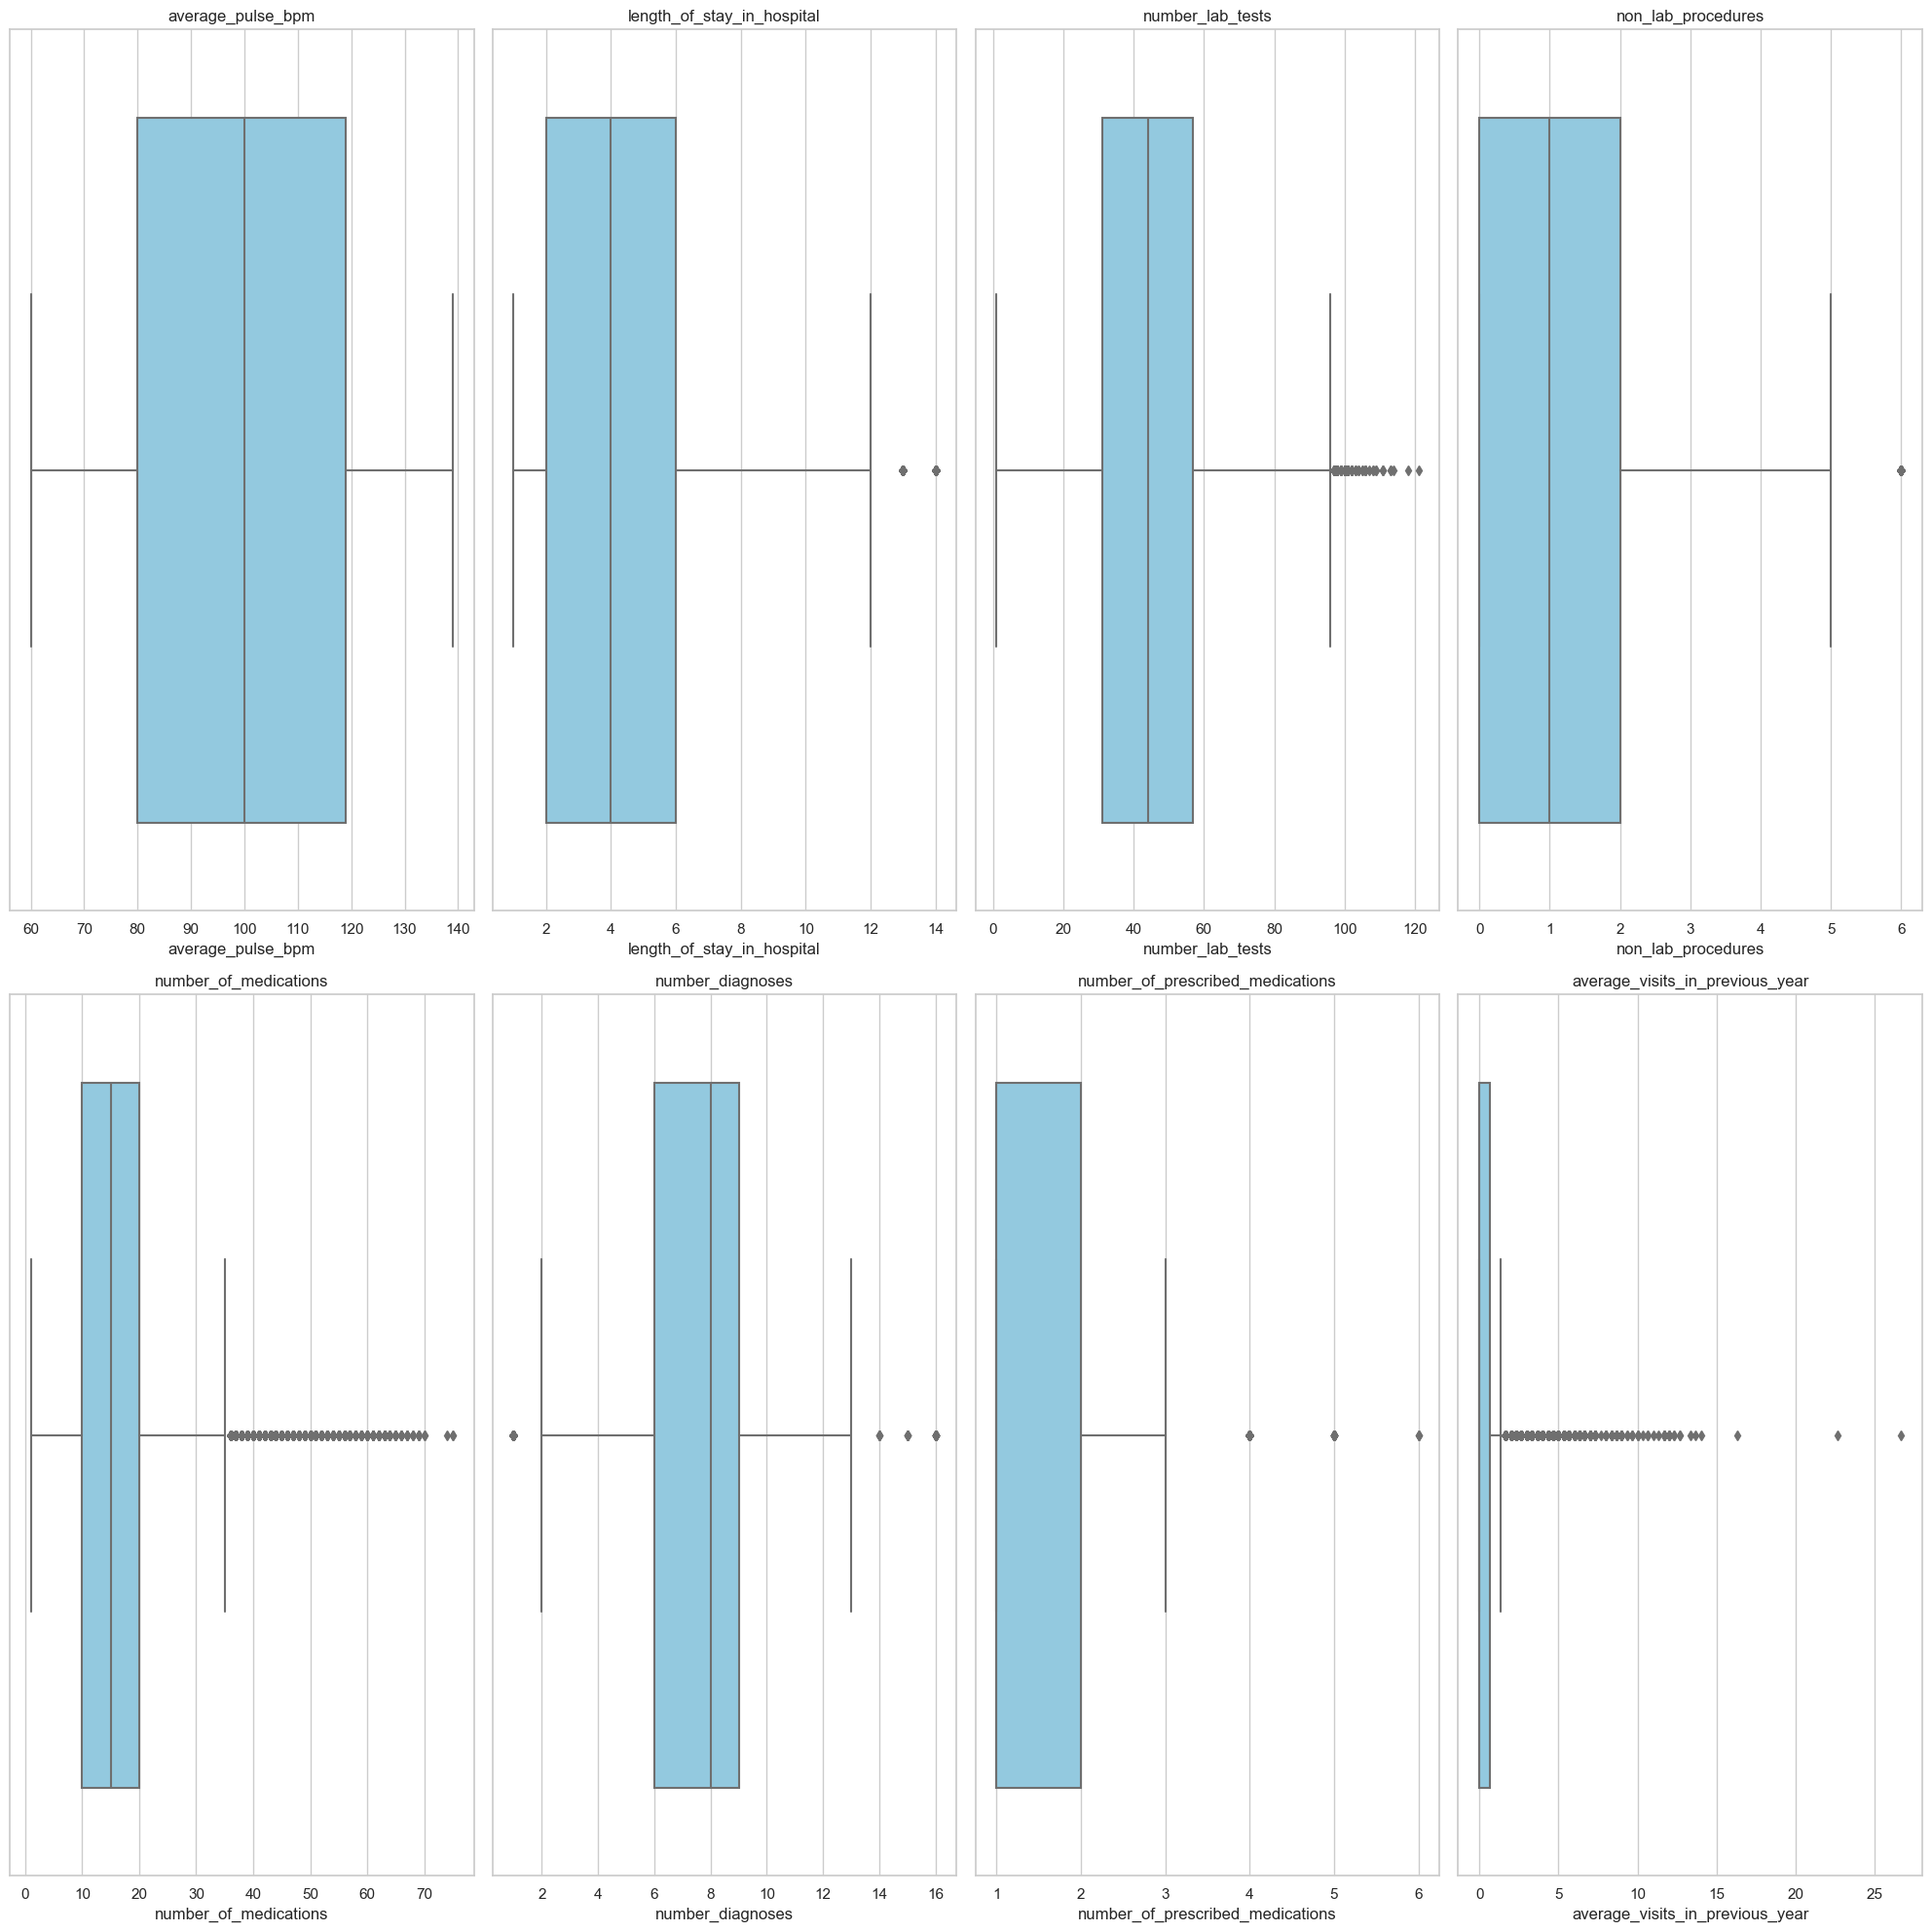

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Define the number of rows and columns for the subplots
num_rows = 2
num_cols = 4

# Create subplots for boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numerical features and create boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=train_no_outlier[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

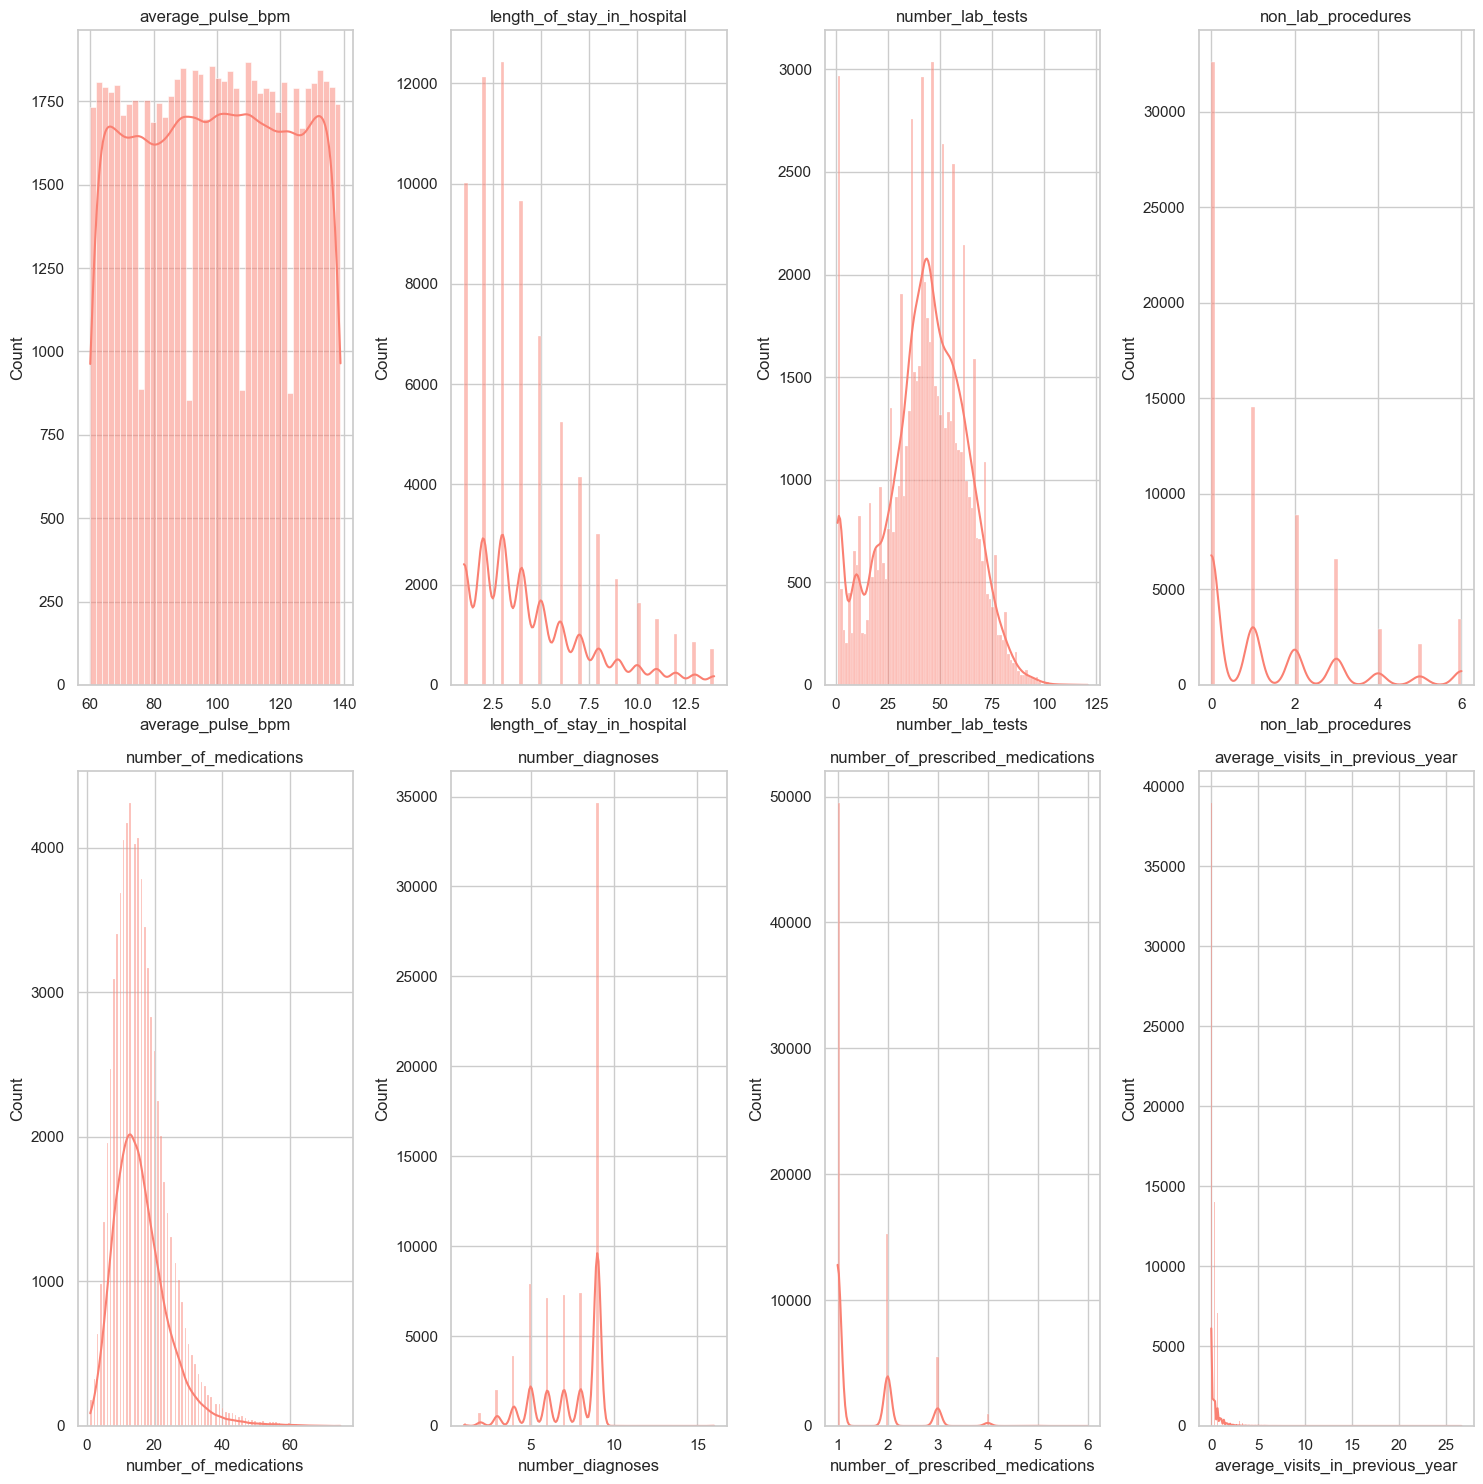

In [101]:
# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numerical features and create histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(train_no_outlier[feature], ax=axes[i], color='salmon', kde=True)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [102]:
print(f'The cumulative percentage of original data removed after the Numerical Features Outlier Removal was {round((100-(train_no_outlier.shape[0]/train_df.shape[0])*100),2)}%')

The cumulative percentage of original data removed after the Numerical Features Outlier Removal was 0.0%


Outliers were identified in the numerical variables and, in a first attempt, they were eliminated. However, this hampered the efficiency of the model. This is due to class imbalance (especially in the binary problem, where there was approximately 11% of the minority class), which makes it inadvisable to remove outliers as they may belong to the underrepresented class.

#### *Categorical Ordinal Features*

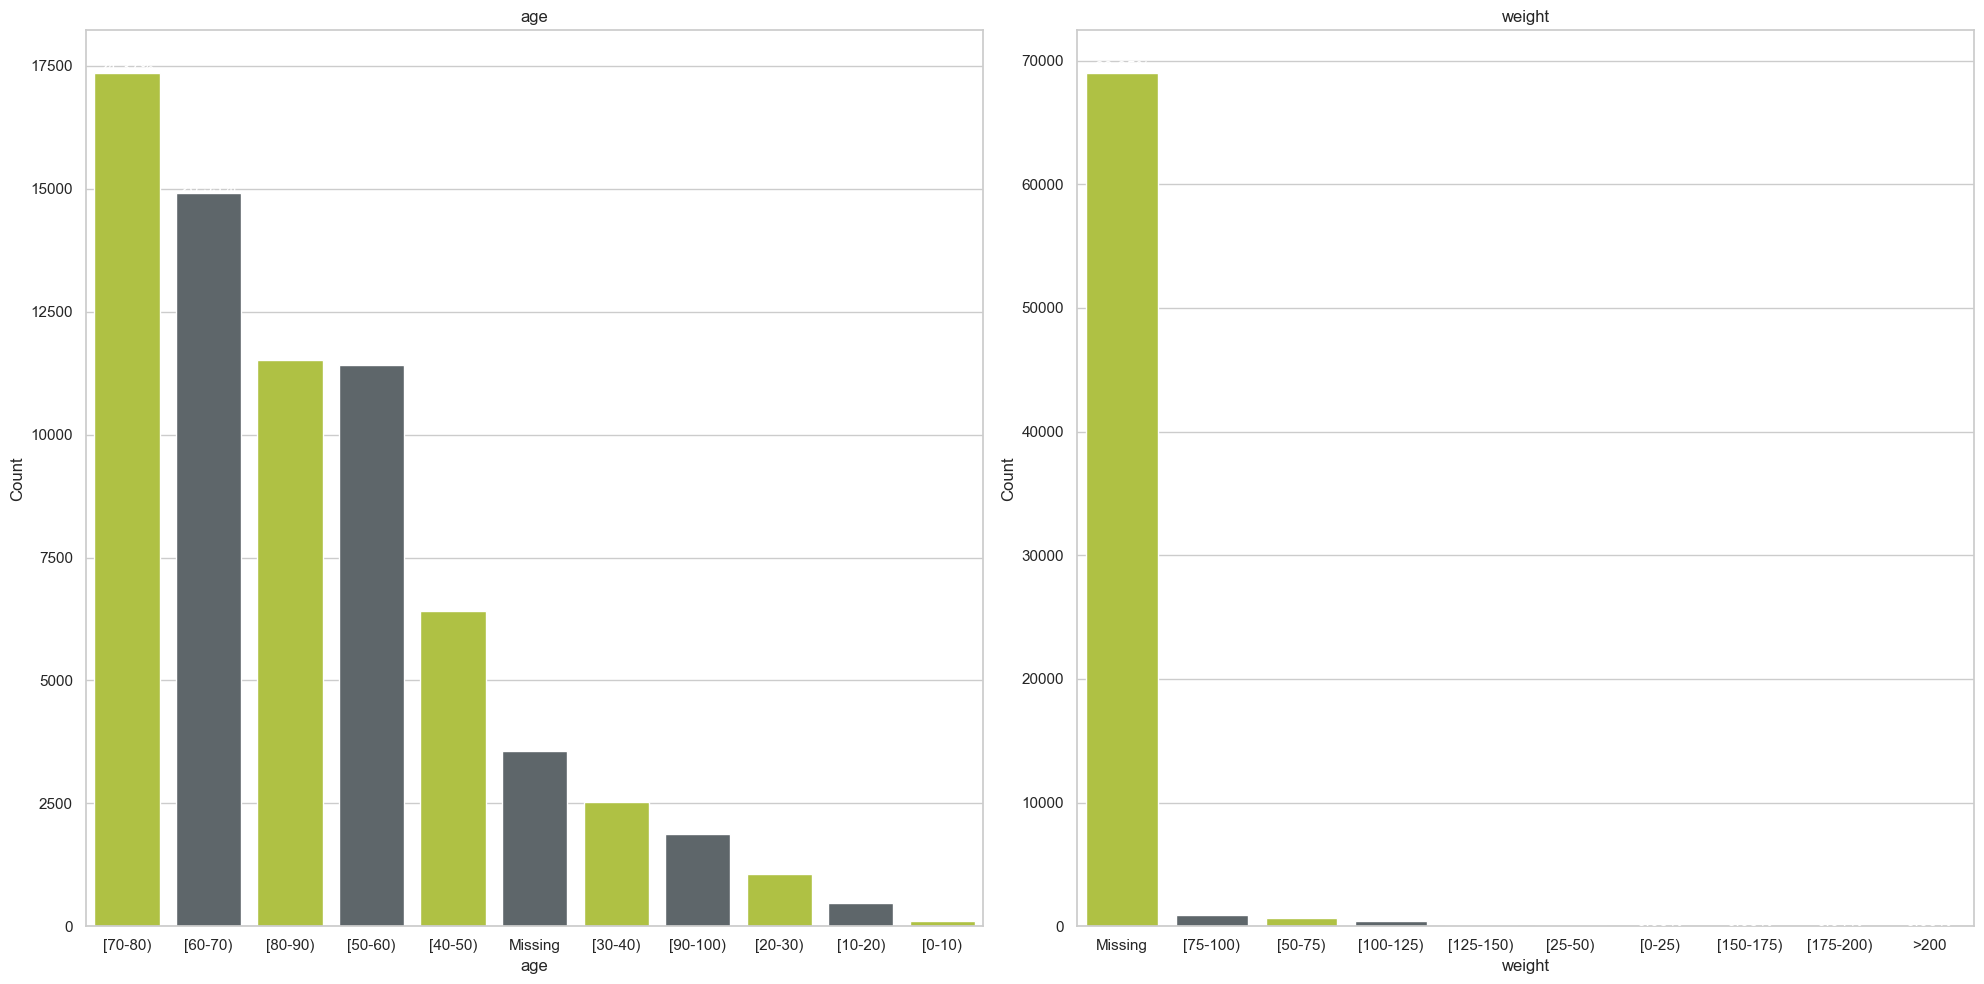

In [103]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the custom color palette with the provided hex codes
custom_palette = ['#BED62F', '#5C666C']

# Define the number of rows and columns for the subplots
num_rows = 1
num_cols = 2

# Create subplots for barplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical ordinal features and create barplots
for i, feature in enumerate(categorical_ordinal_features):
    # Fill missing values with a placeholder ('Missing')
    train_df_filled = train_no_outlier[feature].fillna('Missing')

    # Order categories by count
    order = train_df_filled.value_counts().index

    # Construct the plot with the custom palette
    sns.countplot(x=train_df_filled, ax=axes[i], order=order, palette=custom_palette)

    # Add percentage labels on top of each bar
    total = float(len(train_df_filled))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2.,
                     height + 3,
                     f'{(height/total) * 100:.2f}%',
                     ha="center", color='white')  # White text for visibility against dark colors

    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [104]:
# Dropping the 'weight' column from the training dataset to handle excessive missing data
# The decision to drop 'weight' is based on its high percentage of missing values (96.85%)
train_no_outlier.drop('weight', axis=1, inplace=True)

# Dropping the 'weight' column from the test dataset for consistency with the training dataset
test_df.drop('weight', axis=1, inplace=True)

In [105]:
# Removing 'weight' from the list of ordinal categorical features
# This is done because 'weight' has been dropped from the datasets
categorical_ordinal_features.remove('weight')

#### *Categorical Non-Ordinal Features*

It was decided not to remove any value from any categorical non-ordinal features because they possible have important values for both binary and multiclass classifications tasks. Removing any categories within these features could lead to a loss of predictive power and information for the models to be constructed (for both binary and multiclass classification).

In [106]:
print(f'The cumulative percentage of original data removed after the Outlier Removal was {(100-(train_no_outlier.shape[0]/train_df.shape[0])*100)}%')

The cumulative percentage of original data removed after the Outlier Removal was 0.0%


### Missing Data Imputation

In [107]:
# Creating copies of the training and test datasets, to preserve the original datasets and handle missing values separately
train_no_missing = train_no_outlier.copy()
test_no_missing = test_df.copy()

#### *Numerical Features missing data imputation*

In [108]:
# A confirmation of the absence of missing values for the numerical features in the train dataset
train_no_missing[numerical_features].isna().sum()

average_pulse_bpm                   0
length_of_stay_in_hospital          0
number_lab_tests                    0
non_lab_procedures                  0
number_of_medications               0
number_diagnoses                    0
number_of_prescribed_medications    0
average_visits_in_previous_year     0
dtype: int64

In [109]:
# A confirmation of the absence of missing values for the numerical features in the test dataset
test_no_missing[numerical_features].isna().sum()

average_pulse_bpm                   0
length_of_stay_in_hospital          0
number_lab_tests                    0
non_lab_procedures                  0
number_of_medications               0
number_diagnoses                    0
number_of_prescribed_medications    0
average_visits_in_previous_year     0
dtype: int64

#### *Categorical ordinal missing data imputation*

In [110]:
# A reminder of the amount of missing values in 'age' in both datasets
print(f'Age missings in train: {train_no_missing["age"].isna().sum()}')
print(f'Age missings in test: {test_no_missing["age"].isna().sum()}')

Age missings in train: 3557
Age missings in test: 1531


In [111]:
# Define the age groups ordinally
age_groups = [
    "[0-10)", "[10-20)", "[20-30)", "[30-40)",
    "[40-50)", "[50-60)", "[60-70)", "[70-80)",
    "[80-90)", "[90-100)"
]

# Create a numpy array with the age groups
age_groups_array = np.array(age_groups).reshape(-1, 1)

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[age_groups])

# Extract the non-null values from the 'age' column
non_null_indices_train = train_no_missing['age'].notnull()
ages_series = train_no_missing.loc[non_null_indices_train, 'age'].values.reshape(-1, 1)

# Fit and transform the non-null values using the encoder
encoded_ages = ordinal_encoder.fit_transform(ages_series)

# Replace the original 'age' column with the encoded values in the non-null rows
train_no_missing.loc[non_null_indices_train, 'age'] = encoded_ages

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[age_groups])

# Extract the non-null values from the 'age' column
non_null_indices_test = test_no_missing['age'].notnull()
ages_series = test_no_missing.loc[non_null_indices_test, 'age'].values.reshape(-1, 1)

# Fit and transform the non-null values using the encoder
encoded_ages = ordinal_encoder.fit_transform(ages_series)
test_no_missing.loc[non_null_indices_test, 'age'] = encoded_ages

In [112]:
# Standardize numerical features
scaler = StandardScaler()
train_no_missing[numerical_features] = scaler.fit_transform(train_no_missing[numerical_features])
test_no_missing[numerical_features] = scaler.transform(test_no_missing[numerical_features])

# Create a KNN imputer for imputing missing data on numerical and categorical ordinal features
imputer = KNNImputer(n_neighbors=15, weights='uniform')

# Fit and transform on the training set
train_no_missing[categorical_ordinal_features] = imputer.fit_transform(train_no_missing[categorical_ordinal_features])

# Transform on the test set
test_no_missing[categorical_ordinal_features] = imputer.transform(test_no_missing[categorical_ordinal_features])

In [113]:
# Rounding the values of ordinal categorical features in the training dataset without missing values
# This is done to ensure that the imputed values are consistent with the ordinal nature of the features
train_no_missing[categorical_ordinal_features] = train_no_missing[categorical_ordinal_features].round()

# Rounding the values of ordinal categorical features in the test dataset without missing values
# This maintains consistency with the handling of the training dataset
test_no_missing[categorical_ordinal_features] = test_no_missing[categorical_ordinal_features].round()

In [114]:
# Check if the categorical ordinal missing data imputation was successful in both the train and test datasets
print(f'Missing values in the train dataset: {train_no_missing[categorical_ordinal_features].isna().sum()}')
print('\n')
print(f'Missing values in the test dataset: {test_no_missing[categorical_ordinal_features].isna().sum()}')

Missing values in the train dataset: age    0
dtype: int64


Missing values in the test dataset: age    0
dtype: int64


#### *Categorical non-ordinal missing data inputation*

In [115]:
# A reminder of the amount of missing values in the categorical non-ordinal features in the train dataset
train_no_missing[categorical_non_ordinal_features].isna().sum()

race                                     5069
gender                                      3
payer_code                                  0
admission_type                              0
medical_specialty                           0
discharge_disposition                    1393
admission_source                            0
primary_diagnosis                           0
secondary_diagnosis                         0
additional_diagnosis                        0
change_in_meds_during_hospitalization       0
prescribed_diabetes_meds                    0
glucose_test_result                         0
a1c_test_result                             0
dtype: int64

In [116]:
# A reminder of the amount of missing values in the categorical non-ordinal features in the test dataset
test_no_missing[categorical_non_ordinal_features].isna().sum()

race                                     2191
gender                                      0
payer_code                                  0
admission_type                              0
medical_specialty                           0
discharge_disposition                     600
admission_source                            0
primary_diagnosis                           0
secondary_diagnosis                         0
additional_diagnosis                        0
change_in_meds_during_hospitalization       0
prescribed_diabetes_meds                    0
glucose_test_result                         0
a1c_test_result                             0
dtype: int64

In [117]:
# Displaying the distribution of 'race' values in the training dataset
train_race_distribution = train_no_missing["race"].value_counts()
print(f'Distribution of race values in train: {train_race_distribution}')

# Adding a newline for better readability
print('\n')

# Displaying the distribution of 'race' values in the test dataset
test_race_distribution = test_no_missing["race"].value_counts()
print(f'Distribution of race values in test: {test_race_distribution}')

Distribution of race values in train: race
Caucasian          50690
AfricanAmerican    12691
Hispanic            1363
Other                995
Asian                421
Name: count, dtype: int64


Distribution of race values in test: race
Caucasian          21617
AfricanAmerican     5535
Hispanic             563
Other                437
Asian                187
Name: count, dtype: int64


In [118]:
# Impute missing values in 'race' with the mode in the training dataset
train_no_missing['race'].fillna(train_no_missing['race'].mode()[0], inplace=True)

# Use the training mode to impute missing values in 'race' in the test dataset
test_no_missing['race'].fillna(train_no_missing['race'].mode()[0], inplace=True)

# Explanation:
# 1. Imputing in the Training Dataset:
#    - Calculate the mode of the 'race' feature in the training dataset.
#    - Extract the mode value; if there are multiple modes (which there isn't), take the first one.
#    - Fill missing values in the 'race' column with the mode.

# 2. Imputing in the Test Dataset:
#    - Instead of calculating the mode from the test dataset, use the mode obtained from the training dataset.
#    - This avoids data leakage, ensuring that information from the test set is not used in the imputation process.

# 3. Explanation for Imputing with Mode:
#    - The choice of imputing missing values with the mode is based on the assumption that 'race' is difficult
#      to predict accurately, with mostly medical data alone.
#    - Imputing with the mode is a simple strategy for handling missing categorical data when the variable
#      is not expected to have a strong correlation with other features in the dataset.

# 4. Supporting Fact for Imputing with Mode:
#    - Imputing with the mode is further supported by the observation that 'race' is, by far, the most frequent value
#      in both the training and test datasets, making it a reasonable choice for the imputation in the dataset.

In [119]:
# Displaying the distribution of 'race' values in the training dataset
train_race_distribution = train_no_missing["discharge_disposition"].value_counts()
print(f'Distribution of race values in train: {train_race_distribution}')

# Adding a newline for better readability
print('\n')

# Displaying the distribution of 'race' values in the test dataset
test_race_distribution = test_no_missing["discharge_disposition"].value_counts()
print(f'Distribution of race values in test: {test_race_distribution}')

Distribution of race values in train: discharge_disposition
Home Discharge       51335
Facility Transfer    13135
Uncategorized         2590
Expired               1142
Other                 1115
Hospice                519
Name: count, dtype: int64


Distribution of race values in test: discharge_disposition
Home Discharge       21902
Facility Transfer     5644
Uncategorized         1101
Other                  521
Expired                510
Hospice                252
Name: count, dtype: int64


In [120]:
# Create a copy of the training dataset with no missing values
df = train_no_missing.copy()

# Create dictionaries to store Label Encoder models and KNN Classifier models for each categorical non-ordinal feature
le_models = {}
knn_classifier_models = {}

# Iterate through each categorical non-ordinal feature for imputation
for feature_to_impute in categorical_non_ordinal_features:
    
    # Split the data into parts: one with missing values and one without
    data_with_missing = df[df[feature_to_impute].isna()]
    data_without_missing = df[~df[feature_to_impute].isna()]

    # Check if there are any missing values for the current feature
    if not data_with_missing.empty:
        print(f'{feature_to_impute} has missing data!')
        
        # Select relevant numerical features as input for the KNN Classifier
        input_features = numerical_features

        # Label encoding for the target feature
        le = LabelEncoder()
        data_without_missing[feature_to_impute] = le.fit_transform(data_without_missing[feature_to_impute])

        # Store the Label Encoder model in the dictionary
        le_models[feature_to_impute] = le

        # Train a KNN Classifier model
        knn_classifier_model = KNeighborsClassifier(n_neighbors=11)
        knn_classifier_model.fit(data_without_missing[input_features], data_without_missing[feature_to_impute])

        # Store the trained KNN Classifier model in the dictionary
        knn_classifier_models[feature_to_impute] = knn_classifier_model

        # Predict the missing values
        predicted_values = knn_classifier_model.predict(data_with_missing[input_features])

        # Inverse transform the label encoded predicted values
        data_with_missing[feature_to_impute] = le.inverse_transform(predicted_values)
        data_without_missing[feature_to_impute] = le.inverse_transform(data_without_missing[feature_to_impute])

        # Combine the data with imputed values and the data without missing values
        imputed_data = pd.concat([data_with_missing, data_without_missing])

        # Update the original DataFrame with imputed values
        df.update(imputed_data)
    else:
        print(f'{feature_to_impute} doesn\'t have missing data')

# Now, apply the corresponding trained KNN Classifier model to impute missing values in the test dataset (test_df)
test_df_copy = test_no_missing.copy()

for feature_to_impute in categorical_non_ordinal_features:
    data_with_missing_test = test_df_copy[test_df_copy[feature_to_impute].isna()]
    data_without_missing_test = test_df_copy[~test_df_copy[feature_to_impute].isna()]

    # Check if there are any missing values for the current feature in the test dataset
    if not data_with_missing_test.empty:
        # Label encoding for the target feature using the stored Label Encoder model
        le = le_models[feature_to_impute]
        data_without_missing_test[feature_to_impute] = le.transform(data_without_missing_test[feature_to_impute])

        # Use the corresponding trained KNN Classifier model to predict missing values
        knn_classifier_model = knn_classifier_models[feature_to_impute]
        predicted_values_test = knn_classifier_model.predict(data_with_missing_test[input_features])

        # Inverse transform the label encoded predicted values
        data_with_missing_test[feature_to_impute] = le.inverse_transform(predicted_values_test)
        data_without_missing_test[feature_to_impute] = le.inverse_transform(data_without_missing_test[feature_to_impute])

        # Combine the data with imputed values and the data without missing values
        imputed_data_test = pd.concat([data_with_missing_test, data_without_missing_test])

        # Update the original test DataFrame with imputed values
        test_df_copy.update(imputed_data_test)

race doesn't have missing data
gender has missing data!
payer_code doesn't have missing data
admission_type doesn't have missing data
medical_specialty doesn't have missing data
discharge_disposition has missing data!
admission_source doesn't have missing data
primary_diagnosis doesn't have missing data
secondary_diagnosis doesn't have missing data
additional_diagnosis doesn't have missing data
change_in_meds_during_hospitalization doesn't have missing data
prescribed_diabetes_meds doesn't have missing data
glucose_test_result doesn't have missing data
a1c_test_result doesn't have missing data


In [121]:
# Displaying the distribution of 'discharge_disposition' values in the training dataset
train_race_distribution = df["discharge_disposition"].value_counts()
print(f'Distribution of discharge_disposition values in train: {train_race_distribution}')

# Adding a newline for better readability
print('\n')

# Displaying the distribution of 'discharge_disposition' values in the test dataset
test_race_distribution = test_df_copy["discharge_disposition"].value_counts()
print(f'Distribution of discharge_disposition values in test: {test_race_distribution}')

Distribution of discharge_disposition values in train: discharge_disposition
Home Discharge       52570
Facility Transfer    13291
Uncategorized         2592
Expired               1142
Other                 1115
Hospice                519
Name: count, dtype: int64


Distribution of discharge_disposition values in test: discharge_disposition
Home Discharge       22429
Facility Transfer     5717
Uncategorized         1101
Other                  521
Expired                510
Hospice                252
Name: count, dtype: int64


In [122]:
# Check if the categorical non-ordinal missing data imputation was successful in both the train and test datasets
print(df[categorical_non_ordinal_features].isna().sum())
print('\n')
print(test_df_copy[categorical_non_ordinal_features].isna().sum())

race                                     0
gender                                   0
payer_code                               0
admission_type                           0
medical_specialty                        0
discharge_disposition                    0
admission_source                         0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
glucose_test_result                      0
a1c_test_result                          0
dtype: int64


race                                     0
gender                                   0
payer_code                               0
admission_type                           0
medical_specialty                        0
discharge_disposition                    0
admission_source                         0
primary_diagnosis                        0
secondary_diagnosis                    

In [123]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing 'age' in the training data
# This involves fitting the scaler on the training data and transforming it
df['age'] = scaler.fit_transform(df[['age']])

# Standardizing 'age' in the test data
# Here, only transform the test data using the scaler fitted on the training data
test_df_copy['age'] = scaler.transform(test_df_copy[['age']])

# Comments explaining the code
# Removing 'age' from the list of categorical ordinal features
# This is done because 'age' has been converted into a numerical format
# through ordinal encoding, with values ranging from 0 to 9.
categorical_ordinal_features.remove('age')

# Adding 'age' to the list of numerical features
# This change reflects the transformation of 'age' into a discretized numerical format,
# allowing for its treatment as a numerical feature in subsequent analyses and feature selection processes.
numerical_features.append('age')

<a name="binary-classification"></a>
# 3. Binary Classification

<a name="feature-selection-binary-classification"></a>
## 3.1 Feature Selection For Binary Classification

In [124]:
# Create copies of both datasets for binary classification for Feature Selection purposes
df_feature_selection_bin = df.copy()
df_test_bin = test_df_copy.copy()

#### *Numerical Features*

##### *Correlation indices*

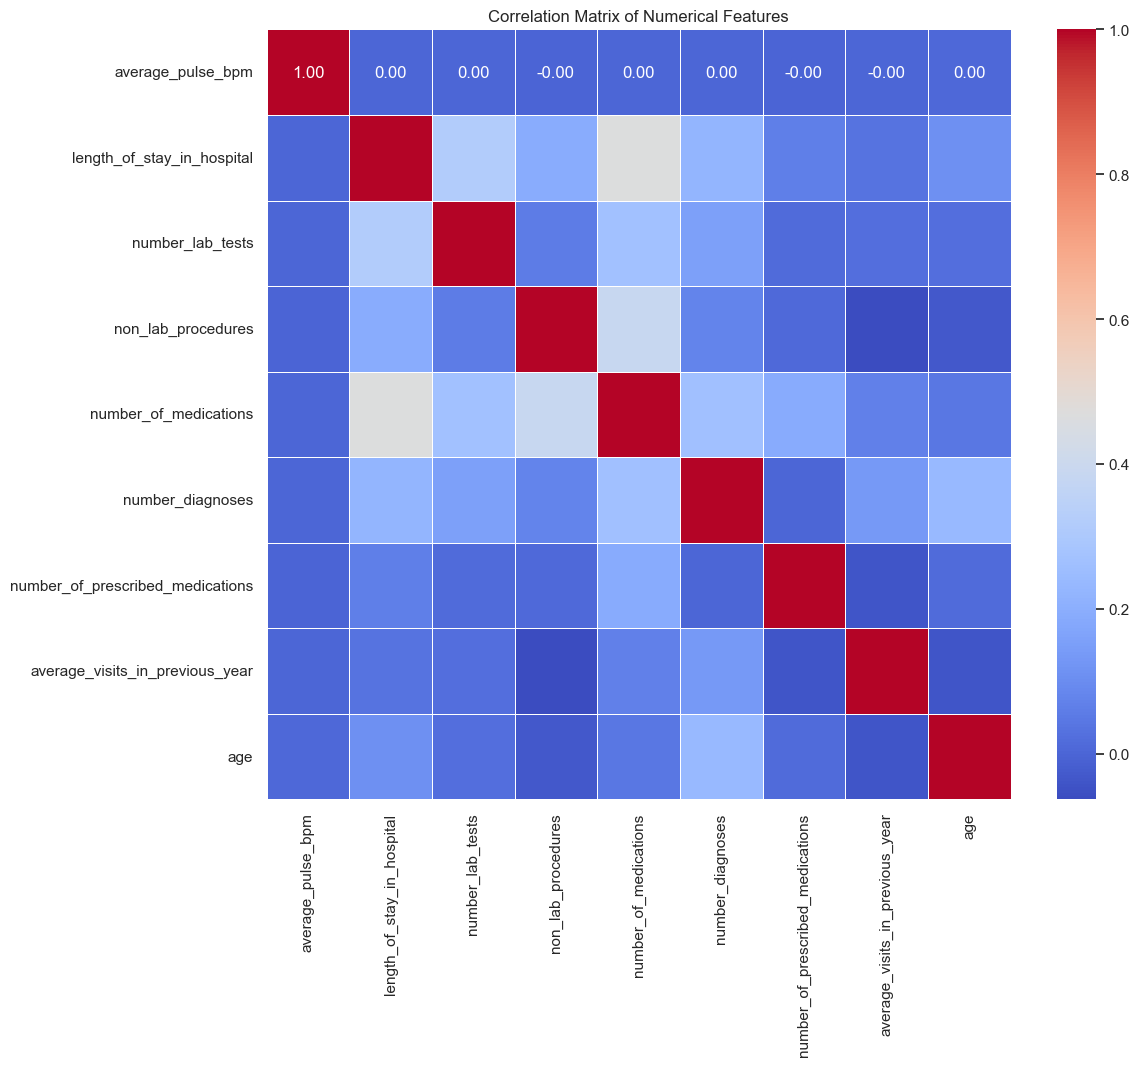

In [125]:
# Calculate the correlation matrix
correlation_matrix = df_feature_selection_bin[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn with correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()

It is noteworthy to point out that there are no strong or moderate correlations among the numerical features. The highest correlation observed was a relatively weak association of 0.46 between ‘number_of_medications’ and ‘length_of_stay_in_hospital’. The absence of strong correlations necessitates the exploration of alternative criteria for identifying influential features within the dataset for the purpose of Binary Classification.

##### *Kruskal-Wallis test*

In [126]:
# Create an instance of SelectKBest with the f_classif scoring function
# and specify 'k' as the total number of numerical features
fs = SelectKBest(score_func=f_classif, k=len(numerical_features))

# Explanation:
# - SelectKBest is a feature selection method that evaluates features based on a scoring function.
# - Here, we use the f_classif scoring function, which is suitable for classification tasks.
# - The 'k' parameter is set to the total number of numerical features, implying that no feature will be excluded initially.

In [127]:
# Fit the SelectKBest feature selector on the numerical features and the target variable
fs.fit(df_feature_selection_bin[numerical_features], df_feature_selection_bin['readmitted_binary'])

# Explanation:
# - fs.fit() applies the feature selection method on the specified input features and target variable.
# - 'df_feature_selection_bin[numerical_features]' represents the numerical features used for the selection process.
# - 'df_feature_selection_bin['readmitted_binary']' is the target variable for the classification task.
# - The fitting process involves evaluating the relevance of each feature in relation to the binary target variable
#   based on the scoring function (f_classif in this case) provided during the initialization of SelectKBest.

SelectKBest(k=9)

In [128]:
# Compute feature scores and p-values using a feature selection method
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_, 4))
features = pd.DataFrame(df_feature_selection_bin[numerical_features].columns)

# Combine features, scores, and p-values into a DataFrame
feature_score = pd.concat([features, features_score, features_pvalue], axis=1)
feature_score.columns = ["Input_Features", "Score", "P_Value"]

# Print the top 9 features based on their scores
print(feature_score.nlargest(9, columns="Score"))

                     Input_Features        Score  P_Value
7   average_visits_in_previous_year  1146.887962   0.0000
5                  number_diagnoses   191.235807   0.0000
1        length_of_stay_in_hospital   120.302321   0.0000
4             number_of_medications    99.932035   0.0000
8                               age    28.731750   0.0000
2                  number_lab_tests    25.169623   0.0000
3                non_lab_procedures    15.701909   0.0001
6  number_of_prescribed_medications    13.496956   0.0002
0                 average_pulse_bpm     0.001468   0.9694


Kruskal-Wallis H test suggests the removal of **average_pulse_bpm**, since the p-value is above the defined significance level of 0.05.

##### *RFE Logistic Regression*

Optimal number of features: 1
Selected features: ['average_visits_in_previous_year']


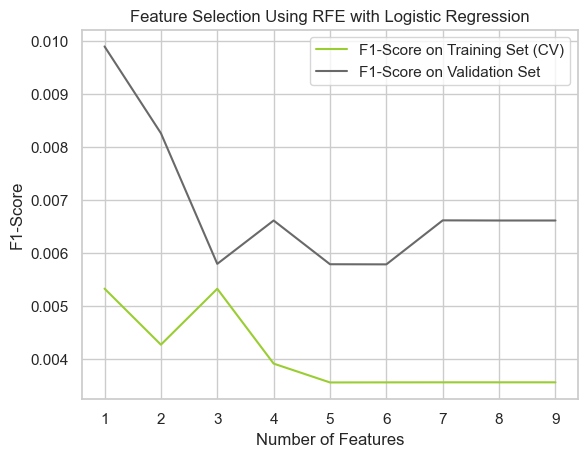

In [129]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Features and target variable in the training set
X = df_feature_selection_bin[numerical_features]
y = df_feature_selection_bin['readmitted_binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of number of features to select
nof_list = np.arange(1, 10)  

# Lists to store F1-Scores and selected features
train_f1_list = []
val_f1_list = []
selected_features = {}

# Iterate over different numbers of features
for n in nof_list:
    # Initialize Logistic Regression model and RFE
    model = LogisticRegression(max_iter=1000)  
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Transform the training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Apply 5-fold cross-validation on the training set
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='f1')
    avg_cv_score = np.mean(cv_scores)
    
    # Store F1-Scores for plotting
    train_f1_list.append(avg_cv_score)
    
    # Fit the model and make predictions on the validation set
    model.fit(X_train_rfe, y_train)
    val_pred = model.predict(rfe.transform(X_val))
    
    # Calculate F1-Score on validation set
    val_f1 = f1_score(y_val, val_pred)
    val_f1_list.append(val_f1)
    
    # Store selected features
    features_to_select = pd.Series(rfe.support_, index=X_train.columns)
    selected_features[n] = list(features_to_select[features_to_select].index)

# Determine the optimal number of features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features[optimal_n]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with Logistic Regression")
plt.legend()
plt.show()

RFE Logistic Regression suggests the keeping of only 1 feature ('average_visits_in_previous_year'). However, the F1-Scores are extremely low in the validation set which makes the results not trustworthy.

<div style="background-color: red; color: white; padding: 10px;">
    <strong>WARNING:</strong> RUNNING THE BELOW SUPPORT VECTOR CLASSIFIER MIGHT TAKE A LONG TIME (APPROXIMATELY 1 HOUR)
</div>

##### *RFE Support Vector Classifier*

Optimal number of features: 1
Selected features: ['number_diagnoses']


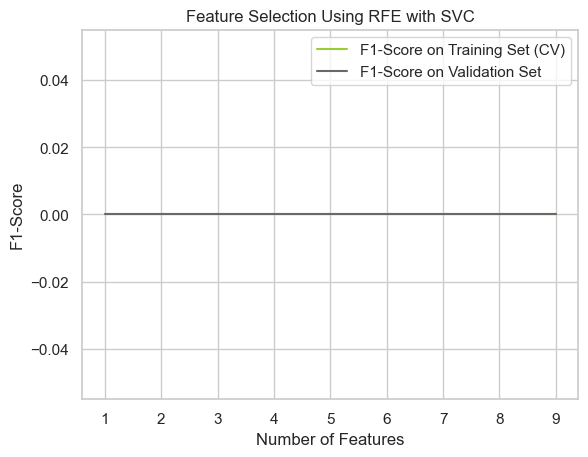

In [130]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Features and target variable in the training set
X = df_feature_selection_bin[numerical_features]
y = df_feature_selection_bin['readmitted_binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of number of features to select
nof_list = np.arange(1, 10)

# Lists to store F1-Scores and selected features
train_f1_list = []
val_f1_list = []
selected_features = {}

# Iterate over different numbers of features
for n in nof_list:
    # Initialize SVC model and RFE
    model = SVC(kernel='linear', random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Transform the training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Apply 5-fold cross-validation on the training set
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='f1')
    avg_cv_score = np.mean(cv_scores)
    
    # Store F1-Scores for plotting
    train_f1_list.append(avg_cv_score)
    
    # Fit the model and make predictions on the validation set
    model.fit(X_train_rfe, y_train)
    val_pred = model.predict(rfe.transform(X_val))
    
    # Calculate F1-Score on validation set
    val_f1 = f1_score(y_val, val_pred)
    val_f1_list.append(val_f1)
    
    # Store selected features
    features_to_select = pd.Series(rfe.support_, index=X_train.columns)
    selected_features[n] = list(features_to_select[features_to_select].index)

# Determine the optimal number of features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features[optimal_n]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with SVC")
plt.legend()
plt.show()

RFE Support Vector Classificer suggests the keeping of only 1 feature ('number_diagnoses'). However, the F1-Scores are extremely low in the both the train and validation sets which makes the results not trustworthy.

##### *RFE Random Forest*

Optimal number of features: 3
Selected features: ['average_pulse_bpm', 'number_lab_tests', 'number_of_medications']


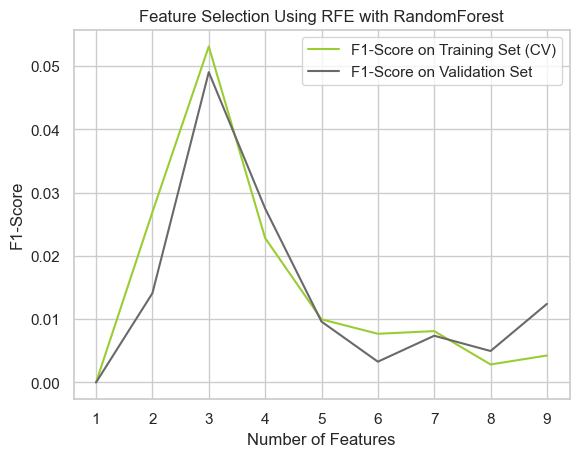

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Features and target variable in the training set
X = df_feature_selection_bin[numerical_features]
y = df_feature_selection_bin['readmitted_binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of number of features to select
nof_list = np.arange(1, 10)

# Lists to store F1-Scores and selected features
train_f1_list = []
val_f1_list = []
selected_features = {}

# Iterate over different numbers of features
for n in nof_list:
    # Initialize Random Forest classifier and RFE
    rf_model = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=rf_model, n_features_to_select=n)
    
    # Transform the training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Apply 5-fold cross-validation on the training set
    cv_scores = cross_val_score(rf_model, X_train_rfe, y_train, cv=5, scoring='f1')
    avg_cv_score = np.mean(cv_scores)
    
    # Store F1-Scores for plotting
    train_f1_list.append(avg_cv_score)
    
    # Fit the model and make predictions on the validation set
    rf_model.fit(X_train_rfe, y_train)
    val_pred = rf_model.predict(rfe.transform(X_val))
    
    # Calculate F1-Score on validation set
    val_f1 = f1_score(y_val, val_pred)
    val_f1_list.append(val_f1)
    
    # Store selected features
    features_to_select = pd.Series(rfe.support_, index=X_train.columns)
    selected_features[n] = list(features_to_select[features_to_select].index)

# Determine the optimal number of features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features[optimal_n]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with RandomForest")
plt.legend()
plt.show()

RFE Random Forest suggests the keeping of 3 features: ['average_pulse_bpm', 'number_lab_tests', 'number_of_medications']. However, the F1-Scores are extremely low in the validation sets which makes the results not trustworthy.

##### *LASSO*

In [129]:
def plot_importance(coef, name):
    """
    Plot the feature importance based on the coefficients of a linear model.

    Parameters:
    - coef (pandas.Series): Coefficients or feature importance values.
    - name (str): Name of the model for labeling the plot.

    Returns:
    None

    This function takes a pandas Series containing coefficients or feature importance values,
    sorts them in ascending order, and then plots them as a horizontal bar chart.
    The title of the plot includes the name of the model.
    """

    # Sort coefficients in ascending order
    imp_coef = coef.sort_values()

    # Plotting
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    
    # Set plot title
    plt.title("Feature importance using " + name + " Model")
    
    # Display the plot
    plt.show()

In [130]:
# Instantiate a LassoCV (Lasso Cross-Validation) regression model
reg = LassoCV()

# Fit the LassoCV model on the selected features and target variable
reg.fit(df_feature_selection_bin[numerical_features], df_feature_selection_bin['readmitted_binary'])# Extract the coefficients from the trained LassoCV model
coef = pd.Series(reg.coef_, index=df_feature_selection_bin[numerical_features].columns)

In [131]:
# Extract the coefficients from the trained LassoCV model
coef = pd.Series(reg.coef_, index=df_feature_selection_bin[numerical_features].columns)
coef.sort_values()

non_lab_procedures                 -0.006380
number_of_prescribed_medications   -0.004204
average_pulse_bpm                  -0.000000
number_lab_tests                    0.000000
age                                 0.004630
number_of_medications               0.006617
number_diagnoses                    0.006884
length_of_stay_in_hospital          0.007743
average_visits_in_previous_year     0.037298
dtype: float64

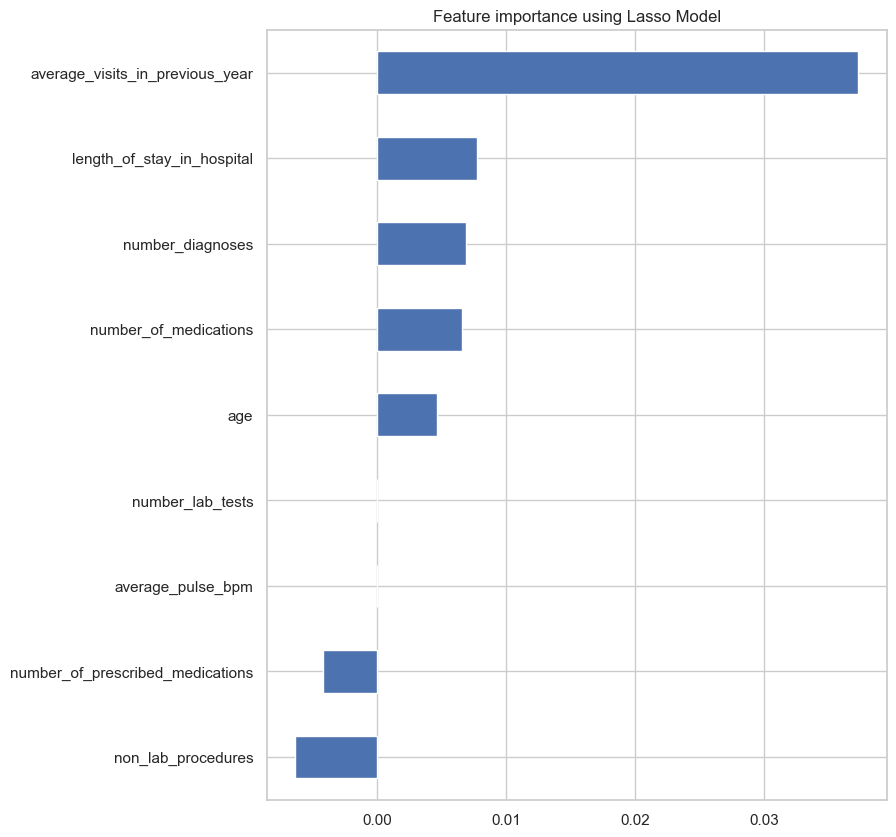

In [132]:
plot_importance(coef,'Lasso')

LASSO suggests the removal of **average_pulse_bpm** and **number_lab_tests**

##### *Kendall's Tau*

In [133]:
# Create an empty DataFrame to store correlation coefficients and p-values
kendall_results = pd.DataFrame(index=numerical_features, columns=['tau', 'p-value'])

# Loop through all the numerical features and calculate the Kendall's Tau
for feature in numerical_features:
    tau, p_value = kendalltau(df_feature_selection_bin[feature], df_feature_selection_bin['readmitted_binary'])
    kendall_results.loc[feature] = [tau, p_value]

# Display the results
print(kendall_results)

                                       tau   p-value
average_pulse_bpm                 0.000125  0.967612
length_of_stay_in_hospital        0.041271       0.0
number_lab_tests                  0.015521       0.0
non_lab_procedures               -0.007319  0.031721
number_of_medications             0.038972       0.0
number_diagnoses                  0.044692       0.0
number_of_prescribed_medications -0.012623  0.000504
average_visits_in_previous_year   0.116524       0.0
age                               0.019544       0.0


Kendall's Tau suggests the removal of **average_pulse_bpm**

**Feature Selection for Numerical Features Wrap Up**

| Predictor                           | Kruskal-Wallis | RFE Logistic Regression | RFE Support Vector Machine | RFE Random Forest | LASSO | Kendall's Tau |
| ----------------------------------- | ------ | ------ | ------- | --------- | -------- | -------- |
| average_pulse_bpm                   | Discard | No trust | No trust | No trust | Discard | Discard |
| length_of_stay_in_hospital           | Keep   | No trust | No trust  | No trust  | Keep | Keep |
| number_lab_tests                     | Keep   | No trust | No trust | No trust   | Discard | Keep |
| non_lab_procedures                   | Keep   | No trust | No trust | No trust   | Keep | Keep |
| number_of_medications                | Keep   | No trust | No trust | No trust  | Keep | Keep |
| number_diagnoses                     | Keep   | No trust | No trust  | No trust | Keep | Keep |
| number_of_prescribed_medications     | Keep   | No trust | No trust  | No trust | Keep | Keep |
| average_visits_in_previous_year     | Keep   | No trust | No trust  | No trust | Keep | Keep |
| age | Keep | No trust | No trust | No trust | Keep | Keep

In [125]:
# Drop the 'average_pulse_bpm' feature from the training set
# This feature is removed based on the results of Feature Selection using Kruskal-Wallis, LASSO and Kendall's Tau
# It has been determined that 'average_pulse_bpm' is considered less relevant or contributes less to the model's performance in
# the Binary classification.
df_feature_selection_bin.drop('average_pulse_bpm', axis=1, inplace=True)

# Drop the 'average_pulse_bpm' feature from the test set as well to maintain consistency
df_test_bin.drop('average_pulse_bpm', axis=1, inplace=True)

In [126]:
# Remove 'average_pulse_bpm' from the list of numerical features
numerical_features.remove('average_pulse_bpm')

#### *Categorical Non-Ordinal Features*

##### *Chi-Squared*

In [136]:
# Choosing a significance level of 0.05
significance_level = 0.05

# Initialize a list to store features to be removed
features_to_remove = []

# Loop through each categorical non-ordinal feature
for feature in categorical_non_ordinal_features:
    # Create a contingency table for the current feature and binary target variable
    contingency_table = pd.crosstab(df_feature_selection_bin[feature], df_feature_selection_bin['readmitted_binary'])
    
    # Perform the chi-squared test for independence
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Keep track of features with p-values above the significance level
    if p >= significance_level:
        features_to_remove.append((feature, p))

# Print the features to be removed
for feature, p_value in features_to_remove:
    print(f"Remove {feature} for Binary Classification (p-value = {p_value})")

Remove race for Binary Classification (p-value = 0.0634182058375246)
Remove gender for Binary Classification (p-value = 0.1213782802740632)


##### *Random Forest*

In [146]:
X_cat = df_feature_selection_bin[categorical_non_ordinal_features]
y = df_feature_selection_bin['readmitted_binary']

# Identify categorical features for one-hot encoding
categorical_features = X_cat.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # keep non-categorical features as they are
)

# Create a pipeline with the column transformer and the random forest classifier
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=5))
])

# Fit the model on the data
rf_model.fit(X_cat, y)

# Access feature importances
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a dictionary with feature names and their importances
feature_importance_dict = dict(zip(X_cat.columns, feature_importances))

# Order feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances in descending order
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

admission_source: 0.02840953624335425
discharge_disposition: 0.027835889488791943
secondary_diagnosis: 0.024692382517372213
primary_diagnosis: 0.02394420388145862
payer_code: 0.02106801502880107
change_in_meds_during_hospitalization: 0.019387284449449628
race: 0.01805300208412179
additional_diagnosis: 0.01552203993221635
a1c_test_result: 0.010834649844172548
admission_type: 0.005045452257212096
medical_specialty: 0.0027087356156310165
gender: 0.0014197900804419144
prescribed_diabetes_meds: 0.0
glucose_test_result: 0.0


The results of the Features Importances are unclear, as they are all low.

##### *Mutual Information*

In [147]:
X_cat_one_hot = pd.get_dummies(df_feature_selection_bin[categorical_non_ordinal_features], drop_first=True)
y = df_feature_selection_bin['readmitted_binary']

# Calculate Mutual Information between each feature and the target variable
mutual_info_scores = mutual_info_classif(X_cat_one_hot, y, discrete_features='auto', random_state=42)

# Create a DataFrame to display feature names and their corresponding Mutual Information scores
feature_importance_df = pd.DataFrame({'Feature': X_cat_one_hot.columns, 'Mutual_Information': mutual_info_scores})

# Sort the DataFrame by Mutual Information scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mutual_Information', ascending=False)

# Print the feature importance information
print("Feature Importance based on Mutual Information:")
print(feature_importance_df)

# Explanation:
# This code calculates the Mutual Information scores between each one-hot encoded categorical non-ordinal feature and the
# binary target, 'readmitted_binary'. Mutual Information measures the dependence between variables, and higher scores
# indicate stronger relationships. The resulting DataFrame displays the features sorted by their Mutual Information scores,
# helping identify which features are more informative for predicting the target variable.

Feature Importance based on Mutual Information:
                                              Feature  Mutual_Information
91                   glucose_test_result_Not measured            0.014889
94                       a1c_test_result_Not measured            0.012456
1                                      race_Caucasian            0.010485
28               discharge_disposition_Home Discharge            0.010303
88                       prescribed_diabetes_meds_Yes            0.009408
26                    medical_specialty_Uncategorized            0.006520
4                                         gender_Male            0.003943
87           change_in_meds_during_hospitalization_No            0.003357
6                            admission_type_Emergency            0.002813
16                        medical_specialty_Neurology            0.002353
33                         admission_source_Referrals            0.002230
86  additional_diagnosis_symptoms, signs, and ill-...           

The results of the Mutual Information scores unclear, as they are all low.

**Feature Selection for Categorical-Non-Ordinal Features Wrap Up**

| Predictor                     | Chi-Squared       | Random Forest       | Mutual Information  |
| ----------------------------- | --------------    | ------------------- | ------------------- |
| race                          | Discarded         | No trust            | No trust            |
| gender                        | Discarded         | No trust            | No trust            |
| payer_code                    | Keep              | No trust            | No trust            |
| medical_specialty             | Keep              | No trust            | No trust            |
| discharge_disposition         | Keep              | No trust            | No trust            |
| admission_source              | Keep              | No trust            | No trust            |
| primary_diagnosis             | Keep              | No trust            | No trust            |
| secondary_diagnosis           | Keep              | No trust            | No trust            |
| additional_diagnosis          | Keep              | No trust            | No trust            |
| change_in_meds_durig_hospital | Keep              | No trust            | No trust            |
| prescribed_diabetes_meds      | Keep              | No trust            | No trust            |
| glucose_test_result           | Keep              | No trust            | No trust            |
| a1c_test_result               | Keep              | No trust            | No trust            |

In [127]:
# Drop the 'race' and 'gender' columns from the training dataset. This was the decision taken because the trusted Chi-Squared test
# has indicated that these two features are not relevant for the Binary Classification objective.
df_feature_selection_bin.drop(['race', 'gender'], axis=1, inplace=True)

# Drop the 'race' and 'gender' columns from the test dataset
df_test_bin.drop(['race', 'gender'], axis=1, inplace=True)

In [128]:
# Remove 'race' and 'gender' from the list of categorical non-ordinal features
categorical_non_ordinal_features.remove('race')
categorical_non_ordinal_features.remove('gender')

<a name="feature-encoding-binary-classification"></a>
## 3.2 Feature Encoding For Binary Classification

In [129]:
# A reminder of the training dataset structure after Feature Selection for Binary classification
df_feature_selection_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71229 entries, 0 to 71228
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             71229 non-null  int64  
 1   age                                    71229 non-null  float64
 2   payer_code                             71229 non-null  object 
 3   outpatient_visits_in_previous_year     71229 non-null  int64  
 4   emergency_visits_in_previous_year      71229 non-null  int64  
 5   inpatient_visits_in_previous_year      71229 non-null  int64  
 6   admission_type                         71229 non-null  object 
 7   medical_specialty                      71229 non-null  object 
 8   discharge_disposition                  71229 non-null  object 
 9   admission_source                       71229 non-null  object 
 10  length_of_stay_in_hospital             71229 non-null  float64
 11  nu

In [130]:
# Extract unique medications from the 'medication' feature in the train dataset
unique_medications = df_feature_selection_bin['medication'].dropna().str.split(',').explode().unique()

# Create dummy variables for each unique medication
for medication in unique_medications:
    df_feature_selection_bin[medication] = df_feature_selection_bin['medication'].str.contains(medication, na=False).astype(int)

# Drop the original 'medication' feature
df_feature_selection_bin.drop('medication', axis=1, inplace=True)

# Replace NaN by 'no_medication'
df_feature_selection_bin.rename(columns={'NaN': 'no_medication'}, inplace=True)

# Display the updated DataFrame
df_feature_selection_bin.head(3)

patient_id       age     payer_code  outpatient_visits_in_previous_year  \
0       70110  0.581151  No_payer_code                                   0   
1    29775006 -0.704822  No_payer_code                                   0   
2    80729253 -0.061835  No_payer_code                                   0   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  \
0                                  0                                  2   
1                                  0                                  0   
2                                  0                                  1   

  admission_type medical_specialty discharge_disposition admission_source  \
0      Emergency     Uncategorized        Home Discharge   Emergency Room   
1      Emergency     Uncategorized     Facility Transfer        Referrals   
2  Uncategorized     Uncategorized        Home Discharge    Uncategorized   

   ...  tolazamide  troglitazone  miglitol  chlorpropamide  \
0  ...           0             0         0               0   
1  ...           0             0         0               0   
2  ...           0             0         0               0   

  glipizide-metformin tolbutamide glimepiride-pioglitazone  \
0                   0           0                        0   
1                   0           0                        0   
2                   0           0                        0   

   metformin-pioglitazone acetohexamide metformin-rosiglitazone  
0                       0             0                       0  
1                       0             0                       0  
2                       0             0                       0  

[3 rows x 48 columns]

In [131]:
# Display the list of all features in the train dataset to confirm the sucess of the one-hot encoding of the 'medication' feature
df_feature_selection_bin.columns

Index(['patient_id', 'age', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'discharge_disposition', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'readmitted_binary',
       'readmitted_multiclass', 'number_of_prescribed_medications',
       'average_visits_in_previous_year', 'no_medication', 'insulin',
       'glimepiride', 'metformin', 'nateglinide', 'glipizide', 'glyburide',
       'rosiglitazone', 'repaglinide', 'pioglitazone', 'glyburide-metformin',
       'acarbose', 'tolazamide', 'troglitazone', 'miglitol', 'chlorpropamide',
       'glipizide-

In [132]:
# Extract unique medications from the 'medication' feature in the test dataset
unique_medications = df_test_bin['medication'].dropna().str.split(',').explode().unique()

# Create dummy variables for each unique medication
for medication in unique_medications:
    df_test_bin[medication] = df_test_bin['medication'].str.contains(medication, na=False).astype(int)

# Drop the original 'medication' feature
df_test_bin.drop('medication', axis=1, inplace=True)

# Replace NaN by 'no_medication'
df_test_bin.rename(columns={'NaN': 'no_medication'}, inplace=True)

# Display the updated DataFrame
df_test_bin.head(3)

patient_id       age      payer_code  outpatient_visits_in_previous_year  \
0   103232799  1.224138  Has_payer_code                                   0   
1    93395304 -2.633781  Has_payer_code                                   0   
2     6281586 -1.990795   No_payer_code                                   0   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  \
0                                  0                                  0   
1                                  0                                  1   
2                                  0                                  0   

  admission_type medical_specialty discharge_disposition admission_source  \
0      Emergency     Uncategorized        Home Discharge   Emergency Room   
1      Emergency     Uncategorized        Home Discharge   Emergency Room   
2      Emergency        Cardiology        Home Discharge   Emergency Room   

   ...  glyburide-metformin  miglitol  acarbose  nateglinide chlorpropamide  \
0  ...                    0         0         0            0              0   
1  ...                    0         0         0            0              0   
2  ...                    0         0         0            0              0   

  tolazamide tolbutamide  glipizide-metformin metformin-rosiglitazone  \
0          0           0                    0                       0   
1          0           0                    0                       0   
2          0           0                    0                       0   

  troglitazone  
0            0  
1            0  
2            0  

[3 rows x 43 columns]

In [133]:
# Display the list of all features in the test dataset to confirm the sucess of the one-hot encoding of the 'medication' feature
df_test_bin.columns

Index(['patient_id', 'age', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'discharge_disposition', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'number_of_prescribed_medications',
       'average_visits_in_previous_year', 'metformin', 'no_medication',
       'insulin', 'glyburide', 'glipizide', 'pioglitazone', 'rosiglitazone',
       'glimepiride', 'repaglinide', 'glyburide-metformin', 'miglitol',
       'acarbose', 'nateglinide', 'chlorpropamide', 'tolazamide',
       'tolbutamide', 'glipizide-metformin', 'metformin-rosiglitazone',
       'troglit

In [134]:
# Create dummy variables for categorical non-ordinal features in the train dataset
dummy_variables = pd.get_dummies(df_feature_selection_bin[categorical_non_ordinal_features])

# Concatenate the dummy variables with the original DataFrame
df_feature_selection_bin = pd.concat([df_feature_selection_bin, dummy_variables], axis=1)

# Drop the original categorical non-ordinal features from the DataFrame
df_feature_selection_bin = df_feature_selection_bin.drop(categorical_non_ordinal_features, axis=1)

# Display the updated DataFrame's columns
df_feature_selection_bin.columns

Index(['patient_id', 'age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses',
       ...
       'prescribed_diabetes_meds_No', 'prescribed_diabetes_meds_Yes',
       'glucose_test_result_>200', 'glucose_test_result_>300',
       'glucose_test_result_Norm', 'glucose_test_result_Not measured',
       'a1c_test_result_>7', 'a1c_test_result_>8', 'a1c_test_result_Norm',
       'a1c_test_result_Not measured'],
      dtype='object', length=138)

In [135]:
# Create dummy variables for categorical non-ordinal features in the test dataset
dummy_variables = pd.get_dummies(df_test_bin[categorical_non_ordinal_features])

# Concatenate the dummy variables with the original DataFrame
df_test_bin = pd.concat([df_test_bin, dummy_variables], axis=1)

# Drop the original categorical non-ordinal features from the DataFrame
df_test_bin = df_test_bin.drop(categorical_non_ordinal_features, axis=1)

# Display the updated DataFrame's columns
df_test_bin.columns

Index(['patient_id', 'age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses',
       ...
       'prescribed_diabetes_meds_No', 'prescribed_diabetes_meds_Yes',
       'glucose_test_result_>200', 'glucose_test_result_>300',
       'glucose_test_result_Norm', 'glucose_test_result_Not measured',
       'a1c_test_result_>7', 'a1c_test_result_>8', 'a1c_test_result_Norm',
       'a1c_test_result_Not measured'],
      dtype='object', length=134)

In [136]:
# Print the shape of the training dataset before feature consistency assertion
print(f'Shape of the train dataset before feature consistency assertion: {df_feature_selection_bin.shape}')

# Print the shape of the test dataset before feature consistency assertion
print(f'Shape of the test dataset before feature consistency assertion: {df_test_bin.shape}')

Shape of the train dataset before feature consistency assertion: (71229, 138)
Shape of the test dataset before feature consistency assertion: (30530, 134)


In [137]:
print(f'List of features present in train dataset that are not present in the test dataset: {[column for column in df_feature_selection_bin.columns if column not in df_test_bin.columns]}')

List of features present in train dataset that are not present in the test dataset: ['readmitted_binary', 'readmitted_multiclass', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'acetohexamide']


In [138]:
print(f'List of features present in test dataset that are not present in the train dataset: {[column for column in df_test_bin.columns if column not in df_feature_selection_bin.columns]}')

List of features present in test dataset that are not present in the train dataset: ['medical_specialty_Dermatology']


In [139]:
# Identify common features excluding 'readmitted_binary'
common_features = list(set(df_feature_selection_bin.columns) & set(df_test_bin.columns) - {'readmitted_binary'})

# Include 'readmitted_binary' in the list of common features for the train dataset
common_features_train = common_features + ['readmitted_binary']

# Keep only the common features in both datasets (keeping the binary target exclusively in the train dataset)
df_feature_selection_bin = df_feature_selection_bin[common_features_train]
df_test_bin = df_test_bin[common_features]

In [140]:
# One last preview of the train dataset before the Binary Classification
df_feature_selection_bin.head(3)

primary_diagnosis_injury and poisoning  medical_specialty_Osteopath  \
0                                   False                        False   
1                                   False                        False   
2                                   False                        False   

   additional_diagnosis_diseases of the nervous system and sense organs  \
0                                              False                      
1                                              False                      
2                                              False                      

   primary_diagnosis_diseases of the digestive system  \
0                                              False    
1                                              False    
2                                               True    

   inpatient_visits_in_previous_year  repaglinide  \
0                                  2            0   
1                                  0            0   
2                                  1            0   

   primary_diagnosis_external causes of injury and supplemental classification  \
0                                              False                             
1                                              False                             
2                                              False                             

   change_in_meds_during_hospitalization_No  troglitazone  glimepiride  ...  \
0                                      True             0            0  ...   
1                                      True             0            0  ...   
2                                     False             0            1  ...   

   discharge_disposition_Uncategorized  \
0                                False   
1                                False   
2                                False   

   secondary_diagnosis_infectious and parasitic diseases  \
0                                              False       
1                                              False       
2                                               True       

   discharge_disposition_Other  admission_source_Emergency Room  \
0                        False                             True   
1                        False                            False   
2                        False                            False   

   payer_code_No_payer_code  glucose_test_result_Not measured  \
0                      True                              True   
1                      True                              True   
2                      True                              True   

   secondary_diagnosis_diseases of the respiratory system  insulin  \
0                                              False             0   
1                                              False             1   
2                                              False             1   

   emergency_visits_in_previous_year  readmitted_binary  
0                                  0                  0  
1                                  0                  0  
2                                  0                  0  

[3 rows x 134 columns]

In [141]:
# One last preview of the test dataset before the Binary Classification
df_test_bin.head(3)

primary_diagnosis_injury and poisoning  medical_specialty_Osteopath  \
0                                   False                        False   
1                                   False                        False   
2                                   False                        False   

   additional_diagnosis_diseases of the nervous system and sense organs  \
0                                              False                      
1                                              False                      
2                                              False                      

   primary_diagnosis_diseases of the digestive system  \
0                                              False    
1                                              False    
2                                              False    

   inpatient_visits_in_previous_year  repaglinide  \
0                                  0            0   
1                                  1            0   
2                                  0            0   

   primary_diagnosis_external causes of injury and supplemental classification  \
0                                              False                             
1                                              False                             
2                                              False                             

   change_in_meds_during_hospitalization_No  troglitazone  glimepiride  ...  \
0                                      True             0            0  ...   
1                                      True             0            0  ...   
2                                      True             0            0  ...   

   miglitol  discharge_disposition_Uncategorized  \
0         0                                False   
1         0                                False   
2         0                                False   

   secondary_diagnosis_infectious and parasitic diseases  \
0                                              False       
1                                               True       
2                                              False       

   discharge_disposition_Other  admission_source_Emergency Room  \
0                        False                             True   
1                        False                             True   
2                        False                             True   

   payer_code_No_payer_code  glucose_test_result_Not measured  \
0                     False                              True   
1                     False                             False   
2                      True                              True   

   secondary_diagnosis_diseases of the respiratory system  insulin  \
0                                              False             0   
1                                              False             0   
2                                              False             1   

   emergency_visits_in_previous_year  
0                                  0  
1                                  0  
2                                  0  

[3 rows x 133 columns]

<a name="modeling-binary-classification"></a>
## 3.3 Modeling For Binary Classification

In [142]:
# Remembering the distribution, in percentage, of the binary classes in the binary target
df_feature_selection_bin['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
0    0.888388
1    0.111612
Name: proportion, dtype: float64

In [143]:
# Update the 'readmitted_binary' label for encounters with 'discharge_disposition_Expired' equal to True to 1.
df_feature_selection_bin[df_feature_selection_bin['discharge_disposition_Expired'] == True]['readmitted_binary'] = 1

# Explanation:
# By exploring the data, it was observed that every encounter where the feature 'discharge_disposition' had the value 'Expired'
# was associated with a 'readmitted_binary' value of 0 ('No'). It was inferred that these encounters represented situations
# where the patients did not survive and, therefore, were not readmitted. To enhance the model's performance, a decision was made
# to update the 'readmitted_binary' label for these encounters to 1 ('Yes') in the training dataset. This adjustment allows
# the model to learn patterns associated with patients whose health status was critical enough to result in death. Consequently,
# the model may better predict 'Yes' for similar encounters in the test dataset, capturing the likelihood of an unhealthy outcome,
# that might very likely lead to a readmission in less than 30 days.

### *K-Nearest Neighbor*

In [145]:
# Define features and target variable
X = df_feature_selection_bin.drop(['readmitted_binary', 'patient_id'], axis=1)
y = df_feature_selection_bin['readmitted_binary']
X_test = df_test_bin.drop(['patient_id'], axis=1)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with F1-Score as the scoring metric
grid_search = GridSearchCV(knn_model, param_grid, scoring=make_scorer(f1_score), cv=5)

# Fit Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best KNN model from Grid Search
best_knn_model = grid_search.best_estimator_

# Predictions on the validation data using the best model
y_pred_val = best_knn_model.predict(X_val)

# Calculate the F1-Score on the validation set
f1_score_val = f1_score(y_val, y_pred_val)

# Predict on test data using the best KNN model
y_pred_knn = best_knn_model.predict(X_test)

# Print the best parameters, F1-Score on the validation set, and predictions on the test set
print("Best parameters:", grid_search.best_params_)
print("F1-Score on validation set:", f1_score_val)
print('KNN Predictions on the test data:', y_pred_knn)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
F1-Score on validation set: 0.11868533171028607
KNN Predictions on the test data: [0 0 0 ... 0 0 0]


In [146]:
# Since it was previously explored that encounters who had 'Expired' in their 'discharge_disposition' feature had died and 
# therefore won't be readmitted, this mask is to isolate those instances to, immediately after, predict them as 'No'
mask_expired = df_test_bin['discharge_disposition_Expired'] == True

In [147]:
# Map the 0 predictions to 'No' and 1 predictions to 'Yes' in order to submit on Kaggle
y_pred_mapped = pd.Series(y_pred_knn).map({0: 'No', 1: 'Yes'})
y_pred_mapped

0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18        No
19        No
20        No
21        No
22        No
23        No
24        No
25        No
26        No
27        No
28        No
29        No
30        No
31        No
32        No
33        No
34        No
35        No
36        No
37        No
38        No
39        No
40        No
41        No
42        No
43        No
44        No
45        No
46        No
47        No
48        No
49        No
50        No
51        No
52        No
53        No
54        No
55        No
56        No
57        No
58        No
59        No
60        No
61        No
62        No
63        No
64        No
65        No
66        No
67        No
68        No
69        No
70        No
71        No
72       Yes
73        No
74        No
75        No
76        No

In [148]:
y_pred_mapped[mask_expired] = 'No'

In [149]:
# Create the 'csv' submission file according the appropriate style: 'encounter_id': predictions
test_encounters = pd.read_csv('test.csv')
submission_file = pd.DataFrame({'encounter_id': test_encounters['encounter_id'], 'readmitted_binary': y_pred_mapped})
submission_file.head()

encounter_id readmitted_binary
0        499502                No
1        447319                No
2        309126                No
3        181183                No
4        359339                No

In [150]:
# Check the distribution of predictions among the binary labels
submission_file['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
No     0.957321
Yes    0.042679
Name: proportion, dtype: float64

In [151]:
# Export the 'csv' file
submission_file.to_csv('submission_file_knn_group_35.csv', index=False)

### *Multi Layer Perceptron*

In [161]:
# Define features and target variable
X_train = df_feature_selection_bin.drop(['readmitted_binary', 'patient_id'], axis=1)
y_train = df_feature_selection_bin['readmitted_binary']
X_test = df_test_bin.drop(['patient_id'], axis=1)

# Apply random undersampling with a sampling strategy of 0.8
rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Split the resampled data into train and validation sets
X_resampled_train, X_resampled_val, y_resampled_train, y_resampled_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search on MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Initialize Grid Search with F1-Score as the scoring metric
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, scoring=make_scorer(f1_score), cv=5)

# Fit Grid Search on the resampled training data
grid_search_mlp.fit(X_resampled_train, y_resampled_train)

# Get the best MLP model from Grid Search
best_mlp_model = grid_search_mlp.best_estimator_

# Predictions and F1-Score on the validation set using the best MLP model
y_pred_val_mlp = best_mlp_model.predict(X_resampled_val)
f1_score_val_mlp = f1_score(y_resampled_val, y_pred_val_mlp)

# Print the best parameters and F1-Score on the validation set
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("F1-Score on validation set (Best MLP model):", f1_score_val_mlp)

# Predict on the actual test data using the best MLP model
y_pred_test_mlp = best_mlp_model.predict(X_test)

# Print predictions on the test data
print('MLP Predictions on the test data:', y_pred_test_mlp)

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
F1-Score on validation set (Best MLP model): 0.505130890052356
MLP Predictions on the test data: [0 1 0 ... 0 0 1]


In [162]:
# Since it was previously explored that encounters who had 'Expired' in their 'discharge_disposition' feature had died and 
# therefore won't be readmitted, this mask is to isolate those instances to, immediately after, predict them as 'No'
mask_expired = df_test_bin['discharge_disposition_Expired'] == True

In [163]:
# Map the 0 predictions to 'No' and 1 predictions to 'Yes' in order to submit on Kaggle
y_pred_mapped = pd.Series(y_pred_test_mlp).map({0: 'No', 1: 'Yes'})
y_pred_mapped

0         No
1        Yes
2         No
3         No
4        Yes
5         No
6         No
7        Yes
8         No
9         No
10       Yes
11       Yes
12       Yes
13       Yes
14        No
15        No
16       Yes
17        No
18       Yes
19       Yes
20        No
21        No
22       Yes
23        No
24        No
25        No
26        No
27        No
28       Yes
29        No
30        No
31       Yes
32       Yes
33        No
34        No
35        No
36       Yes
37        No
38        No
39        No
40       Yes
41        No
42       Yes
43        No
44        No
45       Yes
46        No
47        No
48       Yes
49        No
50        No
51       Yes
52        No
53        No
54        No
55       Yes
56       Yes
57        No
58        No
59       Yes
60        No
61       Yes
62        No
63        No
64        No
65        No
66        No
67        No
68        No
69        No
70        No
71       Yes
72        No
73        No
74        No
75       Yes
76        No

In [164]:
y_pred_mapped[mask_expired] = 'No'

In [165]:
# Create the 'csv' submission file according the appropriate style: 'encounter_id': predictions
test_encounters = pd.read_csv('test.csv')
submission_file = pd.DataFrame({'encounter_id': test_encounters['encounter_id'], 'readmitted_binary': y_pred_mapped})
submission_file.head()

encounter_id readmitted_binary
0        499502                No
1        447319               Yes
2        309126                No
3        181183                No
4        359339               Yes

In [166]:
# Check the distribution of predictions among the binary labels
submission_file['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
No     0.595054
Yes    0.404946
Name: proportion, dtype: float64

In [167]:
# Export the 'csv' file
submission_file.to_csv('submission_file_mlp_group_35.csv', index=False)

### *Stacking (Naive Bayes,  Histogram-Based Gradient Boosting)*

In [168]:
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features and target variable
X_train = df_feature_selection_bin.drop(['readmitted_binary', 'patient_id'], axis=1)
y_train = df_feature_selection_bin['readmitted_binary']
X_test = df_test_bin.drop(['patient_id'], axis=1)


# Apply random undersampling
rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialize models with adjusted hyperparameters
naive_bayes_model = GaussianNB()
hist_gradient_boosting_model = HistGradientBoostingClassifier(max_depth=4, learning_rate=0.05, random_state=42)
logistic_model = LogisticRegression(C=0.05, class_weight='balanced', random_state=42)

# Initialize the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[('nb', naive_bayes_model), ('hgb', hist_gradient_boosting_model)],
    final_estimator=LogisticRegression(C=0.05, random_state=42),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Perform cross-validation
f1_scores_stacking = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring=make_scorer(f1_score))

# Print average F1-Score
print("Average F1-Score on validation set:", f1_scores_stacking.mean())

# Train on resampled dataset
stacking_model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred_stacking = stacking_model.predict(X_test)

# Print predictions
print('Predictions on the test data:', y_pred_stacking)

Average F1-Score on validation set: 0.48005904557822116
Predictions on the test data: [0 0 0 ... 1 0 0]


In [169]:
# Since it was previously explored that encounters who had 'Expired' in their 'discharge_disposition' feature had died and 
# therefore won't be readmitted, this mask is to isolate those instances to, immediately after, predict them as 'No'
mask_expired = df_test_bin['discharge_disposition_Expired'] == True

In [170]:
# Map the 0 predictions to 'No' and 1 predictions to 'Yes' in order to submit on Kaggle
y_pred_mapped = pd.Series(y_pred_stacking).map({0: 'No', 1: 'Yes'})
y_pred_mapped

0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9        Yes
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18        No
19        No
20        No
21        No
22       Yes
23        No
24        No
25        No
26        No
27        No
28       Yes
29        No
30        No
31        No
32        No
33        No
34        No
35        No
36        No
37        No
38        No
39        No
40        No
41        No
42        No
43        No
44        No
45        No
46        No
47        No
48        No
49        No
50        No
51       Yes
52       Yes
53        No
54        No
55        No
56        No
57        No
58        No
59        No
60        No
61       Yes
62        No
63        No
64       Yes
65        No
66        No
67        No
68        No
69        No
70        No
71        No
72       Yes
73        No
74        No
75        No
76        No

In [171]:
y_pred_mapped[mask_expired] = 'No'

In [172]:
# Create the 'csv' submission file according the appropriate style: 'encounter_id': predictions
test_encounters = pd.read_csv('test.csv')
submission_file = pd.DataFrame({'encounter_id': test_encounters['encounter_id'], 'readmitted_binary': y_pred_mapped})
submission_file.head()

encounter_id readmitted_binary
0        499502                No
1        447319                No
2        309126                No
3        181183                No
4        359339                No

In [173]:
# Check the distribution of predictions among the binary labels
submission_file['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
No     0.798854
Yes    0.201146
Name: proportion, dtype: float64

In [174]:
# Export the 'csv' file
submission_file.to_csv('submission_file_stacking_group_35.csv', index=False)

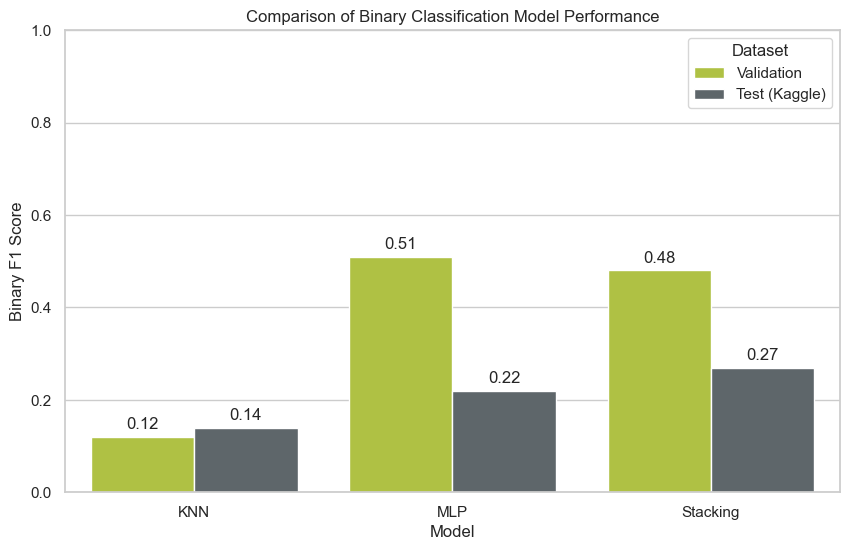

In [177]:
# Model names and F1-Score data
models = ["KNN", "MLP", "Stacking"]
f1_scores_val = [0.12, 0.51, 0.48]  # F1-Scores for Validation Set
f1_scores_test = [0.14, 0.22, 0.27]  # F1-Scores for Test Set (Kaggle)

# Create a DataFrame for the data
data = pd.DataFrame({
    'Model': models * 2,
    'F1 Score': f1_scores_val + f1_scores_test,
    'Dataset': ['Validation'] * 3 + ['Test (Kaggle)'] * 3
})

# Create the bar plot with specified colors and adjust y-scale
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    x='Model', 
    y='F1 Score', 
    hue='Dataset', 
    data=data, 
    palette=['#BED62F', '#5C666C']
)
plt.title('Comparison of Binary Classification Model Performance')
plt.xlabel('Model')
plt.ylabel('Binary F1 Score')
plt.ylim(0, 1)  # Adjusted y-scale to go up to 1

# Add annotations to each bar for clarity
for p in plot.patches:
    plot.annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.show()

In [178]:
# Create a DataFrame summarizing the results
summary_df = pd.DataFrame({
    'Model': models,
    'F1 Score (Validation)': f1_scores_val,
    'F1 Score (Test - Kaggle)': f1_scores_test
})

summary_df.set_index('Model')

F1 Score (Validation)  F1 Score (Test - Kaggle)
Model                                                    
KNN                        0.12                      0.14
MLP                        0.51                      0.22
Stacking                   0.48                      0.27

<a name="multiclass-classification"></a>
# 4. Multiclass Classification

<a name="feature-selection-multiclass-classification"></a>
## 4.1 Feature Selection For Multiclass Classification

In [129]:
# Create a copy of the original train dataframe 'df' for multi-class classification Feature Selection
df_feature_selection_multi = df.copy()

# Create a copy of the original test dataframe 'test_df_copy' for multi-class classification Feature Selection
df_test_multi = test_df_copy.copy()

In [130]:
# Resetting the numerical and categorical non ordinal features list to their original features, because, in the the Multiclass 
# classification task, the Feature Selection final decision might be different than in the Binary classification task, where
# these features have been removed
numerical_features.append('average_pulse_bpm')
categorical_non_ordinal_features.append('race')
categorical_non_ordinal_features.append('gender')

#### *Numerical Features*

##### *Correlation indices*

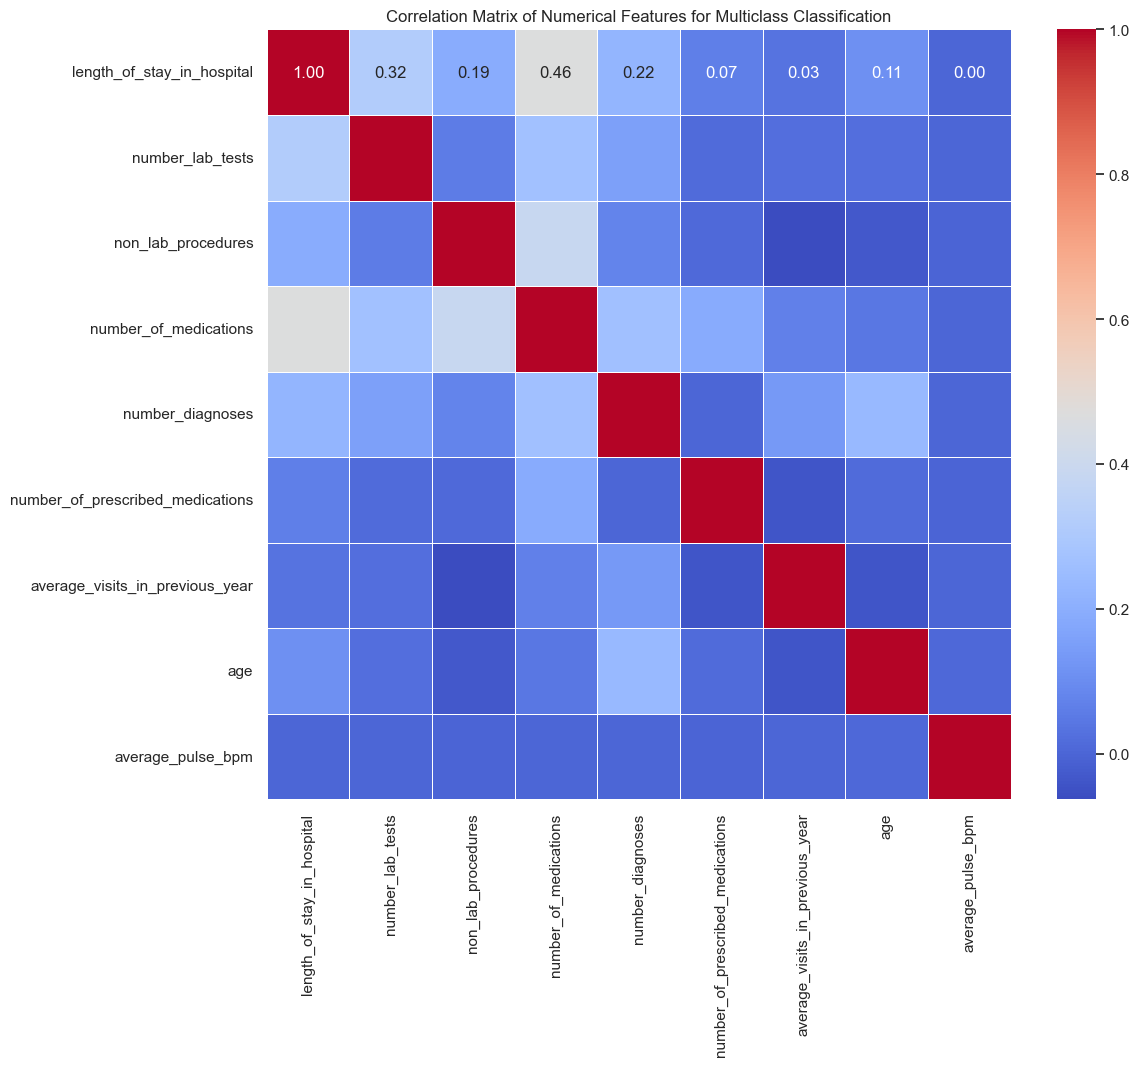

In [148]:
# Calculate the correlation matrix
correlation_matrix = df_feature_selection_multi[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn with correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Correlation Matrix of Numerical Features for Multiclass Classification')
plt.show()

It is noteworthy to point out that there are no strong or moderate correlations among the numeric features. The highest correlation observed was a weak/moderate association of 0.46 between ‘number_of_medications’ and ‘length_of_stay_in_hospital’. The absence of strong correlations necessitates the exploration of alternative criteria for identifying influential features within the dataset for Feature Selection purposes.

##### *Kruskal-Wallis H Test*

In [199]:
# Create an instance of SelectKBest with the f_classif scoring function
# and specify 'k' as the total number of numerical features
fs = SelectKBest(score_func=f_classif, k=len(numerical_features))

# Explanation:
# - SelectKBest is a feature selection method that evaluates features based on a scoring function.
# - Here, we use the f_classif scoring function, which is suitable for classification tasks.
# - The 'k' parameter is set to the total number of numerical features, implying that no feature will be excluded initially.

In [200]:
# Fit the SelectKBest feature selector on the numerical features and the target variable
fs.fit(df_feature_selection_multi[numerical_features], df_feature_selection_multi['readmitted_multiclass'])

# Explanation:
# - fs.fit() applies the feature selection method on the specified input features and target variable.
# - 'df_feature_selection_multi[numerical_features]' represents the numerical features used for the selection process.
# - 'df_feature_selection_multi['readmitted_multiclass']' is the target variable for the Multi classification task.
# - The fitting process involves evaluating the relevance of each feature in relation to the target variable
#   based on the scoring function (f_classif in this case) provided during the initialization of SelectKBest.

SelectKBest(k=9)

In [201]:
# Compute feature scores and p-values using this feature selection method
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_, 4))
features = pd.DataFrame(df_feature_selection_multi[numerical_features].columns)

# Combine features, scores, and p-values into a DataFrame
feature_score = pd.concat([features, features_score, features_pvalue], axis=1)
feature_score.columns = ["Input_Features", "Score", "P_Value"]

# Print the top 9 features based on their scores
print(feature_score.nlargest(9, columns="Score"))

                     Input_Features        Score  P_Value
6   average_visits_in_previous_year  1707.600492   0.0000
4                  number_diagnoses   494.883577   0.0000
0        length_of_stay_in_hospital   109.421455   0.0000
3             number_of_medications    91.347464   0.0000
2                non_lab_procedures    75.310011   0.0000
1                  number_lab_tests    54.850049   0.0000
7                               age    41.660057   0.0000
5  number_of_prescribed_medications     8.112430   0.0003
8                 average_pulse_bpm     1.425456   0.2404


Kruskal-Wallis H test suggests the removal of **average_pulse_bpm**

##### *RFE Logistic Regression*

Optimal number of features: 1
Selected features: Index(['average_visits_in_previous_year'], dtype='object')


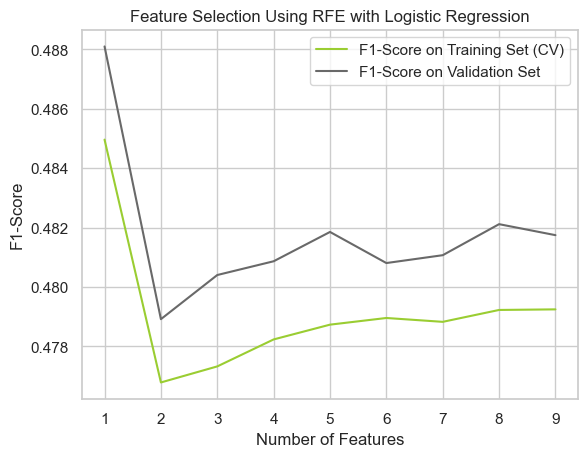

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract numerical features (X) and target variable (y) for multiclass classification
X_multiclass = df_feature_selection_multi[numerical_features]
y_multiclass = df_feature_selection_multi['readmitted_multiclass']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=42, stratify=y_multiclass)

# Define a range of number of features to select
nof_list = np.arange(1, len(X_train.columns) + 1)

# Lists to store average F1-Scores for training and selected features
train_f1_list = []
val_f1_list = []
selected_features_list = []

# Iterate over different numbers of features
for n in nof_list:
    # Initialize Logistic Regression model and RFE
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Fit RFE on the training data and transform training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # Apply 5-fold cross-validation on the training set with weighted F1 score
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    avg_cv_score = np.mean(cv_scores)
    
    # Store the F1-Score for training and selected features
    train_f1_list.append(avg_cv_score)
    selected_features_list.append(X_train.columns[rfe.support_])

    # Fit the model and make predictions on the validation set
    model.fit(X_train_rfe, y_train)
    val_pred = model.predict(rfe.transform(X_val))
    
    # Calculate F1-Score on validation set with weighted average
    val_f1 = f1_score(y_val, val_pred, average='weighted')
    val_f1_list.append(val_f1)

# Determine the optimal number of features and corresponding features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features_list[np.argmax(val_f1_list)]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with Logistic Regression")
plt.legend()
plt.show()

RFE Logistic Regression suggest the removal of every numerical feature except 'average_visits_in_previous_year'

<div style="background-color: red; color: white; padding: 10px;">
    <strong>WARNING:</strong> RUNNING THE BELOW SUPPORT VECTOR CLASSIFIER MIGHT TAKE A LONG TIME (APPROXIMATELY 2 HOURS)
</div>

##### *RFE Support Vector Classifier*

Optimal number of features: 1
Selected features: ['average_visits_in_previous_year']


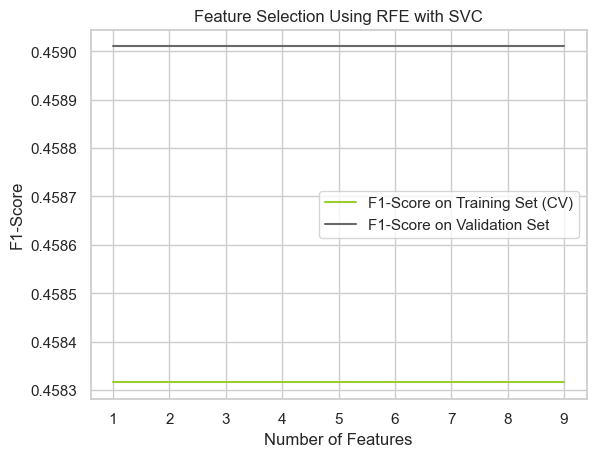

In [203]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Features and target variable in the training set
X = df_feature_selection_multi[numerical_features]
y = df_feature_selection_multi['readmitted_multiclass']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of the number of features to select
nof_list = np.arange(1, 10)

# Lists to store F1-Scores for training and validation sets and selected features
train_f1_list = []
val_f1_list = []
selected_features_list = []

# Iterate over different numbers of features
for n in nof_list:
    # Initialize Support Vector Classifier and Recursive Feature Elimination (RFE)
    model = SVC(kernel='linear', random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Transform the training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Store selected features
    selected_features = X_train.columns[rfe.support_].tolist()
    selected_features_list.append(selected_features)
    
    # Apply 5-fold cross-validation on the training set with weighted F1 score
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    avg_cv_score = np.mean(cv_scores)
    
    # Store F1-Scores for plotting
    train_f1_list.append(avg_cv_score)
    
    # Fit the model and make predictions on the validation set
    model.fit(X_train_rfe, y_train)
    val_pred = model.predict(rfe.transform(X_val))
    
    # Calculate F1-Score on validation set with weighted average
    val_f1 = f1_score(y_val, val_pred, average='weighted')
    val_f1_list.append(val_f1)

# Determine the optimal number of features and corresponding features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features_list[np.argmax(val_f1_list)]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with SVC")
plt.legend()
plt.show()

RFE Support Vector Classifier suggests the removal of every numerical feature except 'average_visits_in_previous_year'

##### *RFE Random Forest*

Optimal number of features: 9
Selected features: Index(['length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses',
       'number_of_prescribed_medications', 'average_visits_in_previous_year',
       'age', 'average_pulse_bpm'],
      dtype='object')


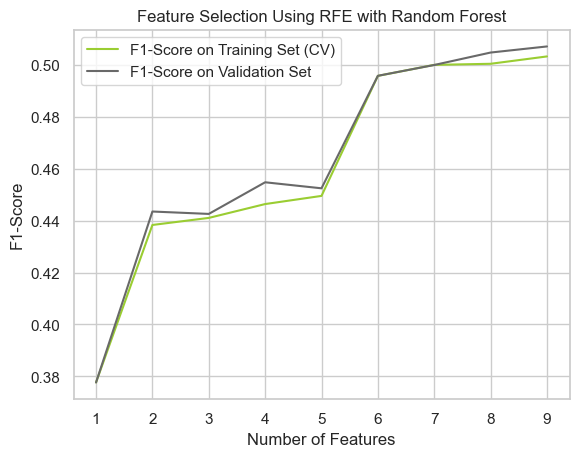

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Extract features (X) and target variable (y) for multiclass classification
X = df_feature_selection_multi[numerical_features]
y = df_feature_selection_multi['readmitted_multiclass']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of number of features to select
nof_list = np.arange(1, 10)

# Lists to store F1-Scores and selected features
train_f1_list = []
val_f1_list = []
selected_features = {}

# Iterate over different numbers of features
for n in nof_list:
    # Initialize Random Forest Classifier and RFE
    rf_model = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=rf_model, n_features_to_select=n)
    
    # Transform the training set
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Apply 5-fold cross-validation on the training set with weighted F1 score
    cv_scores = cross_val_score(rf_model, X_train_rfe, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    avg_cv_score = np.mean(cv_scores)
    
    # Store F1-Scores for plotting and selected features
    train_f1_list.append(avg_cv_score)
    selected_features[n] = X_train.columns[rfe.support_]

    # Fit the model and make predictions on the validation set
    rfe.fit(X_train, y_train)
    val_pred = rfe.predict(X_val)
    
    # Calculate F1-Score on validation set with weighted average
    val_f1 = f1_score(y_val, val_pred, average='weighted')
    val_f1_list.append(val_f1)

# Determine the optimal number of features
optimal_n = nof_list[np.argmax(val_f1_list)]
optimal_features = selected_features[optimal_n]

# Print the optimal number of features and the features themselves
print(f"Optimal number of features: {optimal_n}")
print("Selected features:", optimal_features)

# Plot the results
plt.plot(nof_list, train_f1_list, label="F1-Score on Training Set (CV)", color='yellowgreen')
plt.plot(nof_list, val_f1_list, label="F1-Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("F1-Score")
plt.title("Feature Selection Using RFE with Random Forest")
plt.legend()
plt.show()

RFE Random Forest suggests the keeping of 9 features: ['length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses',
       'number_of_prescribed_medications', 'average_visits_in_previous_year',
       'age', 'average_pulse_bpm']m']

##### *LASSO*

In [211]:
# Instantiate a LassoCV (Lasso Cross-Validation) regression model
reg = LassoCV()

# Fit the LassoCV model on the selected features and target variable
reg.fit(df_feature_selection_multi[numerical_features], df_feature_selection_multi['readmitted_multiclass'])# Extract the coefficients from the trained LassoCV model
coef = pd.Series(reg.coef_, index=df_feature_selection_multi[numerical_features].columns)

In [212]:
# Extract the coefficients from the trained LassoCV model
coef = pd.Series(reg.coef_, index=df_feature_selection_multi[numerical_features].columns)
coef

length_of_stay_in_hospital          0.013439
number_lab_tests                    0.013752
non_lab_procedures                 -0.043079
number_of_medications               0.009090
number_diagnoses                    0.071998
number_of_prescribed_medications    0.008546
average_visits_in_previous_year     0.154645
age                                 0.012317
average_pulse_bpm                  -0.005801
dtype: float64

In [213]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 0 variables


In [214]:
coef.sort_values()

non_lab_procedures                 -0.043079
average_pulse_bpm                  -0.005801
number_of_prescribed_medications    0.008546
number_of_medications               0.009090
age                                 0.012317
length_of_stay_in_hospital          0.013439
number_lab_tests                    0.013752
number_diagnoses                    0.071998
average_visits_in_previous_year     0.154645
dtype: float64

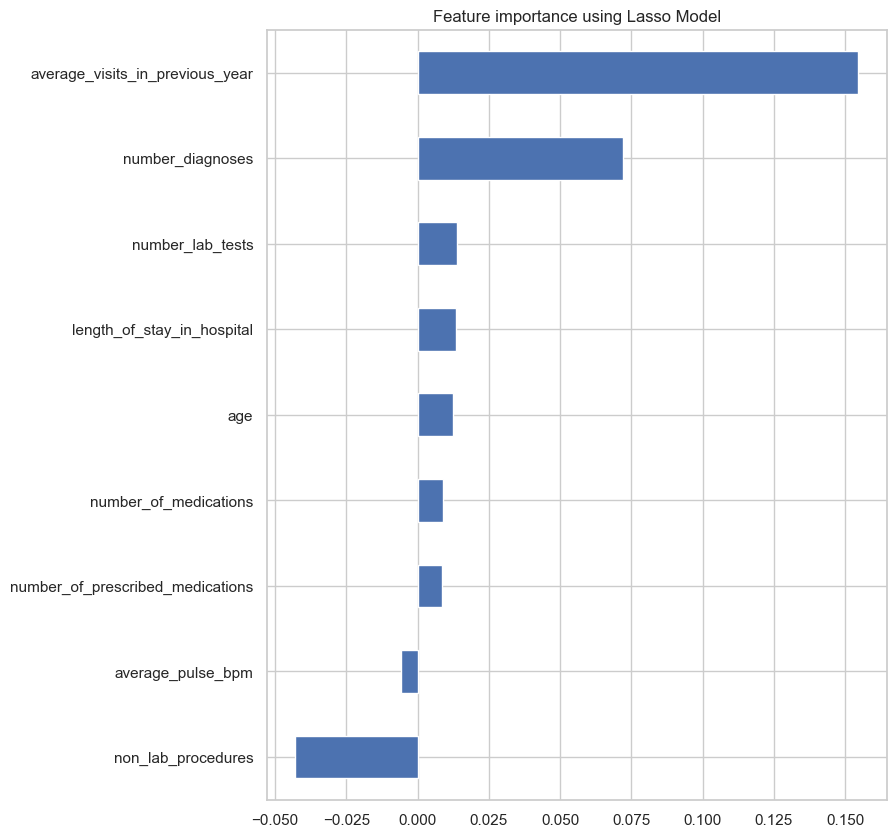

In [215]:
plot_importance(coef,'Lasso')

##### *Kendall's Tau*

In [216]:
# Create an empty DataFrame to store correlation coefficients and p-values
kendall_results = pd.DataFrame(index=numerical_features, columns=['tau', 'p-value'])

# Loop through all the numerical features and calculate the Kendall's Tau
for feature in numerical_features:
    tau, p_value = kendalltau(df_feature_selection_multi[feature], df_feature_selection_multi['readmitted_multiclass'])
    kendall_results.loc[feature] = [tau, p_value]

# Display the results
print(kendall_results)

                                       tau   p-value
length_of_stay_in_hospital        0.042592       0.0
number_lab_tests                  0.030538       0.0
non_lab_procedures               -0.041432       0.0
number_of_medications             0.050249       0.0
number_diagnoses                  0.093246       0.0
number_of_prescribed_medications  0.006041  0.083812
average_visits_in_previous_year   0.200476       0.0
age                               0.025187       0.0
average_pulse_bpm                 -0.00493  0.096255


Kendall's Tau suggests the removal of 'average_pulse_bpm' and 'number_of_prescribed_medications'

**Numerical Features Feature Selection Wrap Up**

| Predictor                           | Kruskal-Wallis | RFE Logistic Regression | RFE Support Vector Machine | RFE Random Forest | LASSO | Kendall's Tau |
| ----------------------------------- | -------------- | ----------------------- | -------------------------- | ----------------- | ----- | ----- |
| average_pulse_bpm                   | Discard        | Discard                 | Discard                    | Keep              | Keep  | Discard |
| length_of_stay_in_hospital          | Keep           | Discard                 | Discard                    | Keep              | Keep  | Keep |
| number_lab_tests                    | Keep           | Discard                 | Discard                    | Keep              | Keep  | Keep | 
| non_lab_procedures                  | Keep           | Discard                 | Discard                    | Keep              | Keep  | Keep |
| number_of_medications               | Keep           | Discard                 | Discard                    | Keep              | Keep  | Keep |
| number_diagnoses                    | Keep           | Discard                 | Discard                    | Keep              | Keep  | Keep |
| number_of_prescribed_medications    | Keep           | Discard                 | Discard                    | Keep              | Keep  | Discard |
| average_visits_in_previous_year     | Keep           | Keep                    | Keep                       | Keep              | Keep  | Keep  | Keep |
| age                                 | Keep           | Discard                 | Discard                    | Keep              | Keep | Keep |

In [131]:
# Drop the 'average_pulse_bpm' feature from the training dataset for multi-class classification, since more than a half of the Feature
# Selection criteria suggested the removal of this feature
df_feature_selection_multi.drop('average_pulse_bpm', axis=1, inplace=True)

# Drop the 'average_pulse_bpm' feature from the test dataset for multi-class classification for consistency
df_test_multi.drop('average_pulse_bpm', axis=1, inplace=True)

In [132]:
# Remove 'average_pulse_bpm' from the list of numerical features
numerical_features.remove('average_pulse_bpm')

#### *Categorical Non-Ordinal Features*

##### *Chi-Squared*

In [221]:
# Choosing a significance level of 0.05
significance_level = 0.05

# Initialize a list to store features to be removed
features_to_remove = []

# Loop through each categorical non-ordinal feature
for feature in categorical_non_ordinal_features:
    # Create a contingency table for the current feature and multiclass target variable
    contingency_table = pd.crosstab(df_feature_selection_multi[feature], df_feature_selection_multi['readmitted_multiclass'])
    
    # Perform the chi-squared test for independence
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Keep track of features with p-values above the significance level
    if p >= significance_level:
        features_to_remove.append((feature, p))

print(features_to_remove)

# Print the features to be removed
for feature, p_value in features_to_remove:
    print(f"Remove {feature} for Multiclass Classification (p-value = {p_value})")

[]


##### *Random Forest*

In [222]:
X_cat = df_feature_selection_multi[categorical_non_ordinal_features]
y = df_feature_selection_multi['readmitted_multiclass']

# Identify categorical features for one-hot encoding
categorical_features = X_cat.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # keep non-categorical features as they are
)

# Create a pipeline with the column transformer and the random forest classifier
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=5))
])

# Fit the model on the data
rf_model.fit(X_cat, y)

# Access feature importances
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a dictionary with feature names and their importances
feature_importance_dict = dict(zip(X_cat.columns, feature_importances))

# Order feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances in descending order
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

admission_type: 0.022150370472350384
payer_code: 0.022000236698983912
additional_diagnosis: 0.017439085454063183
discharge_disposition: 0.016075813606610687
glucose_test_result: 0.015050426672043503
medical_specialty: 0.014469026115709327
secondary_diagnosis: 0.011246703146482876
gender: 0.004418767619442437
a1c_test_result: 0.0009768757208301864
race: 0.00038169723444471203
primary_diagnosis: 5.875755482091888e-05
admission_source: 0.0
change_in_meds_during_hospitalization: 0.0
prescribed_diabetes_meds: 0.0


The results of Random Forest are unclear, since they are all low.

##### *Mutual Information*

In [223]:
X_cat_one_hot = pd.get_dummies(df_feature_selection_multi[categorical_non_ordinal_features], drop_first=True)
y = df_feature_selection_multi['readmitted_multiclass']

# Calculate Mutual Information between each feature and the target variable
mutual_info_scores = mutual_info_classif(X_cat_one_hot, y, discrete_features='auto', random_state=42)

# Create a DataFrame to display feature names and their corresponding Mutual Information scores
feature_importance_df = pd.DataFrame({'Feature': X_cat_one_hot.columns, 'Mutual_Information': mutual_info_scores})

# Sort the DataFrame by Mutual Information scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mutual_Information', ascending=False)

# Print the feature importance information
print("Feature Importance based on Mutual Information:")
print(feature_importance_df)

# Explanation:
# This code calculates the Mutual Information scores between each one-hot encoded categorical non-ordinal feature and the
# multiclass target, 'readmitted_multiclass'. Mutual Information measures the dependence between variables, and higher scores
# indicate stronger relationships. The resulting DataFrame displays the features sorted by their Mutual Information scores,
# helping identify which features are more informative for predicting the target variable.

Feature Importance based on Mutual Information:
                                              Feature  Mutual_Information
86                   glucose_test_result_Not measured            0.010466
89                       a1c_test_result_Not measured            0.007388
83                       prescribed_diabetes_meds_Yes            0.006983
58  secondary_diagnosis_endocrine, nutritional and...            0.005498
40  primary_diagnosis_diseases of the skin and sub...            0.005070
46                        primary_diagnosis_neoplasms            0.004740
63                      secondary_diagnosis_neoplasms            0.004705
44             primary_diagnosis_injury and poisoning            0.004628
33  primary_diagnosis_diseases of the blood and bl...            0.004420
31  primary_diagnosis_complications of pregnancy, ...            0.004052
76  additional_diagnosis_external causes of injury...            0.003798
91                                     race_Caucasian           

The results of Mutual Information are unclear, since they are all low.

**Categorical-Non-Ordinal Feature Selection Wrap Up**

| Predictor                               | Chi-Squared  | Random Forest | Mutual Information |
| --------------------------------------- | ------------ | ------------- | ------------------ |
| race                                    | Keep         | No trust      | No trust           |
| gender                                  | Keep         | No trust      | No trust           |
| payer_code                              | Keep         | No trust      | No trust           |
| medical_specialty                       | Keep         | No trust      | No trust           |
| discharge_disposition                   | Keep         | No trust      | No trust           |
| admission_source                        | Keep         | No trust      | No trust           |
| primary_diagnosis                       | Keep         | No trust      | No trust           |
| secondary_diagnosis                     | Keep         | No trust      | No trust           |
| additional_diagnosis                    | Keep         | No trust      | No trust           |
| change_in_meds_during_hospitalization   | Keep         | No trust      | No trust           |
| prescribed_diabetes_meds                | Keep         | No trust      | No trust           |
| glucose_test_result                     | Keep         | No trust      | No trust           |
| a1c_test_result                         | Keep         | No trust      | No trust           |

<a name="feature-encoding-multiclass-classification"></a>
## 4.2 Feature Encoding For Multiclass Classification

In [133]:
# A reminder of the train dataset structure after Feature Selection for Multiclass classification
df_feature_selection_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71229 entries, 0 to 71228
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             71229 non-null  int64  
 1   race                                   71229 non-null  object 
 2   gender                                 71229 non-null  object 
 3   age                                    71229 non-null  float64
 4   payer_code                             71229 non-null  object 
 5   outpatient_visits_in_previous_year     71229 non-null  int64  
 6   emergency_visits_in_previous_year      71229 non-null  int64  
 7   inpatient_visits_in_previous_year      71229 non-null  int64  
 8   admission_type                         71229 non-null  object 
 9   medical_specialty                      71229 non-null  object 
 10  discharge_disposition                  71229 non-null  object 
 11  ad

In [134]:
# Extract unique medications from the 'medication' feature for the train dataset
unique_medications = df_feature_selection_multi['medication'].dropna().str.split(',').explode().unique()

# Create dummy variables for each unique medication
for medication in unique_medications:
    df_feature_selection_multi[medication] = df_feature_selection_multi['medication'].str.contains(medication, na=False).astype(int)

# Drop the original 'medication' feature
df_feature_selection_multi.drop('medication', axis=1, inplace=True)

# Replace NaN by 'no_medication'
df_feature_selection_multi.rename(columns={'NaN': 'no_medication'}, inplace=True)

# Display the updated DataFrame
df_feature_selection_multi.head()

patient_id             race  gender       age      payer_code  \
0       70110        Caucasian  Female  0.581151   No_payer_code   
1    29775006  AfricanAmerican    Male -0.704822   No_payer_code   
2    80729253        Caucasian  Female -0.061835   No_payer_code   
3     2919042  AfricanAmerican    Male -0.061835  Has_payer_code   
4    84871971        Caucasian  Female  0.581151  Has_payer_code   

   outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   1                                  0   

   inpatient_visits_in_previous_year admission_type medical_specialty  ...  \
0                                  2      Emergency     Uncategorized  ...   
1                                  0      Emergency     Uncategorized  ...   
2                                  1  Uncategorized     Uncategorized  ...   
3                                  1      Emergency        Cardiology  ...   
4                                  0       Elective     Uncategorized  ...   

  tolazamide troglitazone  miglitol  chlorpropamide  glipizide-metformin  \
0          0            0         0               0                    0   
1          0            0         0               0                    0   
2          0            0         0               0                    0   
3          0            0         0               0                    0   
4          0            0         0               0                    0   

   tolbutamide glimepiride-pioglitazone metformin-pioglitazone acetohexamide  \
0            0                        0                      0             0   
1            0                        0                      0             0   
2            0                        0                      0             0   
3            0                        0                      0             0   
4            0                        0                      0             0   

   metformin-rosiglitazone  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 50 columns]

In [135]:
# Display the list of all features in the train dataset to confirm the success of the one-hot-encoding of the 'medication' feature
df_feature_selection_multi.columns

Index(['patient_id', 'race', 'gender', 'age', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'discharge_disposition', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'readmitted_binary',
       'readmitted_multiclass', 'number_of_prescribed_medications',
       'average_visits_in_previous_year', 'no_medication', 'insulin',
       'glimepiride', 'metformin', 'nateglinide', 'glipizide', 'glyburide',
       'rosiglitazone', 'repaglinide', 'pioglitazone', 'glyburide-metformin',
       'acarbose', 'tolazamide', 'troglitazone', 'miglitol', 'chlorpropa

In [136]:
# Extract unique medications from the 'medication' feature in the test dataset
unique_medications = df_test_multi['medication'].dropna().str.split(',').explode().unique()

# Create dummy variables for each unique medication
for medication in unique_medications:
    df_test_multi[medication] = df_test_multi['medication'].str.contains(medication, na=False).astype(int)

# Drop the original 'medication' feature
df_test_multi.drop('medication', axis=1, inplace=True)

# Replace NaN by 'no_medication'
df_test_multi.rename(columns={'NaN': 'no_medication'}, inplace=True)

# Display the updated DataFrame
df_test_multi.head()

patient_id             race gender       age      payer_code  \
0   103232799        Caucasian   Male  1.224138  Has_payer_code   
1    93395304        Caucasian   Male -2.633781  Has_payer_code   
2     6281586  AfricanAmerican   Male -1.990795   No_payer_code   
3    67381308        Caucasian   Male -0.704822  Has_payer_code   
4    71670204        Caucasian   Male -0.061835   No_payer_code   

   outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   inpatient_visits_in_previous_year admission_type medical_specialty  ...  \
0                                  0      Emergency     Uncategorized  ...   
1                                  1      Emergency     Uncategorized  ...   
2                                  0      Emergency        Cardiology  ...   
3                                  0  Uncategorized     Uncategorized  ...   
4                                  0      Emergency        Cardiology  ...   

  glyburide-metformin miglitol  acarbose  nateglinide  chlorpropamide  \
0                   0        0         0            0               0   
1                   0        0         0            0               0   
2                   0        0         0            0               0   
3                   0        0         0            0               0   
4                   0        0         0            0               0   

   tolazamide tolbutamide glipizide-metformin metformin-rosiglitazone  \
0           0           0                   0                       0   
1           0           0                   0                       0   
2           0           0                   0                       0   
3           0           0                   0                       0   
4           0           0                   0                       0   

   troglitazone  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 45 columns]

In [137]:
# Display the list of all features in the test dataset to confirm the success of the one-hot-encoding of the 'medication' feature
df_test_multi.columns

Index(['patient_id', 'race', 'gender', 'age', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'discharge_disposition', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'number_of_prescribed_medications',
       'average_visits_in_previous_year', 'metformin', 'no_medication',
       'insulin', 'glyburide', 'glipizide', 'pioglitazone', 'rosiglitazone',
       'glimepiride', 'repaglinide', 'glyburide-metformin', 'miglitol',
       'acarbose', 'nateglinide', 'chlorpropamide', 'tolazamide',
       'tolbutamide', 'glipizide-metformin', 'metformin-rosigl

In [138]:
# Create dummy variables for categorical non-ordinal features in the train dataset
dummy_variables = pd.get_dummies(df_feature_selection_multi[categorical_non_ordinal_features])

# Concatenate the dummy variables with the original DataFrame
df_feature_selection_multi = pd.concat([df_feature_selection_multi, dummy_variables], axis=1)

# Drop the original categorical non-ordinal features from the DataFrame
df_feature_selection_multi = df_feature_selection_multi.drop(categorical_non_ordinal_features, axis=1)

# Display the updated DataFrame's columns
df_feature_selection_multi.columns

Index(['patient_id', 'age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses',
       ...
       'a1c_test_result_>8', 'a1c_test_result_Norm',
       'a1c_test_result_Not measured', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female',
       'gender_Male'],
      dtype='object', length=145)

In [139]:
# Create dummy variables for categorical non-ordinal features in the test dataset
dummy_variables = pd.get_dummies(df_test_multi[categorical_non_ordinal_features])

# Concatenate the dummy variables with the original DataFrame
df_test_multi = pd.concat([df_test_multi, dummy_variables], axis=1)

# Drop the original categorical non-ordinal features from the DataFrame
df_test_multi = df_test_multi.drop(categorical_non_ordinal_features, axis=1)

# Display the updated DataFrame's columns
df_test_multi.columns

Index(['patient_id', 'age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses',
       ...
       'a1c_test_result_>8', 'a1c_test_result_Norm',
       'a1c_test_result_Not measured', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female',
       'gender_Male'],
      dtype='object', length=141)

In [140]:
# Print the shape of the train dataset before feature consistency
print(f'Shape of the train dataset before feature consistency: {df_feature_selection_multi.shape}')

# Print the shape of the test dataset before feature consistency
print(f'Shape of the test dataset before feature consistency: {df_test_multi.shape}')

Shape of the train dataset before feature consistency: (71229, 145)
Shape of the test dataset before feature consistency: (30530, 141)


In [141]:
print(f'List of features present in the train dataset that are not present in the test dataset: {[column for column in df_feature_selection_multi.columns if column not in df_test_multi.columns]}')

List of features present in the train dataset that are not present in the test dataset: ['readmitted_binary', 'readmitted_multiclass', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'acetohexamide']


In [142]:
print(f'List of features present in the test dataset that are not present in the train dataset: {[column for column in df_test_multi.columns if column not in df_feature_selection_multi.columns]}')

List of features present in the test dataset that are not present in the train dataset: ['medical_specialty_Dermatology']


In [143]:
# Identify common features, excluding 'readmitted_multiclass'
common_features = list(set(df_feature_selection_multi.columns) & set(df_test_multi.columns) - {'readmitted_multiclass'})

# Include 'readmitted_multiclass' in the list of common features for the train dataset
common_features_train = common_features + ['readmitted_multiclass']

# Keep only the common features in both datasets (keeping the multiclass target exclusively in the train dataset)
df_feature_selection_multi = df_feature_selection_multi[common_features_train]
df_test_multi = df_test_multi[common_features]

In [144]:
# One last preview of the train dataset before the Multiclass Classification
df_feature_selection_multi.head(3)

medical_specialty_Dentistry  \
0                        False   
1                        False   
2                        False   

   additional_diagnosis_diseases of the genitourinary system  \
0                                              False           
1                                              False           
2                                              False           

   number_diagnoses  tolbutamide  insulin  \
0          0.298792            0        0   
1          0.814834            0        1   
2         -0.733293            0        1   

   primary_diagnosis_symptoms, signs, and ill-defined conditions  \
0                                              False               
1                                              False               
2                                              False               

   medical_specialty_Radiologist  \
0                          False   
1                          False   
2                          False   

   secondary_diagnosis_diseases of the nervous system and sense organs  \
0                                              False                     
1                                              False                     
2                                              False                     

   a1c_test_result_Norm  additional_diagnosis_injury and poisoning  ...  \
0                 False                                      False  ...   
1                 False                                      False  ...   
2                 False                                      False  ...   

   additional_diagnosis_diseases of the respiratory system  \
0                                               True         
1                                              False         
2                                              False         

   medical_specialty_Surgeon  medical_specialty_Uncategorized  \
0                      False                             True   
1                      False                             True   
2                      False                             True   

   secondary_diagnosis_diseases of the musculoskeletal system and connective tissue  \
0                                              False                                  
1                                              False                                  
2                                              False                                  

   medical_specialty_Pathology  a1c_test_result_>8  number_lab_tests  \
0                        False               False          0.249692   
1                        False               False          1.420621   
2                        False               False          0.860611   

   secondary_diagnosis_complications of pregnancy, childbirth, and the puerperium  \
0                                              False                                
1                                              False                                
2                                              False                                

   additional_diagnosis_mental disorders  readmitted_multiclass  
0                                  False                      2  
1                                  False                      0  
2                                  False                      0  

[3 rows x 141 columns]

In [145]:
# One last preview of the test dataset before the Multiclass Classification
df_test_multi.head(3)

medical_specialty_Dentistry  \
0                        False   
1                        False   
2                        False   

   additional_diagnosis_diseases of the genitourinary system  \
0                                              False           
1                                              False           
2                                              False           

   number_diagnoses  tolbutamide  insulin  \
0         -0.733293            0        0   
1         -0.217251            0        0   
2         -0.733293            0        1   

   primary_diagnosis_symptoms, signs, and ill-defined conditions  \
0                                              False               
1                                              False               
2                                               True               

   medical_specialty_Radiologist  \
0                          False   
1                          False   
2                          False   

   secondary_diagnosis_diseases of the nervous system and sense organs  \
0                                              False                     
1                                              False                     
2                                              False                     

   a1c_test_result_Norm  additional_diagnosis_injury and poisoning  ...  \
0                 False                                      False  ...   
1                 False                                      False  ...   
2                 False                                      False  ...   

   primary_diagnosis_diseases of the genitourinary system  \
0                                              False        
1                                              False        
2                                              False        

   additional_diagnosis_diseases of the respiratory system  \
0                                              False         
1                                              False         
2                                              False         

   medical_specialty_Surgeon  medical_specialty_Uncategorized  \
0                      False                             True   
1                      False                             True   
2                      False                            False   

   secondary_diagnosis_diseases of the musculoskeletal system and connective tissue  \
0                                              False                                  
1                                              False                                  
2                                              False                                  

   medical_specialty_Pathology  a1c_test_result_>8  number_lab_tests  \
0                        False               False          0.249692   
1                        False               False          1.726080   
2                        False               False          0.046052   

   secondary_diagnosis_complications of pregnancy, childbirth, and the puerperium  \
0                                              False                                
1                                              False                                
2                                              False                                

   additional_diagnosis_mental disorders  
0                                  False  
1                                  False  
2                                  False  

[3 rows x 140 columns]

<a name="modeling-multiclass-classification"></a>
## 4.3 Modeling for Multiclass Classification

In [168]:
# Remembering the distribution, in percentage, of the multinomial labels in the multiclass target
df_feature_selection_multi['readmitted_multiclass'].value_counts(normalize=True)

readmitted_multiclass
0    0.539106
2    0.349282
1    0.111612
Name: proportion, dtype: float64

In [169]:
# Update the 'readmitted_multiclass' label for encounters with 'discharge_disposition_Expired' equal to True to 1.
df_feature_selection_multi[df_feature_selection_multi['discharge_disposition_Expired'] == True]['readmitted_multiclass'] = 1

# Explanation:
# By exploring the data, it was observed that every encounter where the feature 'discharge_disposition' had the value 'Expired'
# was associated with a 'readmitted_multiclass' value of 0 ('No'). It was inferred that these encounters represented situations
# where the patients did not survive and, therefore, were not readmitted. To enhance the model's performance, a decision was made
# to update the 'readmitted_multiclass' label for these encounters to 1 ('<30') in the training dataset. This adjustment allows
# the model to learn patterns associated with patients whose health status was critical enough to result in death. Consequently,
# the model may better predict '<30' for similar encounters in the test dataset, capturing the likelihood of an unhealthy outcome,
# that might very likely lead to a readmission in less than 30 days.

In [170]:
# Extract features (X) and target variable (y) for multiclass classification
X_multiclass = df_feature_selection_multi.drop(columns=['patient_id', 'readmitted_multiclass'], axis=1)
y_multiclass = df_feature_selection_multi['readmitted_multiclass']

# First split: Separate out a test set
# Here, we reserve 20% of the data as the test set. This test set will not be used 
# in the model training process and will serve as unseen data for evaluating the Multiclass model's performance.
X_temp, X_test, y_temp, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.2, 
                                                  random_state=42, stratify=y_multiclass)

# Second split: Divide the remaining data into training and validation sets
# The remaining 80% of the data is split again, this time into training and validation sets.
# We use about 37.5% of this portion (which is 30% of the original dataset) as the validation set.
# Thus, the final splitting percentages are: 50% (Train) - 30% (Validation) - 20% (Test).
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.375, 
                                                  random_state=42, stratify=y_temp)

# Initialize a list to store F1-Scores for later comparison between models
# We will use this list to keep track of the F1-Scores of different models, allowing us to compare their performances, both on the 
# validation and on the test set.
f1_scores_list_val = []
f1_scores_list_test = []

### *K-Nearest Neighbors*

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Define the parameter grid for Grid Search
param_grid_knn = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create GridSearchCV instance with Weighted F1-Score as the scoring metric
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='f1_weighted', cv=5, n_jobs=-1)

# Fit the grid search on the training data
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model from Grid Search
best_knn_model = grid_search_knn.best_estimator_

# Predictions on the validation and test data using the best model
y_pred_val_knn = best_knn_model.predict(X_val)
y_pred_test_knn = best_knn_model.predict(X_test)

# Calculate the F1-Score on the validation and test sets using the best KNN model
f1_score_val_knn = f1_score(y_val, y_pred_val_knn, average='weighted')
f1_score_test_knn = f1_score(y_test, y_pred_test_knn, average='weighted')

# Append the F1-Scores to their respective lists
f1_scores_list_val.append(('KNN', f1_score_val_knn))
f1_scores_list_test.append(('KNN', f1_score_test_knn))

# Print the best parameters and F1-Scores
print("Best parameters (KNN):", grid_search_knn.best_params_)
print("F1-Score on validation set (Best KNN model):", f1_score_val_knn)
print("F1-Score on test set (Best KNN model):", f1_score_test_knn)

Best parameters (KNN): {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
F1-Score on validation set (Best KNN model): 0.511592912881799
F1-Score on test set (Best KNN model): 0.5108179097113599


### *Gaussian Naive Bayes*

In [172]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd

# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Define the parameter grid for GridSearchCV
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create GridSearchCV instance
grid_search_gnb = GridSearchCV(gnb_model, param_grid_gnb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the grid search on the training data
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters
best_params_gnb = grid_search_gnb.best_params_

# Print the best parameters
print("Best Parameters for Gaussian Naive Bayes:", best_params_gnb)

# Use the best parameters to initialize the Gaussian Naive Bayes model
best_gnb_model = GaussianNB(**best_params_gnb)

# Fit the best Gaussian Naive Bayes model on the training data
best_gnb_model.fit(X_train, y_train)

# Predictions on the validation data using the best model
y_pred_val_best_gnb = best_gnb_model.predict(X_val)

# Calculate the F1-Score on the validation set using the best Gaussian Naive Bayes model
f1_score_val_best_gnb = f1_score(y_val, y_pred_val_best_gnb, average='weighted')

# Predictions on the test data using the best model
y_pred_test_best_gnb = best_gnb_model.predict(X_test)

# Calculate the F1-Score on the test set using the best Gaussian Naive Bayes model
f1_score_test_best_gnb = f1_score(y_test, y_pred_test_best_gnb, average='weighted')

# Append the F1-Scores to their respective lists
f1_scores_list_val.append(('Gaussian Naive Bayes', f1_score_val_best_gnb))
f1_scores_list_test.append(('Gaussian Naive Bayes', f1_score_test_best_gnb))

# Print the F1-Scores
print("F1-Score on validation set (Best Gaussian Naive Bayes):", f1_score_val_best_gnb)
print("F1-Score on test set (Best Gaussian Naive Bayes):", f1_score_test_best_gnb)

Best Parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-07}
F1-Score on validation set (Best Gaussian Naive Bayes): 0.11694971849308436
F1-Score on test set (Best Gaussian Naive Bayes): 0.11910445313268203


### *Histogram-based Gradient Boosting Classification Tree*

In [173]:
# Initialize the Histogram-Based Boosting Classifier
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_hgb = {
    'max_iter': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize GridSearchCV
grid_search_hgb = GridSearchCV(hgb_model, param_grid_hgb, cv=5, scoring='f1_weighted', verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search_hgb.fit(X_train, y_train)

# Get the best parameters
best_params_hgb = grid_search_hgb.best_params_

# Print the best parameters
print("Best Parameters for Histogram-Based Boosting:", best_params_hgb)

# Use the best parameters to initialize the model
best_hgb_model = HistGradientBoostingClassifier(**best_params_hgb, random_state=42)

# Fit the best model on the training data
best_hgb_model.fit(X_train, y_train)

# Predictions and F1-Score calculations for validation and test data
y_pred_val_best_hgb = best_hgb_model.predict(X_val)
y_pred_test_best_hgb = best_hgb_model.predict(X_test)
f1_score_val_best_hgb = f1_score(y_val, y_pred_val_best_hgb, average='weighted')
f1_score_test_best_hgb = f1_score(y_test, y_pred_test_best_hgb, average='weighted')

# Append F1-Scores to their respective lists
f1_scores_list_val.append(('Histogram-Based Gradient Boosting', f1_score_val_best_hgb))
f1_scores_list_test.append(('Histogram-Based Gradient Boosting', f1_score_test_best_hgb))

# Print the F1-Scores
print("F1-Score on validation set (Best Histogram-Based Gradient Boosting):", f1_score_val_best_hgb)
print("F1-Score on test set (Best Histogram-Based Gradient Boosting):", f1_score_test_best_hgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Histogram-Based Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 50}
F1-Score on validation set (Best Histogram-Based Gradient Boosting): 0.5454155263875191
F1-Score on test set (Best Histogram-Based Gradient Boosting): 0.5466933466194203


### *Stacking (KNN, Gaussian Naive Bayes, Histogram-Based Gradient Boosting)*

In [174]:
# Initialize the best models with the parameters found from GridSearchCV
best_knn_model = KNeighborsClassifier(**grid_search_knn.best_params_)
best_gnb_model = GaussianNB(**grid_search_gnb.best_params_)
best_hgb_model = HistGradientBoostingClassifier(**grid_search_hgb.best_params_, random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[
        ('knn', best_knn_model),
        ('gnb', best_gnb_model),
        ('hgb', best_hgb_model)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predictions and F1-Score calculations for validation and test data
y_pred_val_stacking = stacking_model.predict(X_val)
y_pred_test_stacking = stacking_model.predict(X_test)
f1_score_val_stacking = f1_score(y_val, y_pred_val_stacking, average='weighted')
f1_score_test_stacking = f1_score(y_test, y_pred_test_stacking, average='weighted')

# Append F1-Scores to their respective lists
f1_scores_list_val.append(('Stacking', f1_score_val_stacking))
f1_scores_list_test.append(('Stacking', f1_score_test_stacking))

# Print the F1-Scores
print("F1-Score on validation set (Stacking):", f1_score_val_stacking)
print("F1-Score on test set (Stacking):", f1_score_test_stacking)

F1-Score on validation set (Stacking): 0.5476446606608397
F1-Score on test set (Stacking): 0.5472635568698992


#### *Plotting the F1-Scores on Multiclass Classification*

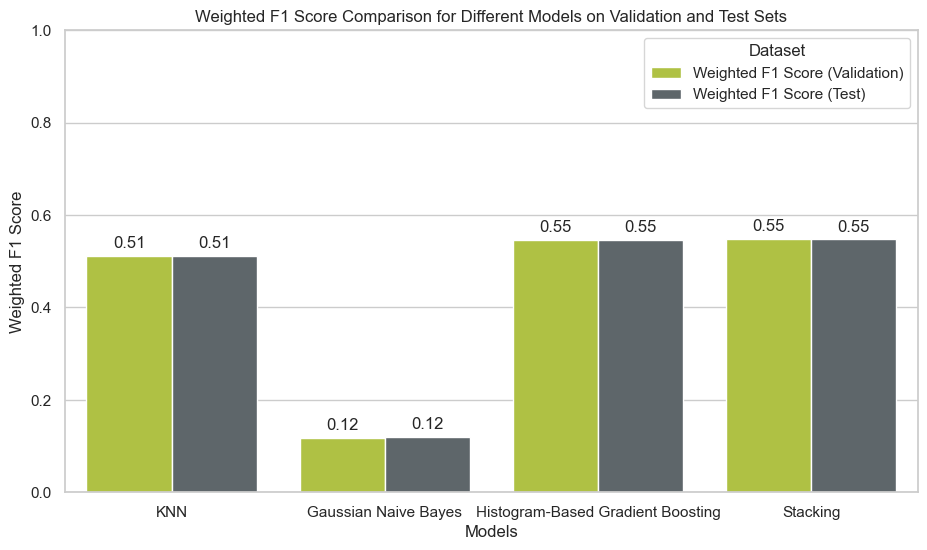

In [175]:
# Unpack the tuples into lists
model_names, f1_scores_val = zip(*f1_scores_list_val)
_, f1_scores_test = zip(*f1_scores_list_test)

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Weighted F1 Score (Validation)': f1_scores_val,
    'Weighted F1 Score (Test)': f1_scores_test
})

# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df.melt(id_vars='Model', var_name='Dataset', value_name='Weighted F1 Score')

# Create a bar plot using seaborn with the desired colors
plt.figure(figsize=(11, 6))
barplot = sns.barplot(
    x='Model', 
    y='Weighted F1 Score', 
    hue='Dataset', 
    data=df_melted, 
    palette=['#BED62F', '#5C666C']  # Using the desired colors
)
plt.xlabel('Models')  # Label for the x-axis
plt.ylabel('Weighted F1 Score')  # Label for the y-axis
plt.title('Weighted F1 Score Comparison for Different Models on Validation and Test Sets')  # Title of the plot
plt.ylim(0, 1)  # Adjust the y-axis limits

# Add the scores above the bars with two decimal places
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),  # Format with 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.legend(title='Dataset', loc='upper right')  # Add legend
plt.show()

In [176]:
df.set_index('Model')

Weighted F1 Score (Validation)  \
Model                                                               
KNN                                                      0.511593   
Gaussian Naive Bayes                                     0.116950   
Histogram-Based Gradient Boosting                        0.545416   
Stacking                                                 0.547645   

                                   Weighted F1 Score (Test)  
Model                                                        
KNN                                                0.510818  
Gaussian Naive Bayes                               0.119104  
Histogram-Based Gradient Boosting                  0.546693  
Stacking                                           0.547264

In the multiclass classification task aimed at predicting hospital readmissions, various models were evaluated to determine the most effective approach. The models were assessed based on their Weighted F1 Scores for both the validation and test sets. The F1 Score is a crucial metric in this context, as it provides a balance between precision and recall, especially important in datasets with uneven class distributions.

The models and their corresponding performances are summarized as follows:

- **KNN (K-Nearest Neighbors)**: This model achieved moderate performance with a Weighted F1 Score of approximately 0.51 on both validation and test datasets. This indicates a decent level of generalization but suggests room for improvement.

- **Gaussian Naive Bayes**: This model exhibited significantly lower Weighted F1 Scores, around 0.12 on validation and 0.12 on the test set. The underperformance could be attributed to the model's assumptions about feature distributions not aligning well with the actual data characteristics.

- **Histogram-Based Gradient Boosting**: This method showed a noticeable improvement, with Weighted F1 Scores around 0.55 for both validation and test sets. This suggests the model's effectiveness in handling the dataset's complexity compared to the simpler KNN and Naive Bayes models.

- **Stacking**: Incorporating a combination of KNN, Gaussian Naive Bayes, and Histogram-Based Gradient Boosting, with a Logistic Regression as the final estimator, the Stacking model, presented a very identical performance as the Histogram-Based Gradient Boosting. It achieved a Weighted F1 Scores of approximately 0.55 on both datasets. This performance underscores the benefit of leveraging the strengths of multiple models.

In selecting the final model, the Histogram-Based Gradient Boosting (HGB) and Stacking Classifier showed similar Weighted F1 Scores on validation and test datasets. The HGB model was chosen for predictions on the unseen test dataset due to its lower complexity and higher interpretability compared to the Stacking Classifier. HGB's single algorithm approach offers computational efficiency and quicker training times. Its interpretability is vital for healthcare applications where clear justification of predictions is essential. Despite the Stacking Classifier's robustness, HGB's simplicity and transparency make it more suitable for practical, real-world implementation.

### *Test dataset predictions*

In [177]:
# Select the features from the test dataset (excluding 'patient_id')
X_test_multi = df_test_multi.drop(columns=['patient_id'], axis=1, errors='ignore')

# Use the best HGB model to make predictions on the original test dataset
predictions = best_hgb_model.fit(X_train, y_train).predict(X_test_multi)

print(f'Predictions on the test dataset (unlabeled): {predictions}')

Predictions on the test dataset (unlabeled): [0 0 0 ... 0 0 2]


In [178]:
# Since it was previously explored that encounters who had 'Expired' in their 'discharge_disposition' feature had died and 
# therefore won't be readmitted, this mask is to isolate those instances to, immediately after, predict them as 'No'
mask_expired = X_test_multi['discharge_disposition_Expired'] == True

In [179]:
# Map the 0 predictions to 'No', 1 predictions to '<30' and 2 predictions to '>30'
y_pred_mapped = pd.Series(predictions).map({0: 'No', 1: '<30', 2: '>30'})
y_pred_mapped

0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15       >30
16        No
17        No
18       >30
19        No
20        No
21        No
22       >30
23        No
24        No
25        No
26        No
27        No
28        No
29        No
30        No
31        No
32        No
33        No
34        No
35        No
36        No
37        No
38        No
39       >30
40        No
41        No
42        No
43        No
44        No
45        No
46        No
47       >30
48        No
49        No
50        No
51       >30
52        No
53        No
54        No
55        No
56        No
57        No
58       >30
59        No
60        No
61       >30
62        No
63        No
64       >30
65        No
66        No
67        No
68        No
69        No
70        No
71        No
72        No
73       >30
74        No
75        No
76        No

In [180]:
y_pred_mapped[mask_expired] = 'No'

In [181]:
# Create the 'csv' file according the appropriate style: 'encounter_id': predictions
test_encounters = pd.read_csv('test.csv')
submission_file = pd.DataFrame({'encounter_id': test_encounters['encounter_id'], 'readmitted_multiclass': y_pred_mapped})
submission_file.head()

encounter_id readmitted_multiclass
0        499502                    No
1        447319                    No
2        309126                    No
3        181183                    No
4        359339                    No

In [182]:
# Check the distribution of predictions among the multinomial labels
submission_file['readmitted_multiclass'].value_counts(normalize=True)

readmitted_multiclass
No     0.734720
>30    0.256829
<30    0.008451
Name: proportion, dtype: float64

In [183]:
# Export the 'csv' file
submission_file.to_csv('multiclass_classification_predictions_group_35.csv', index=False)

<a name="conclusion"></a>
# 5. Conclusion

In this project focused on predicting hospital readmissions, particularly for diabetic patients, the findings present a nuanced view of the challenges inherent in such a predictive task. The primary metric used to evaluate model performance were the binary F1-Score and the Weighted F1-Score, chosen for its balance between precision and recall, which is crucial in a healthcare context where false negatives (failing to predict a readmission) are more critical than false positives (incorrectly predicting a readmission). 

The results, however, were modest, with the binary classification achieving an F1-Score of 0.27 and the multi-classification an F1-Score of 0.55. These scores, while not negligible, indicate the inherent difficulty of the prediction task. A significant contributing factor to this challenge was the noticeable class imbalance in the dataset, which tends to hinder the model's ability to effectively discern patterns among the less represented, but critical, positive cases.

The outcomes, particularly for the binary classification model, fell short of initial expectations. It was anticipated that the models would demonstrate a higher degree of predictive power. This expectation assumed that the extensive range of patient data and medical indicators available in the dataset would provide a robust foundation for the machine learning models to identify clear predictive patterns.

However, a primary limitation encountered during the project was related to a proven data leakage issue in the test dataset. It was observed that the records might not be chronologically ordered, which can significantly impact the performance and generalizability of the predictive models. Addressing data leakage is crucial in ensuring the validity of a model's predictive power on unseen data.

It’s crucial to acknowledge the unconvincing results in feature selection, particularly given the exclusive testing of numeric and nominal categorical features. This approach may have introduced bias, potentially impacting the perceived significance of these features. A promising solution lies in assessing the features collectively, thereby offering a more comprehensive understanding of their importance. Moreover, it is essential to recognize the substantial influence of the preprocessing methodology on the lackluster performance observed in feature selection. A thoughtful reconsideration and refinement of the preprocessing steps may prove instrumental in enhancing the overall effectiveness of feature selection techniques.

Reflecting on what could have been done differently, a more rigorous approach in the collection and preparation of the dataset would be beneficial. Ensuring chronological ordering and scrutinizing for any potential data leakage scenarios should be integral steps in the data preparation phase. Additionally, more advanced feature engineering techniques could have been employed to derive more nuanced attributes from the existing data, potentially providing the models with richer insights for prediction.

For future work, exploring more complex and sophisticated models holds promise. The constraints of using only vanilla scikit-learn implementations in this project meant that more advanced techniques, such as deep learning models, or state-of-the-art algorithms, could not be explored.

Future studies could benefit from employing these advanced methodologies, which might be better equipped to handle the complexities and imbalances inherent in medical datasets. Moreover, integrating domain-specific knowledge during the feature engineering and model evaluation stages could further enhance the predictive capabilities of the models. 
Lastly, a more comprehensive approach to handling class imbalance, such as advanced oversampling techniques or cost-sensitive learning, could be crucial in improving model performance, particularly in predicting the less frequent, but more critical, positive cases of readmission.